## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 imbalanced-learn==0.10.1 xgboost==2.0.3 threadpoolctl==3.3.0 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 4.6 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you ha

**Note:** After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune models, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one-hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To suppress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")


## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Train.csv.csv')
df_Test = pd.read_csv('/content/drive/MyDrive/Test.csv.csv')

## Data Overview

- Observations
- Sanity checks

In [ ]:
df.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
0 -4.465 -4.679  3.102  0.506 -0.221 -2.033 -2.911  0.051 -1.522  3.762   
1  3.366  3.653  0.910 -1.368  0.332  2.359  0.733 -4.332  0.566 -0.101   
2 -3.832 -5.824  0.634 -2.419 -1.774  1.017 -2.099 -3.173 -2.082  5.393   
3  1.618  1.888  7.046 -1.147  0.083 -1.530  0.207 -2.494  0.345  2.119   
4 -0.111  3.872 -3.758 -2.983  3.793  0.545  0.205  4.849 -1.855 -6.220   

     V11    V12    V13    V14    V15    V16    V17    V18    V19    V20  \
0 -5.715  0.736  0.981  1.418 -3.376 -3.047  0.306  2.914  2.270  4.395   
1  1.914 -0.951 -1.255 -2.707  0.193 -4.769 -2.205  0.908  0.757 -5.834   
2 -0.771  1.107  1.144  0.943 -3.164 -4.248 -4.039  3.689  3.311  1.059   
3 -3.053  0.460  2.705 -0.636 -0.454 -3.174 -3.404 -1.282  1.582 -1.952   
4  1.998  4.724  0.709 -1.989 -2.633  4.184  2.245  3.734 -6.313 -5.380   

     V21    V22    V23    V24    V25    V26    V27    V28    V29    V30  \
0 -2.388  0.646 -1.191  3.133  0.665 -2.511 -0.037  0.726 -3.982 -1.073   
1 -3.065  1.597 -1.757  1.766 -0.267  3.625  1.500 -0.586  0.783 -0.201   
2 -2.143  1.650 -1.661  1.680 -0.451 -4.551  3.739  1.134 -2.034  0.841   
3 -3.517 -1.206 -5.628 -1.818  2.124  5.295  4.748 -2.309 -3.963 -6.029   
4 -0.887  2.062  9.446  4.490 -3.945  4.582 -8.780 -3.383  5.107  6.788   

     V31    V32    V33     V34   V35    V36    V37    V38    V39    V40  \
0  1.667  3.060 -1.690   2.846 2.235  6.667  0.444 -2.369  2.951 -3.480   
1  0.025 -1.795  3.033  -2.468 1.895 -2.298 -1.731  5.909 -0.386  0.616   
2 -1.600 -0.257  0.804   4.086 2.292  5.361  0.352  2.940  3.839 -4.309   
3  4.949 -3.584 -2.577   1.364 0.623  5.550 -1.527  0.139  3.101 -1.277   
4  2.044  8.266  6.629 -10.069 1.223 -3.230  1.687 -2.164 -3.645  6.510   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0

In [ ]:
df.shape

(20000, 41)

In [ ]:
data = df.copy()
data_test = df_Test.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [ ]:
data.describe().T

count   mean   std     min    25%    50%    75%    max
V1     19982.000 -0.272 3.442 -11.876 -2.737 -0.748  1.840 15.493
V2     19982.000  0.440 3.151 -12.320 -1.641  0.472  2.544 13.089
V3     20000.000  2.485 3.389 -10.708  0.207  2.256  4.566 17.091
V4     20000.000 -0.083 3.432 -15.082 -2.348 -0.135  2.131 13.236
V5     20000.000 -0.054 2.105  -8.603 -1.536 -0.102  1.340  8.134
V6     20000.000 -0.995 2.041 -10.227 -2.347 -1.001  0.380  6.976
V7     20000.000 -0.879 1.762  -7.950 -2.031 -0.917  0.224  8.006
V8     20000.000 -0.548 3.296 -15.658 -2.643 -0.389  1.723 11.679
V9     20000.000 -0.017 2.161  -8.596 -1.495 -0.068  1.409  8.138
V10    20000.000 -0.013 2.193  -9.854 -1.411  0.101  1.477  8.108
V11    20000.000 -1.895 3.124 -14.832 -3.922 -1.921  0.119 11.826
V12    20000.000  1.605 2.930 -12.948 -0.397  1.508  3.571 15.081
V13    20000.000  1.580 2.875 -13.228 -0.224  1.637  3.460 15.420
V14    20000.000 -0.951 1.790  -7.739 -2.171 -0.957  0.271  5.671
V15    20000.000 -2.415 3.355 -16.417 -4.415 -2.383 -0.359 12.246
V16    20000.000 -2.925 4.222 -20.374 -5.634 -2.683 -0.095 13.583
V17    20000.000 -0.134 3.345 -14.091 -2.216 -0.015  2.069 16.756
V18    20000.000  1.189 2.592 -11.644 -0.404  0.883  2.572 13.180
V19    20000.000  1.182 3.397 -13.492 -1.050  1.279  3.493 13.238
V20    20000.000  0.024 3.669 -13.923 -2.433  0.033  2.512 16.052
V21    20000.000 -3.611 3.568 -17.956 -5.930 -3.533 -1.266 13.840
V22    20000.000  0.952 1.652 -10.122 -0.118  0.975  2.026  7.410
V23    20000.000 -0.366 4.032 -14.866 -3.099 -0.262  2.452 14.459
V24    20000.000  1.134 3.912 -16.387 -1.468  0.969  3.546 17.163
V25    20000.000 -0.002 2.017  -8.228 -1.365  0.025  1.397  8.223
V26    20000.000  1.874 3.435 -11.834 -0.338  1.951  4.130 16.836
V27    20000.000 -0.612 4.369 -14.905 -3.652 -0.885  2.189 17.560
V28    20000.000 -0.883 1.918  -9.269 -2.171 -0.891  0.376  6.528
V29    20000.000 -0.986 2.684 -12.579 -2.787 -1.176  0.630 10.722
V30    20000.000 -0.016 3.005 -14.796 -1.867  0.184  2.036 12.506
V31    20000.000  0.487 3.461 -13.723 -1.818  0.490  2.731 17.255
V32    20000.000  0.304 5.500 -19.877 -3.420  0.052  3.762 23.633
V33    20000.000  0.050 3.575 -16.898 -2.243 -0.066  2.255 16.692
V34    20000.000 -0.463 3.184 -17.985 -2.137 -0.255  1.437 14.358
V35    20000.000  2.230 2.937 -15.350  0.336  2.099  4.064 15.291
V36    20000.000  1.515 3.801 -14.833 -0.944  1.567  3.984 19.330
V37    20000.000  0.011 1.788  -5.478 -1.256 -0.128  1.176  7.467
V38    20000.000 -0.344 3.948 -17.375 -2.988 -0.317  2.279 15.290
V39    20000.000  0.891 1.753  -6.439 -0.272  0.919  2.058  7.760
V40    20000.000 -0.876 3.012 -11.024 -2.940 -0.921  1.120 10.654
Target 20000.000  0.056 0.229   0.000  0.000  0.000  0.000  1.000

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()


V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

- there are 2 columns has  18 missing valus

In [ ]:
data_test.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

In [ ]:
data["Target"].value_counts()


Target
0    18890
1     1110
Name: count, dtype: int64

In [ ]:
data_test["Target"].value_counts()

Target
0    4718
1     282
Name: count, dtype: int64

- it seems there is an imbalance

## Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="red",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="red",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

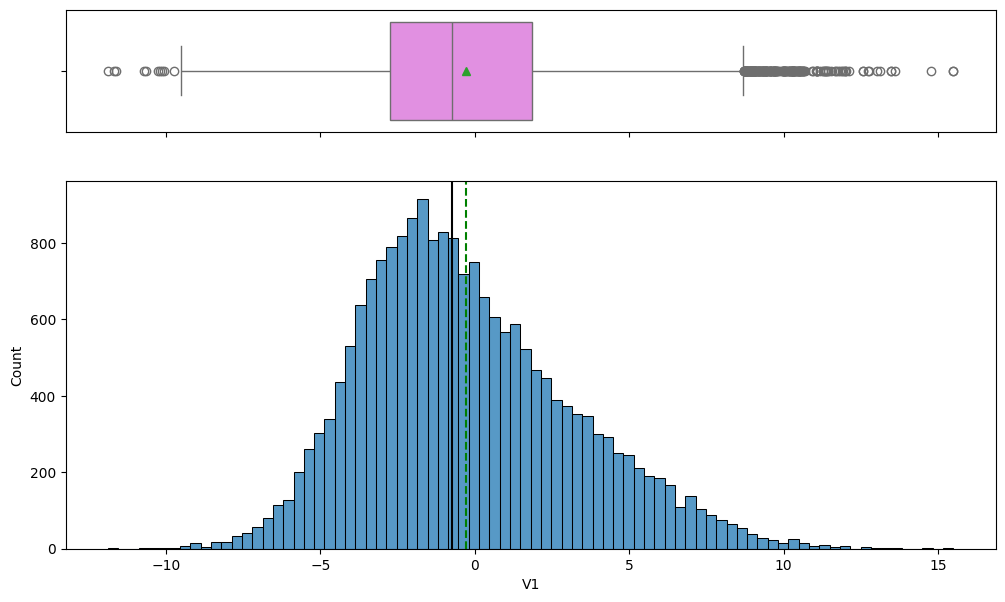

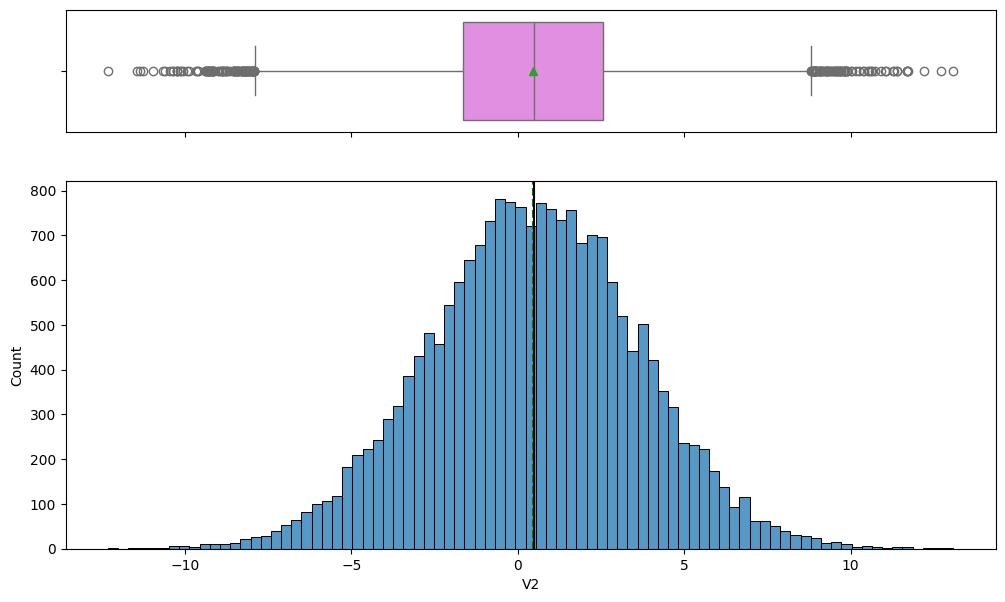

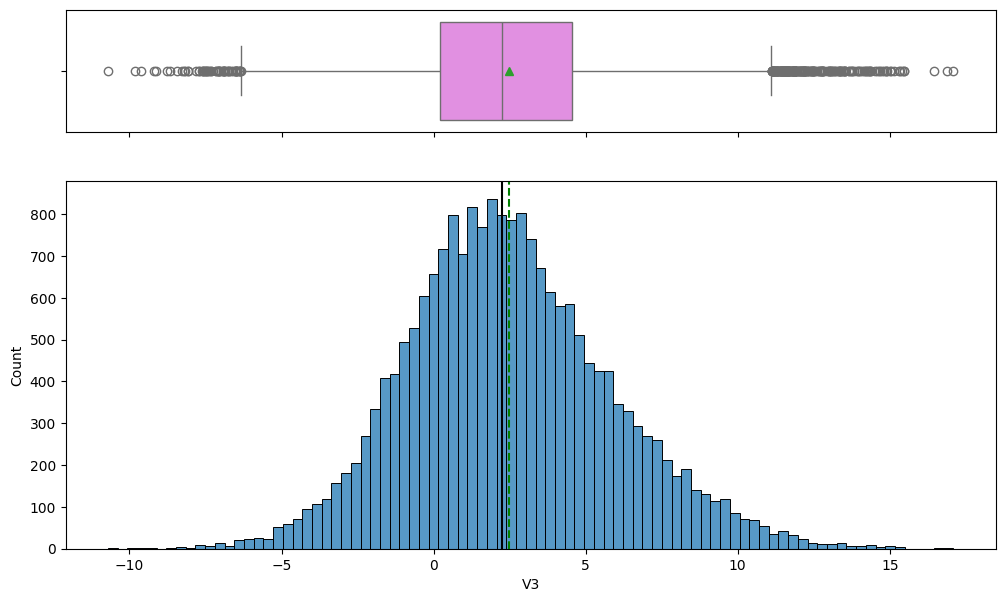

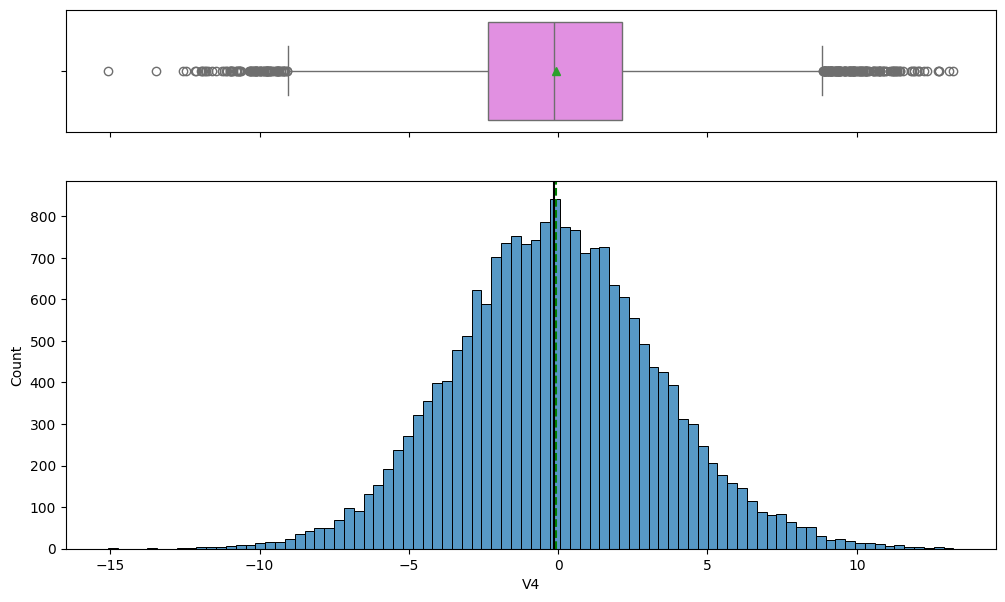

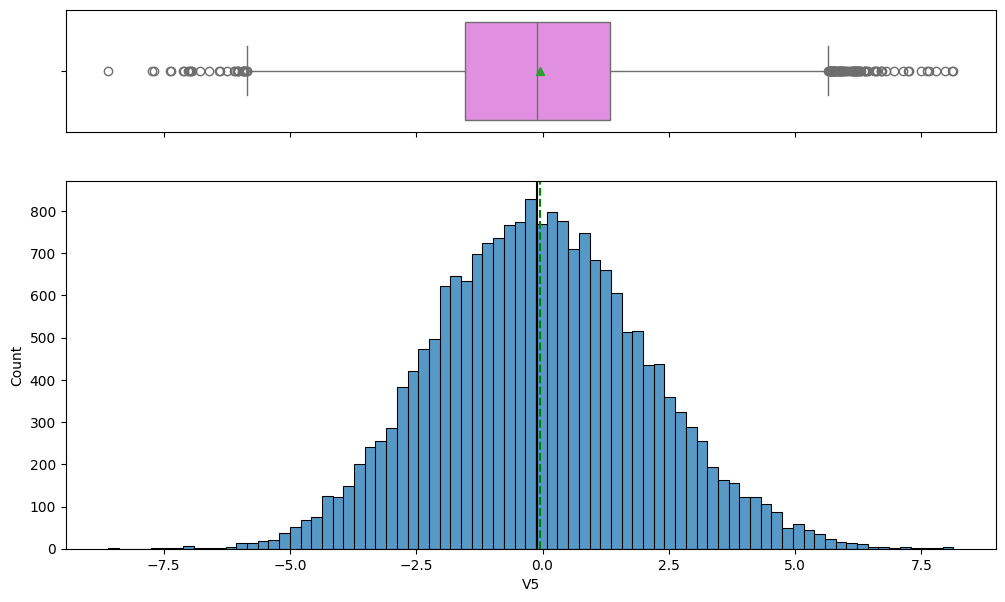

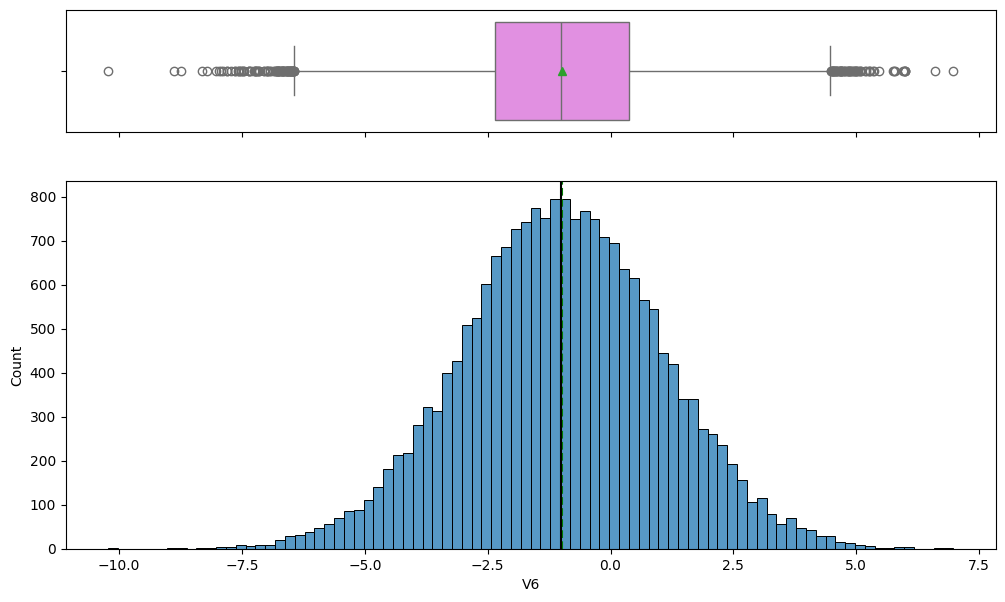

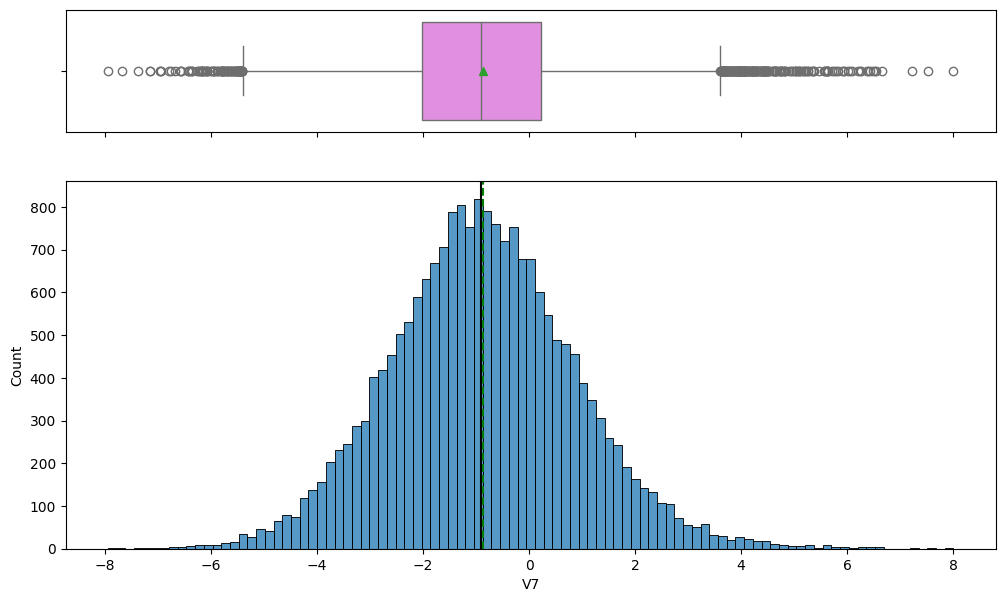

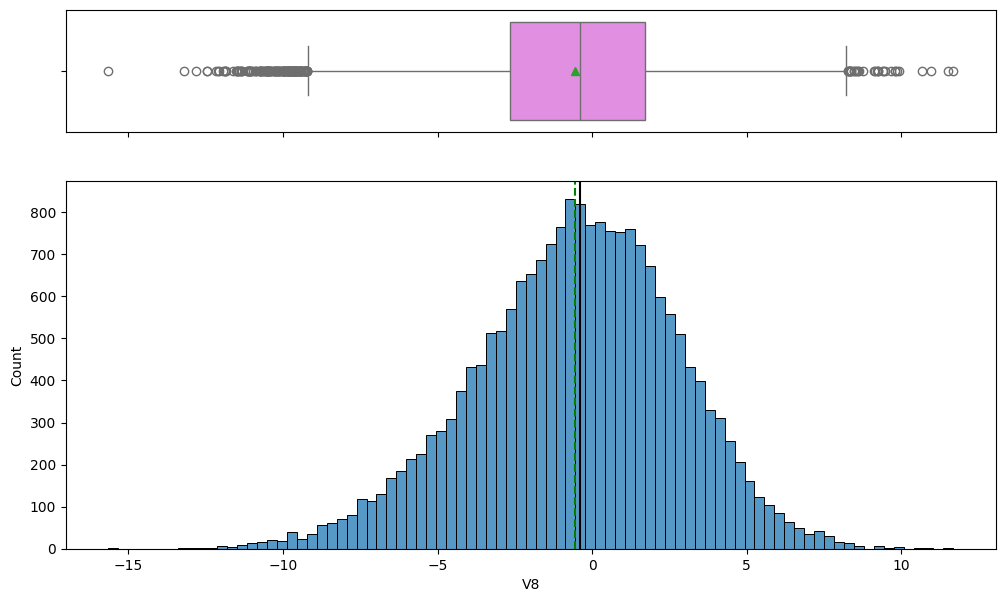

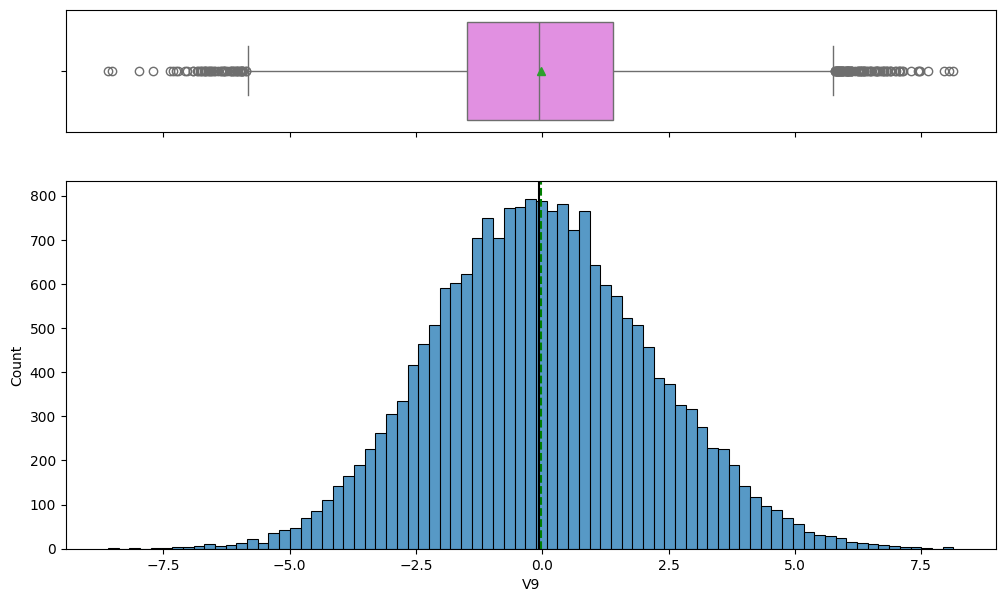

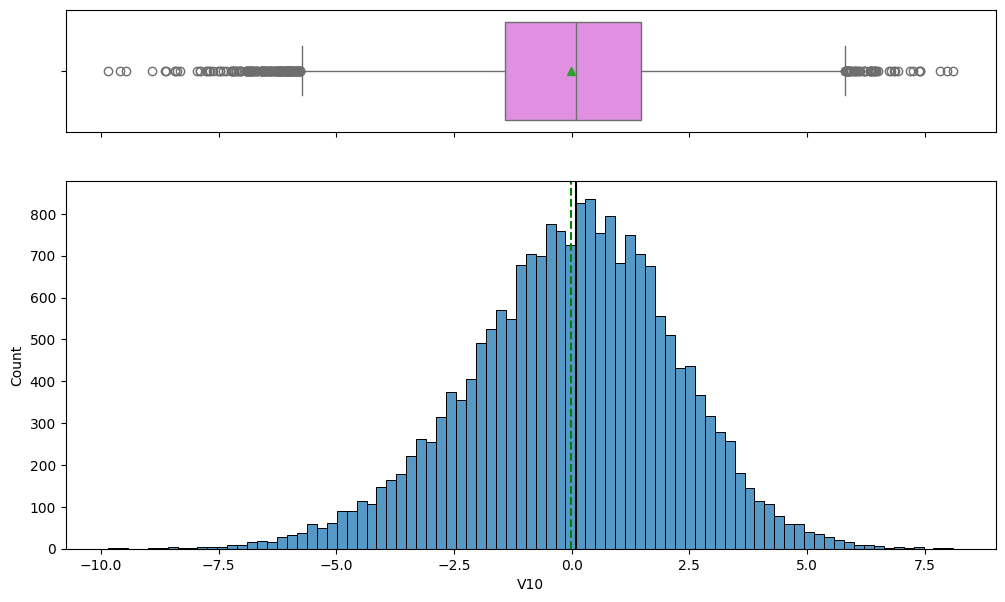

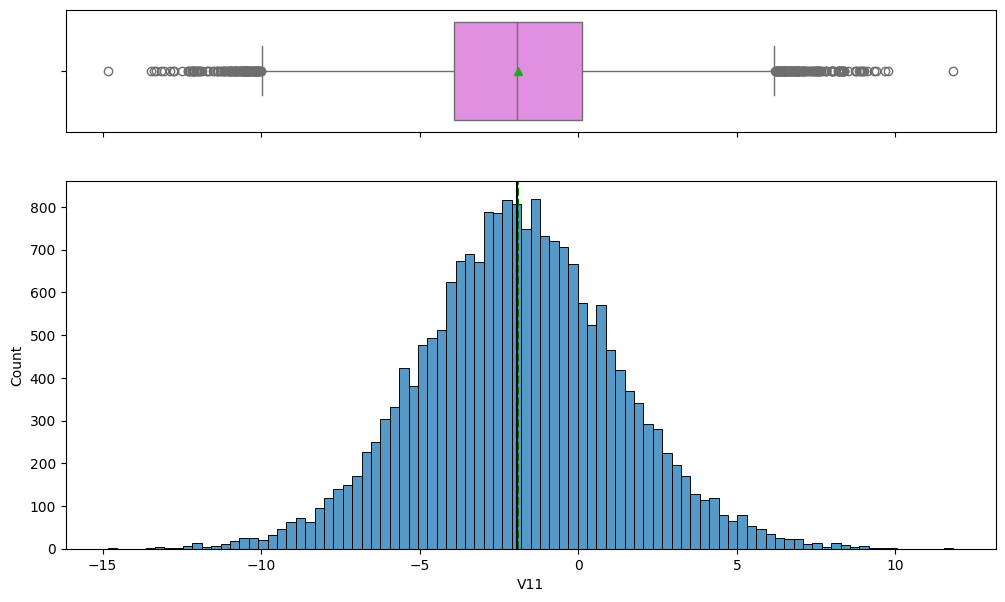

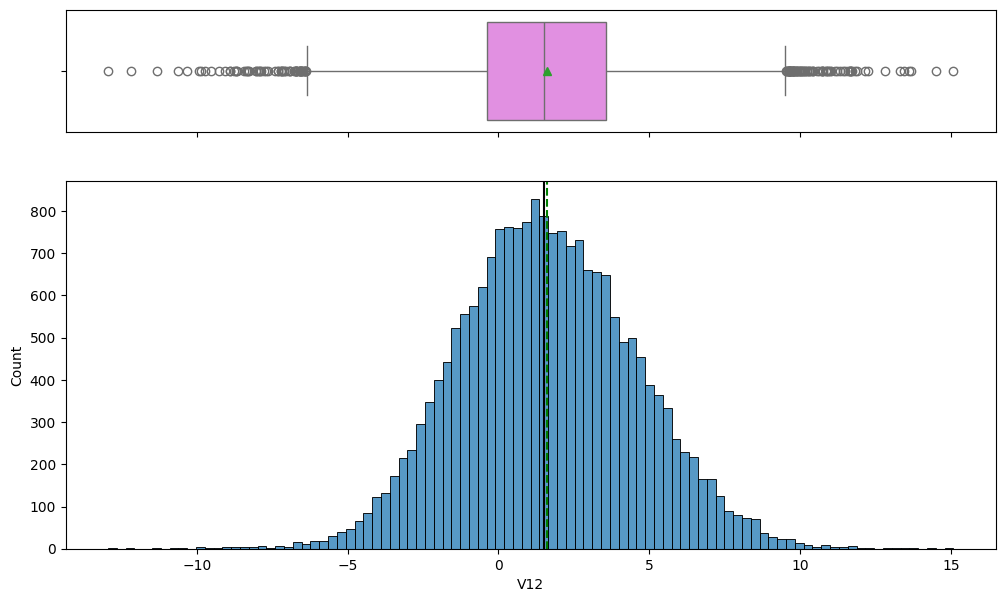

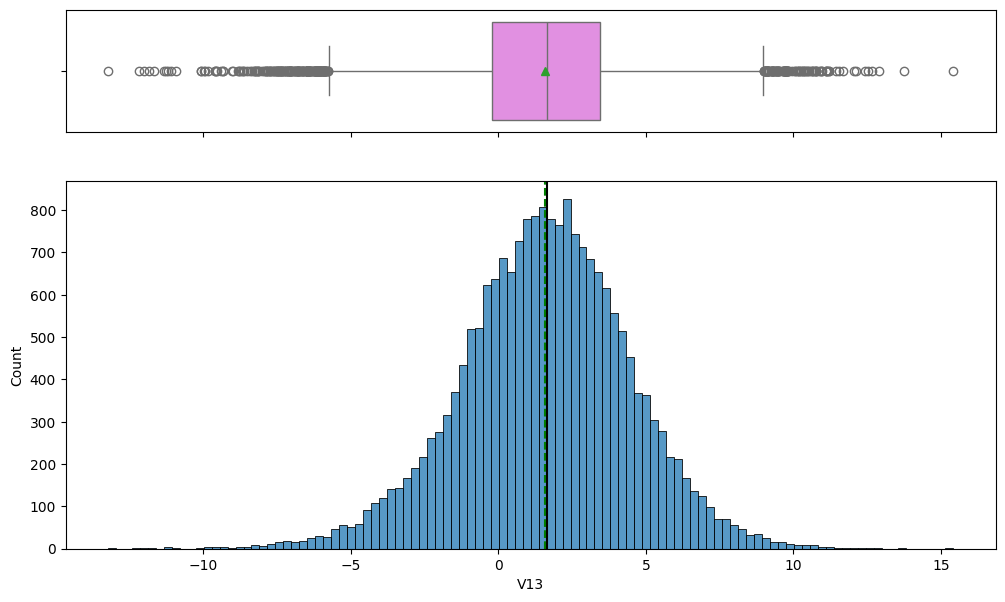

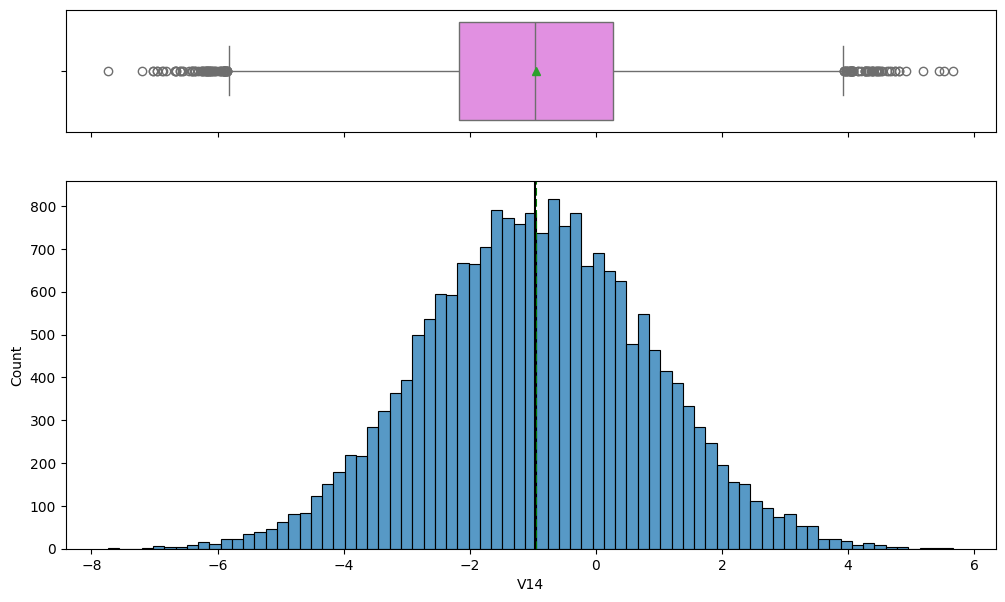

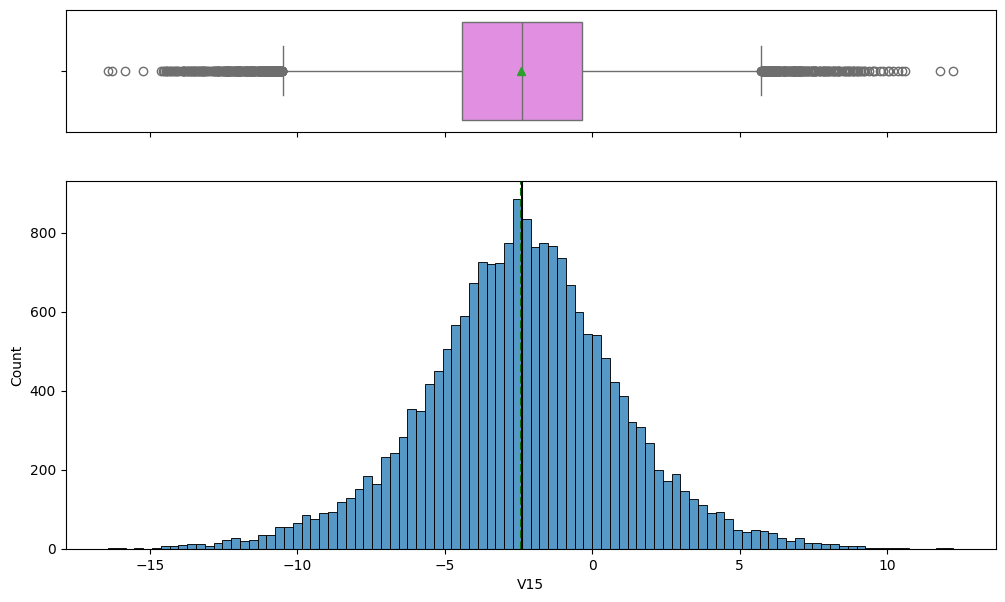

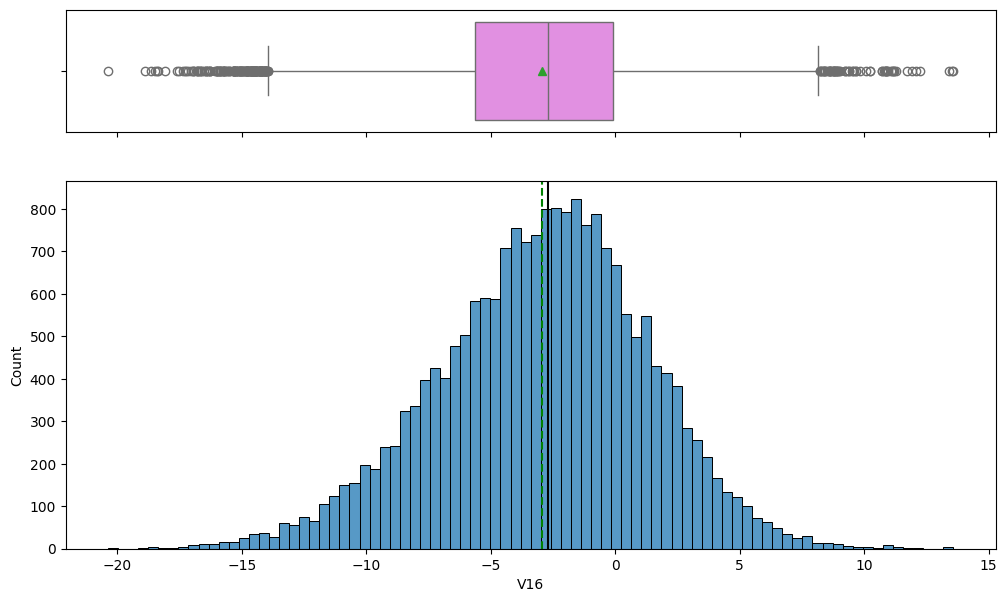

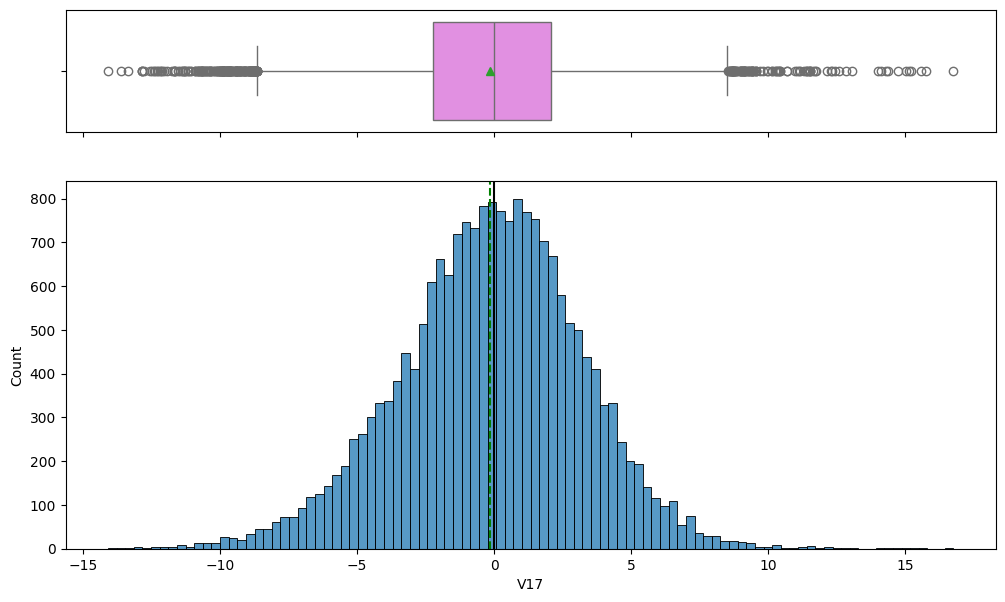

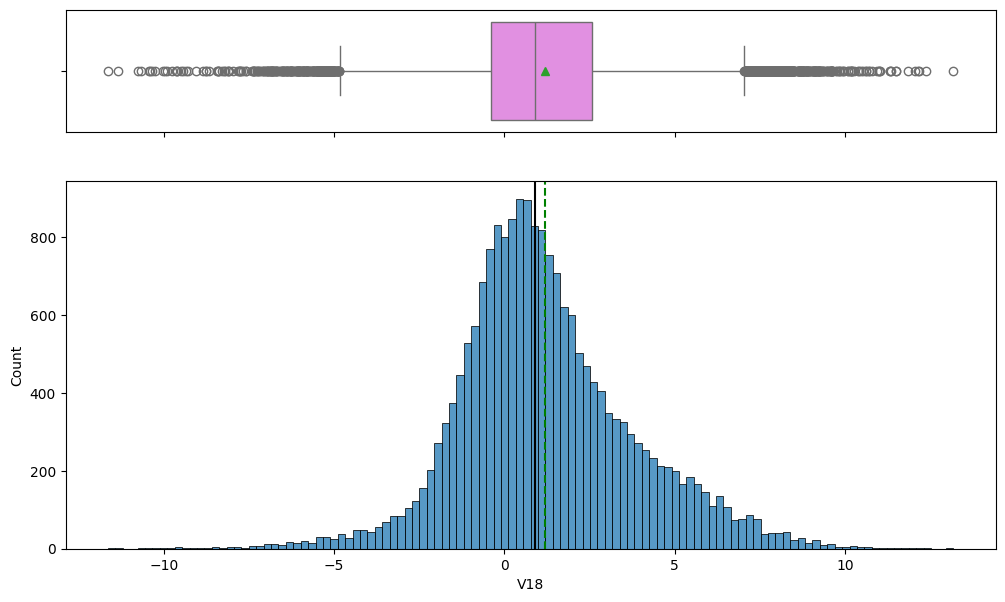

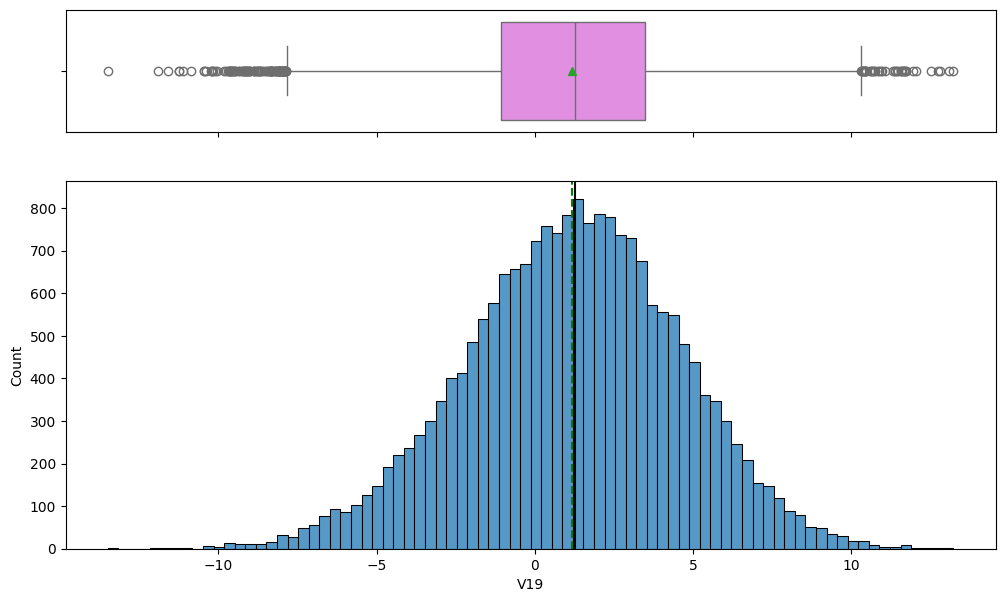

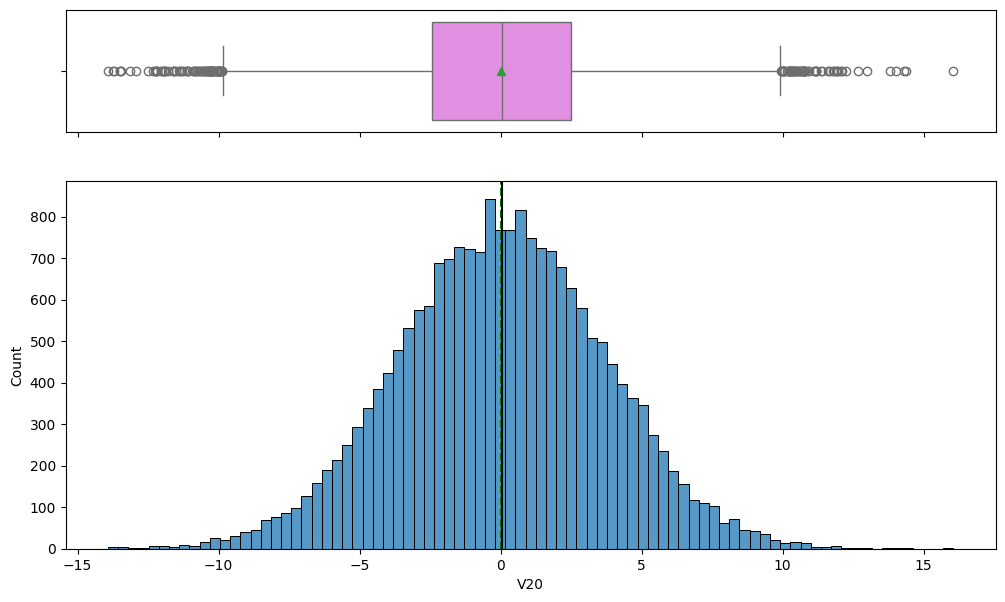

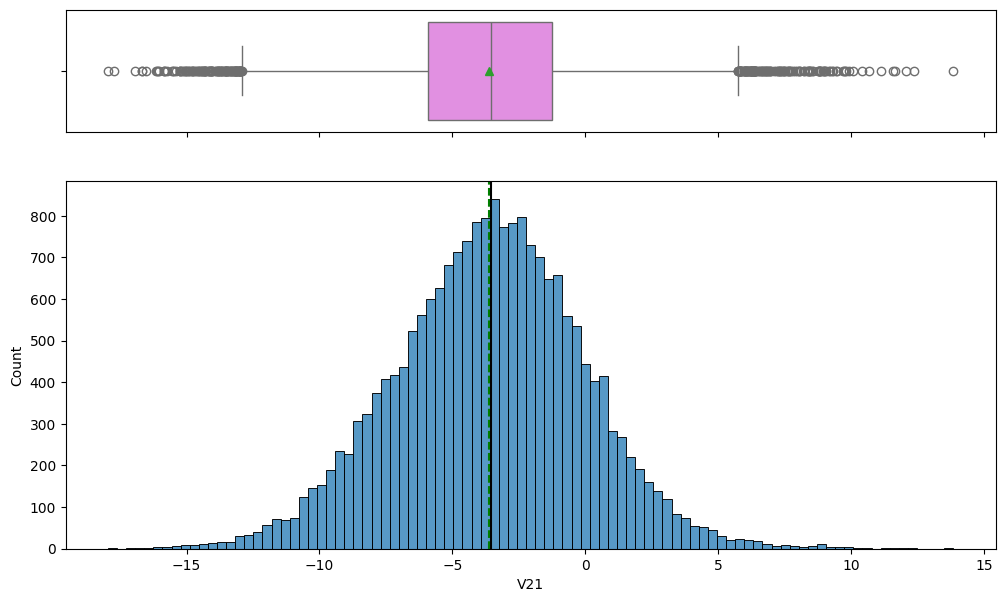

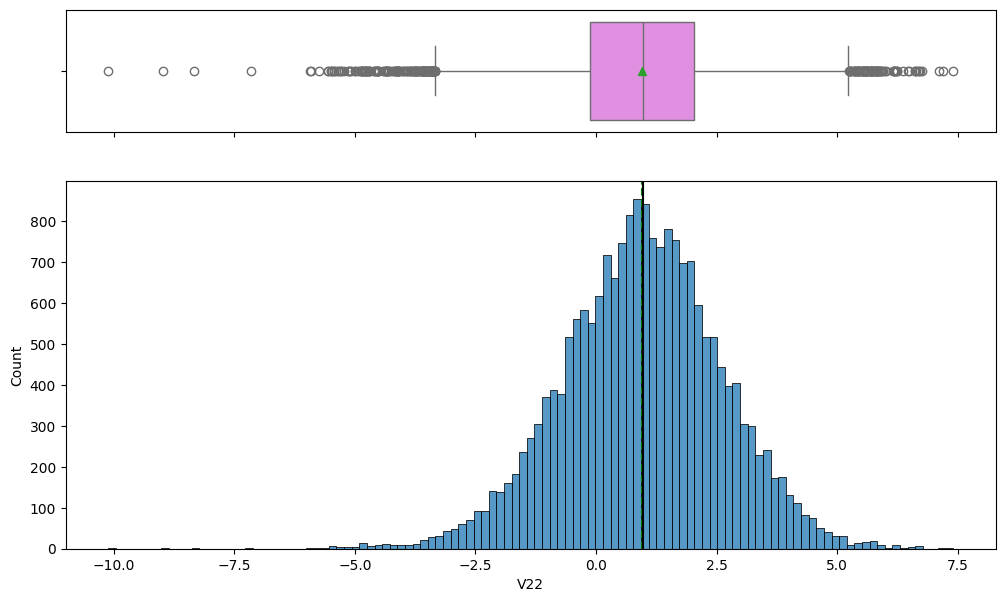

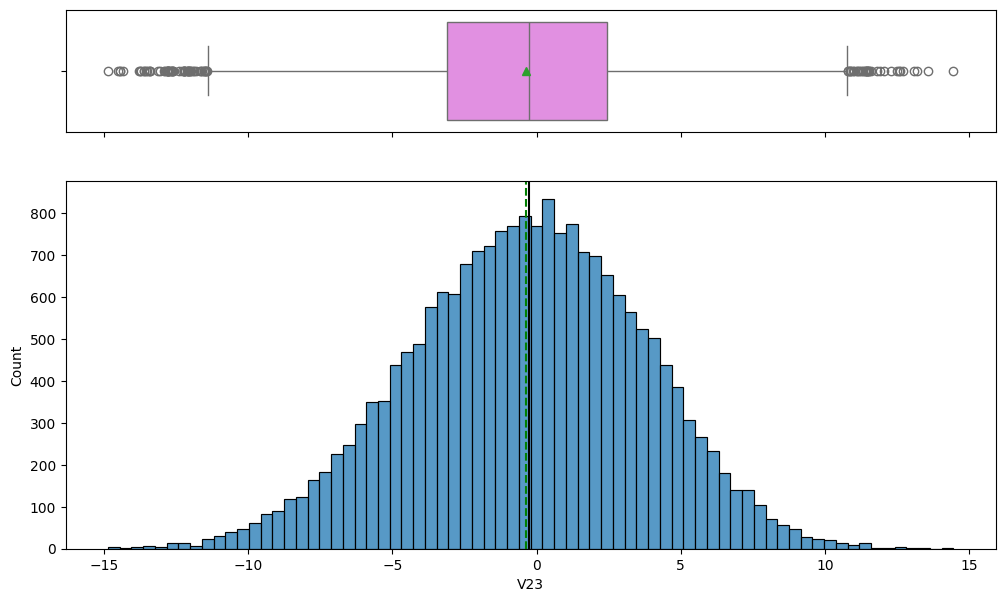

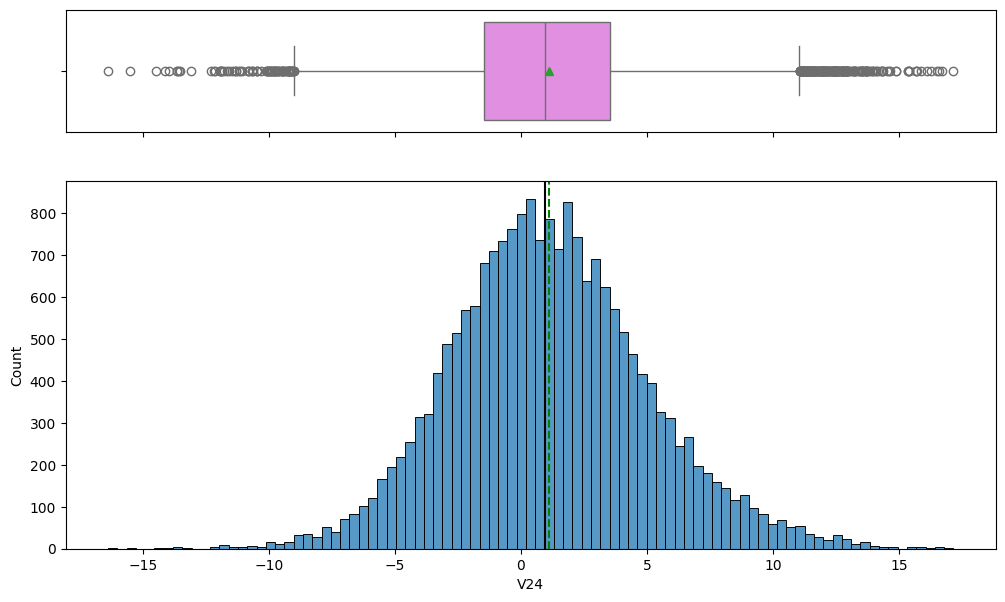

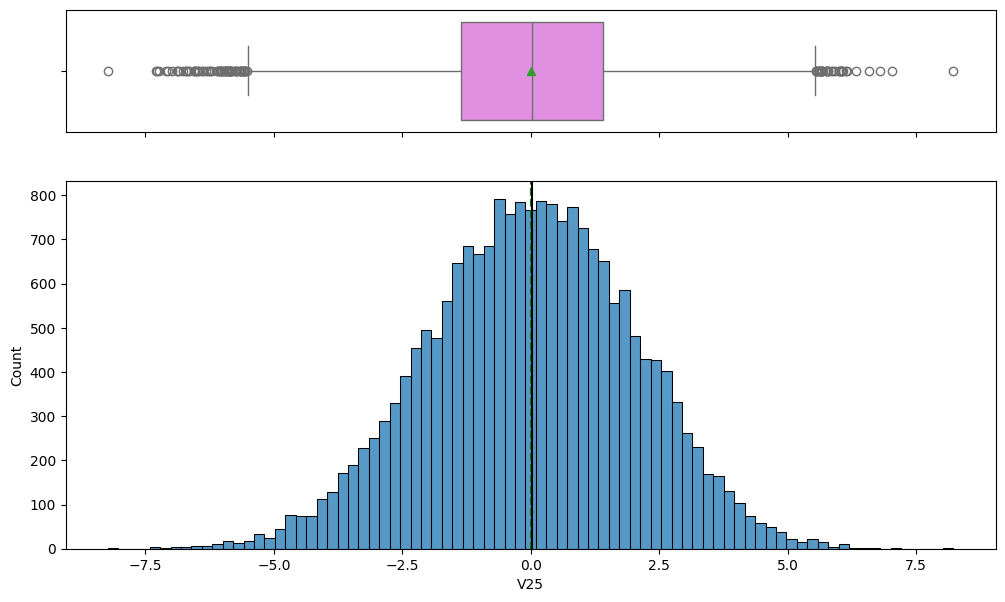

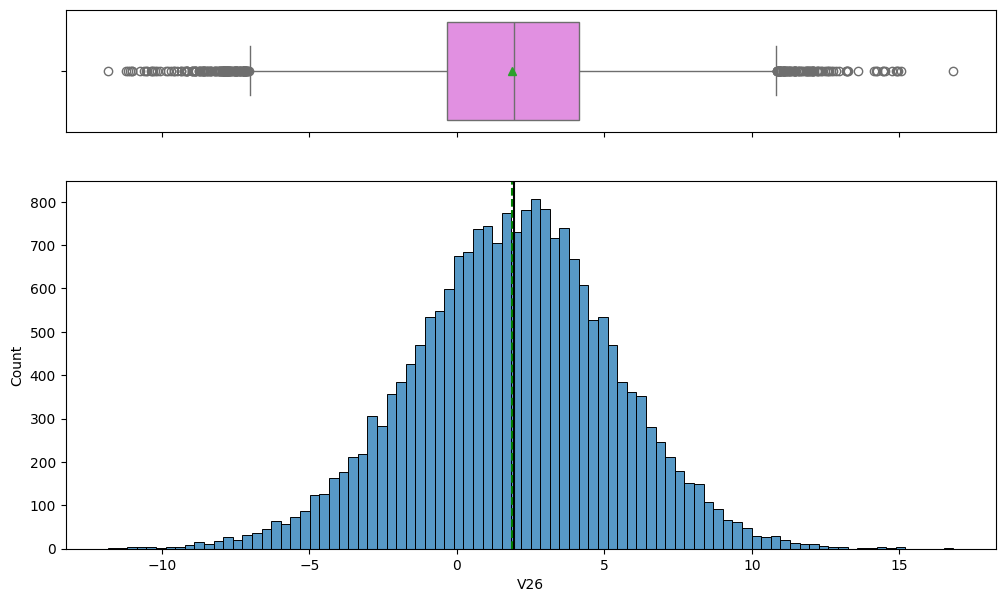

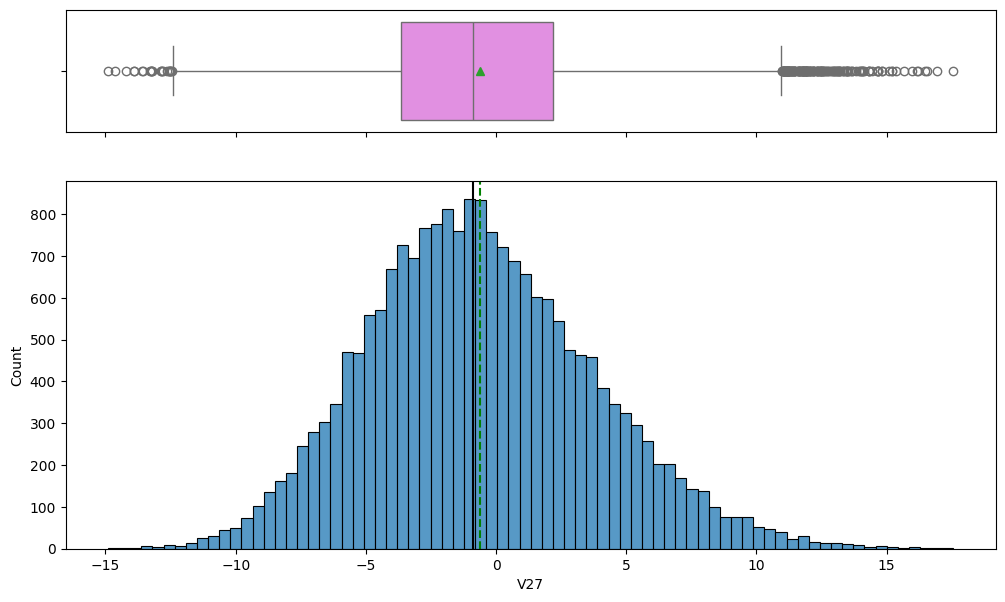

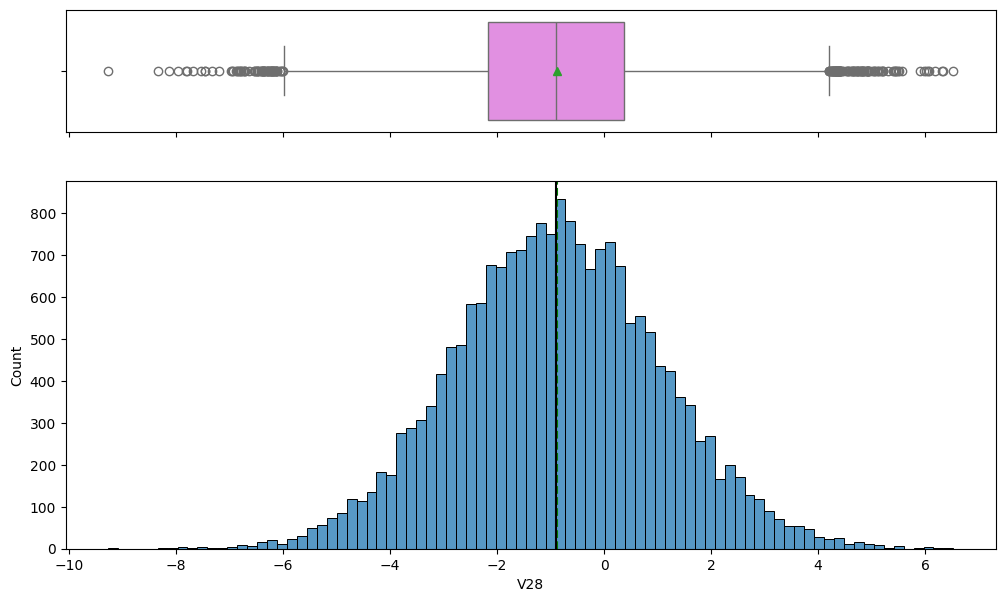

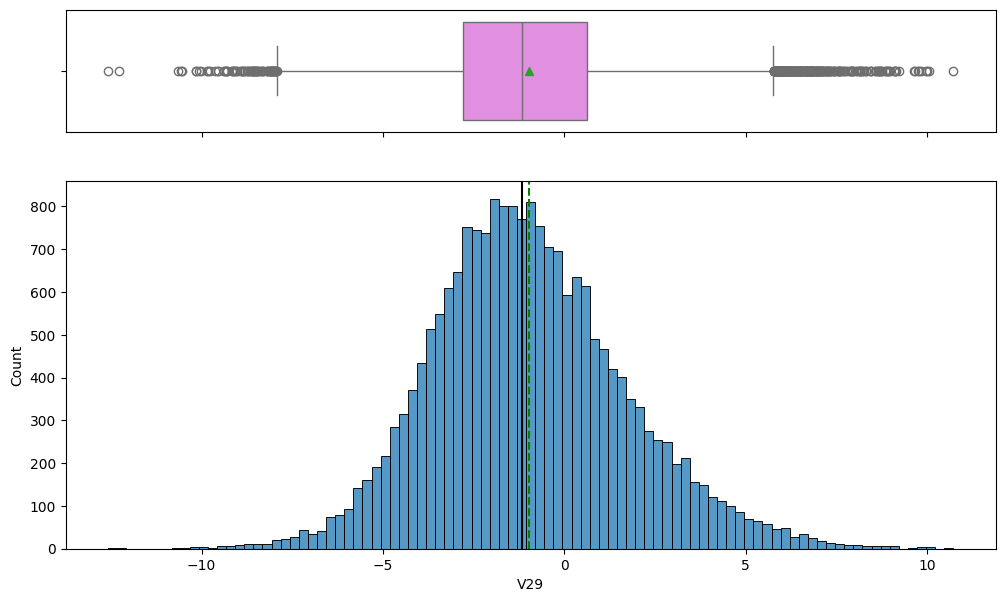

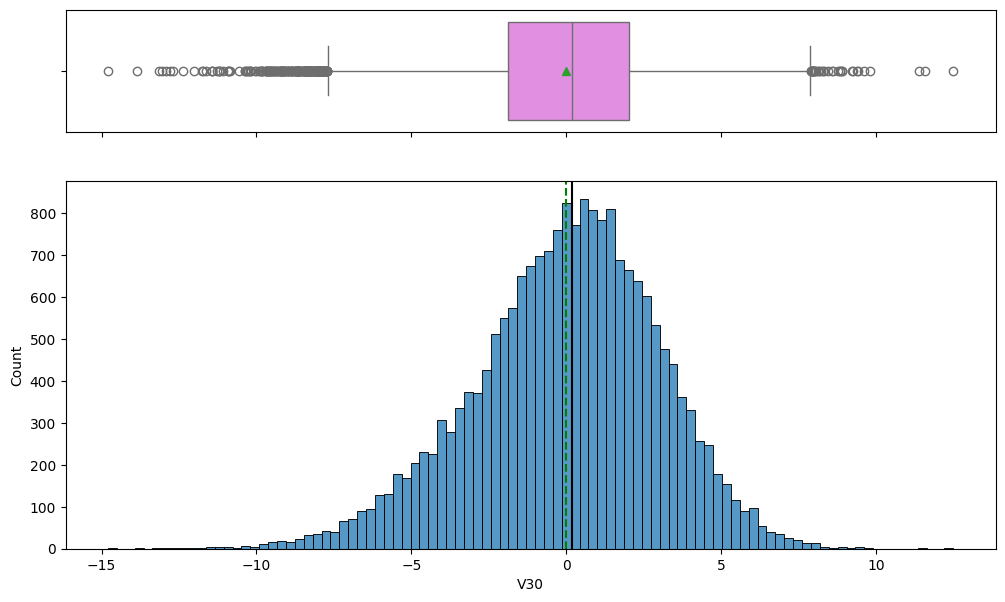

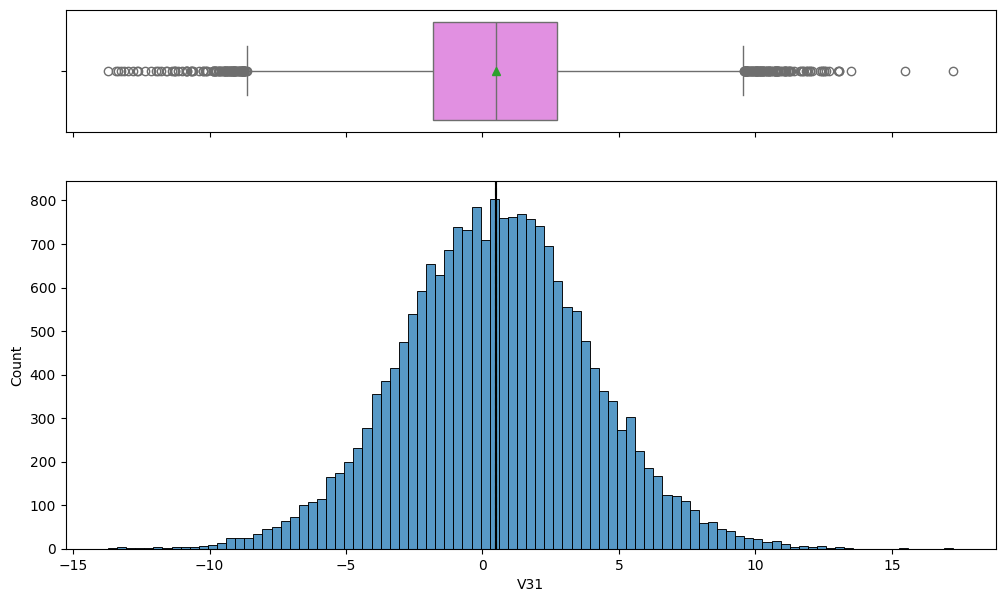

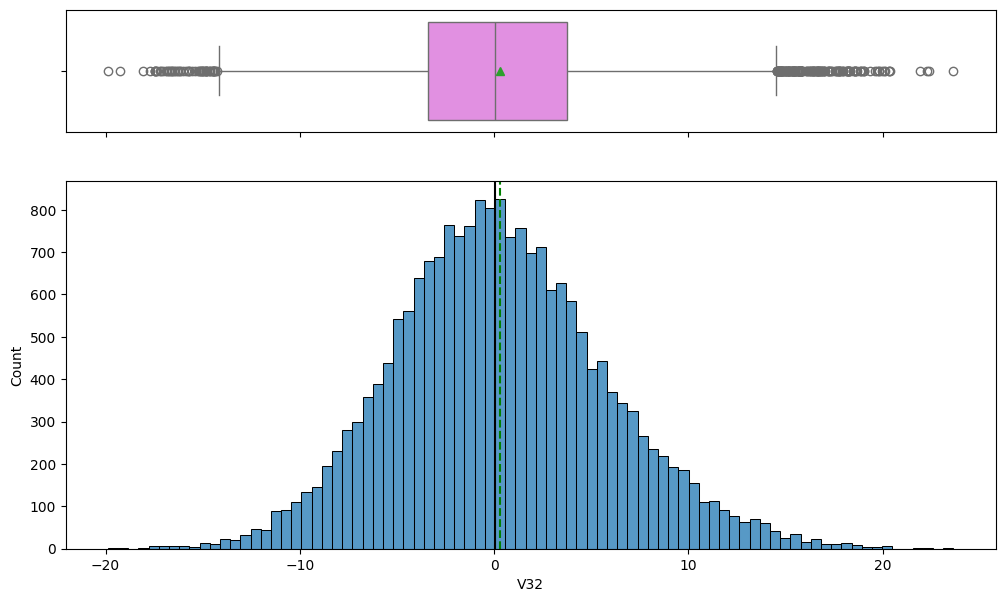

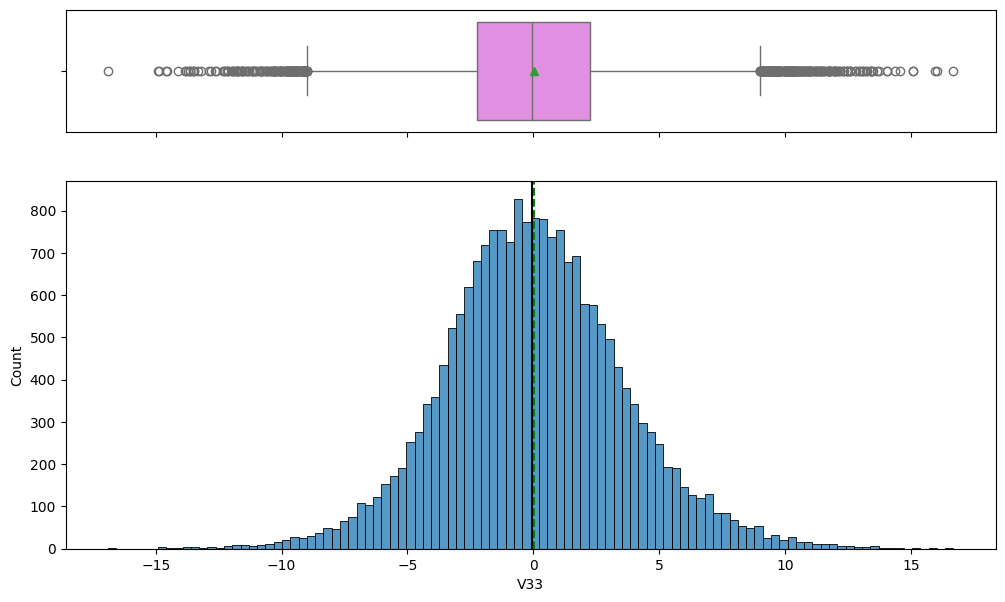

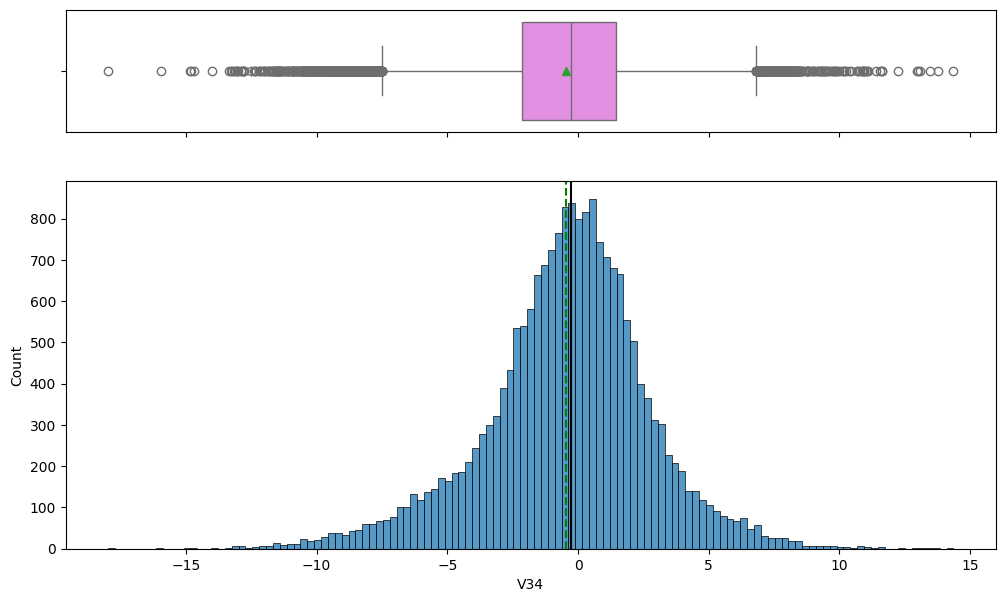

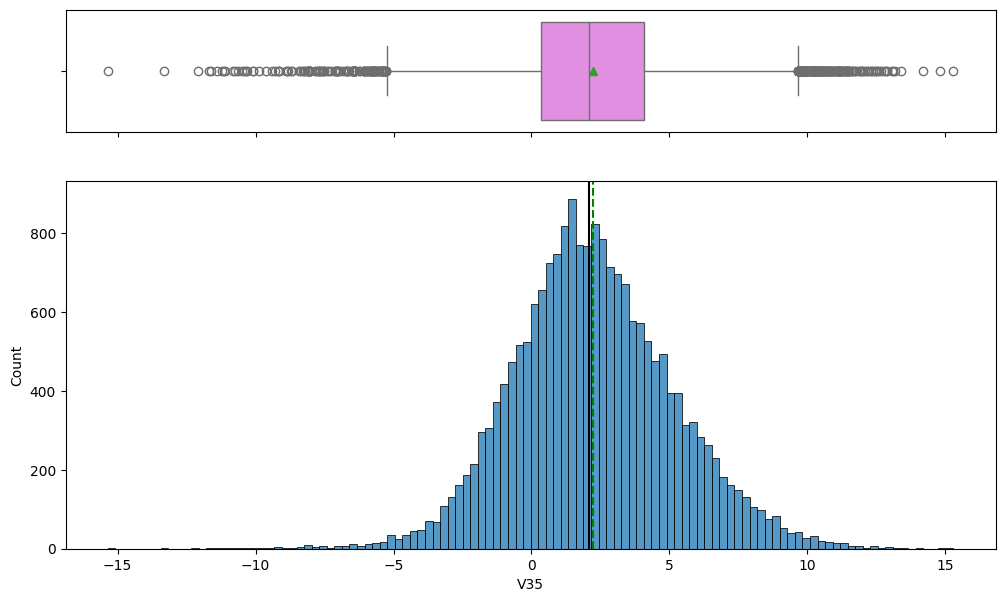

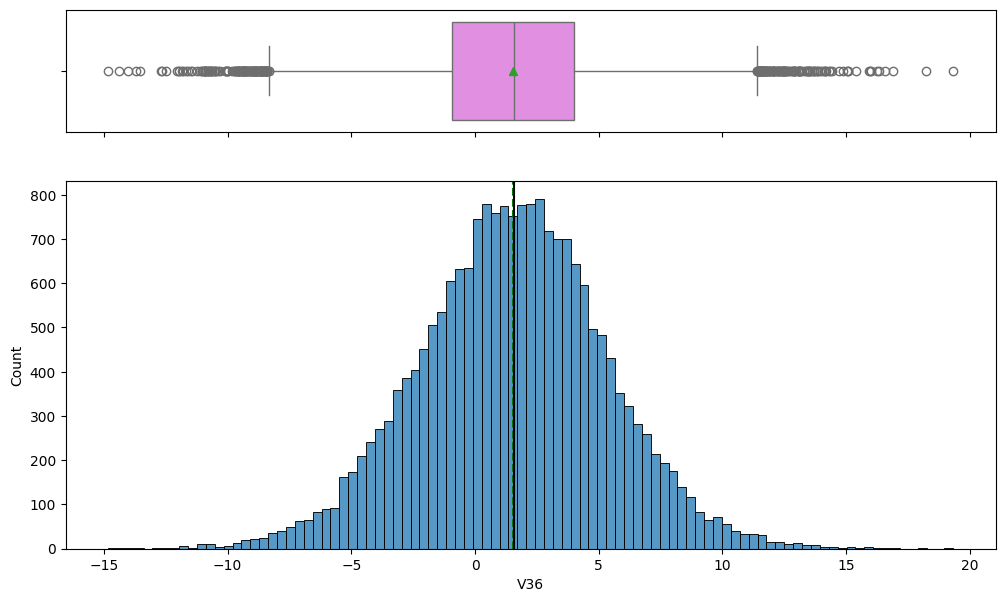

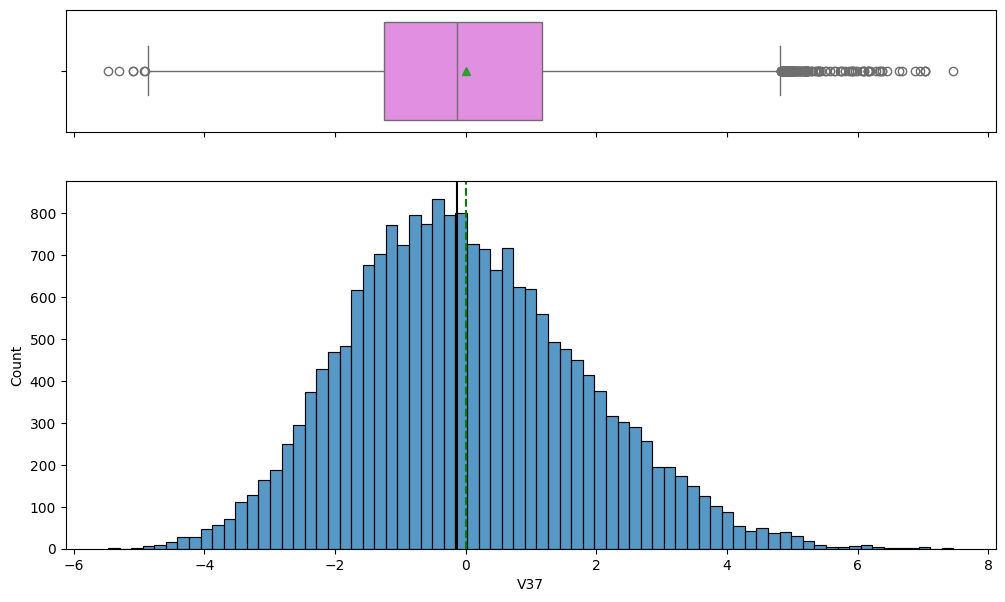

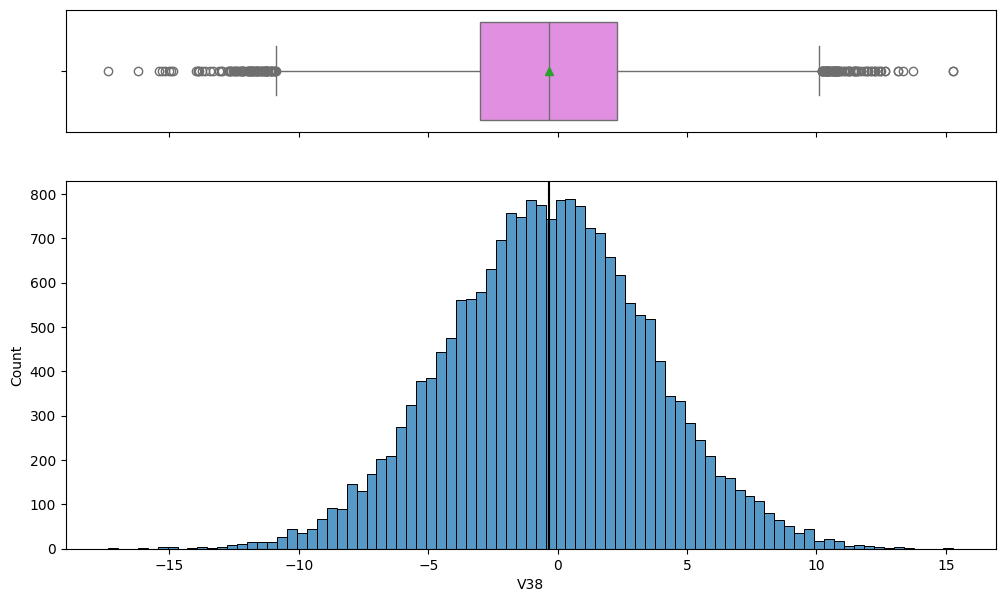

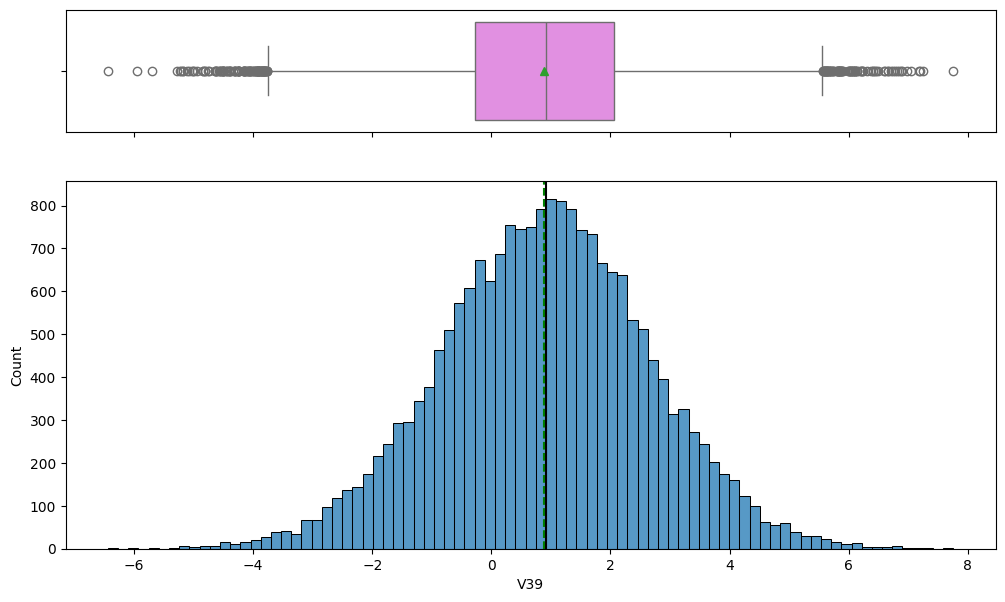

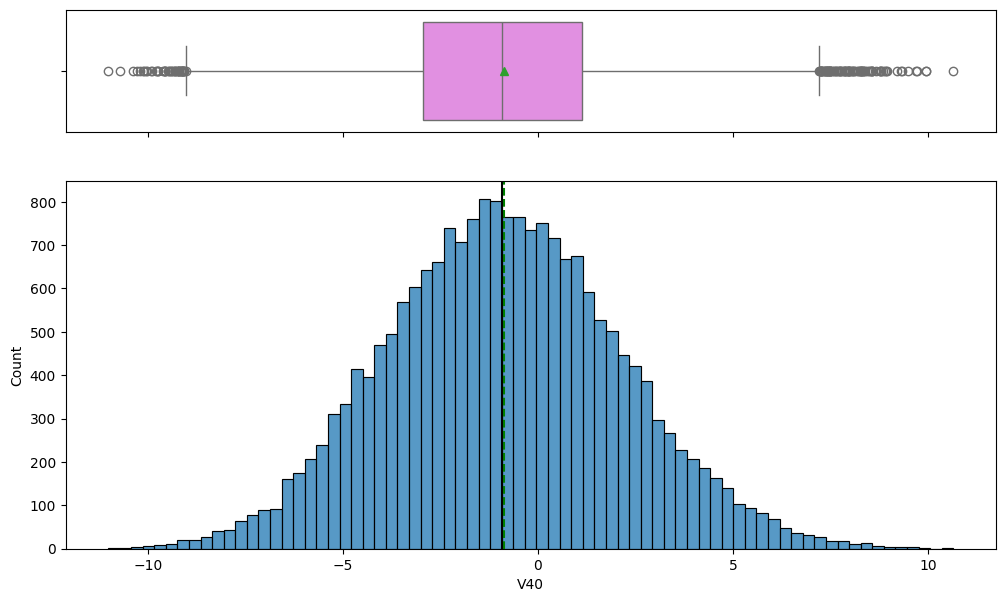

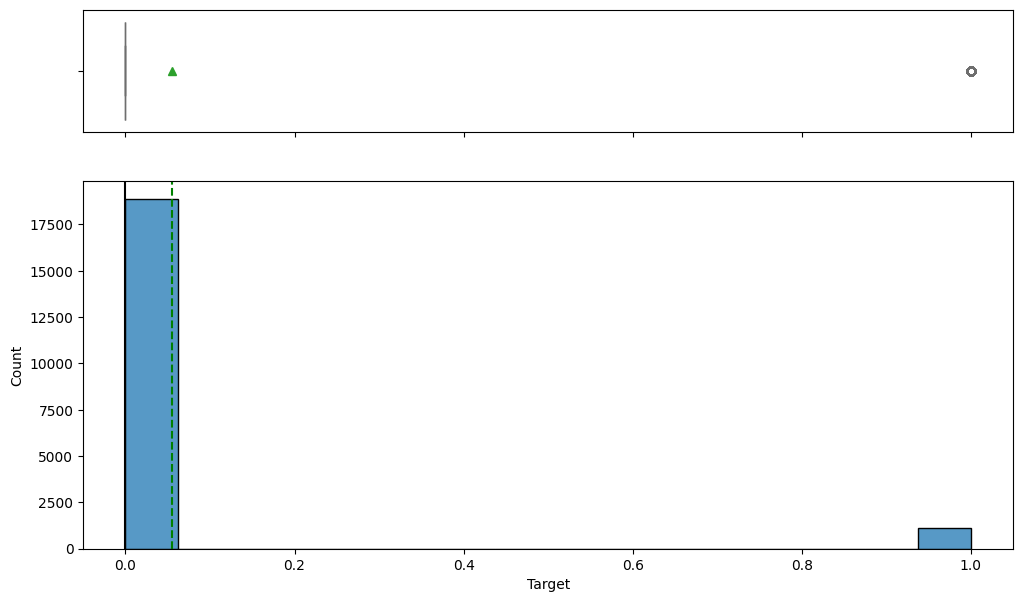

In [ ]:
for feature in data.columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)

- there are no extrem outliers

###Bivariate Analysis

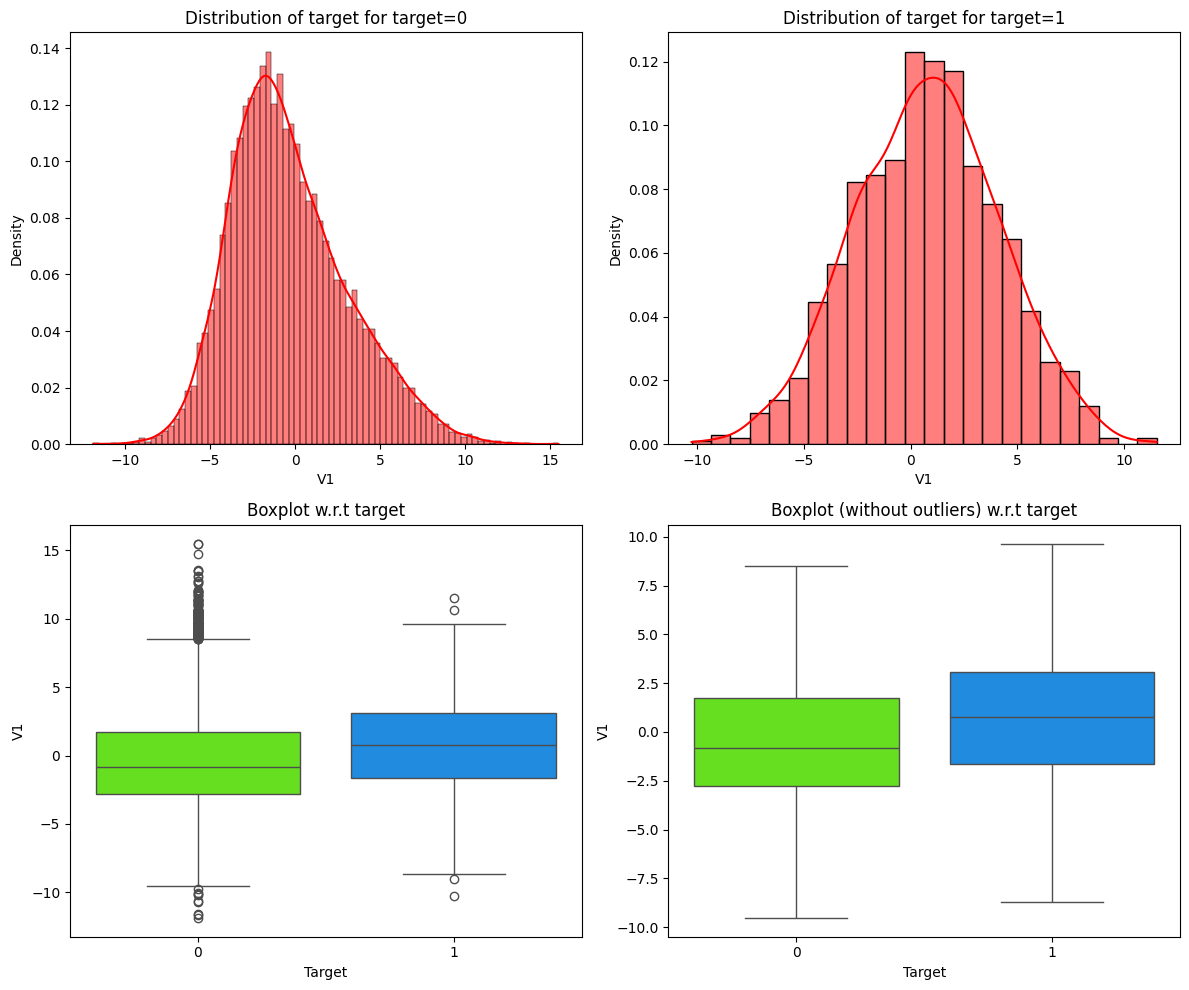

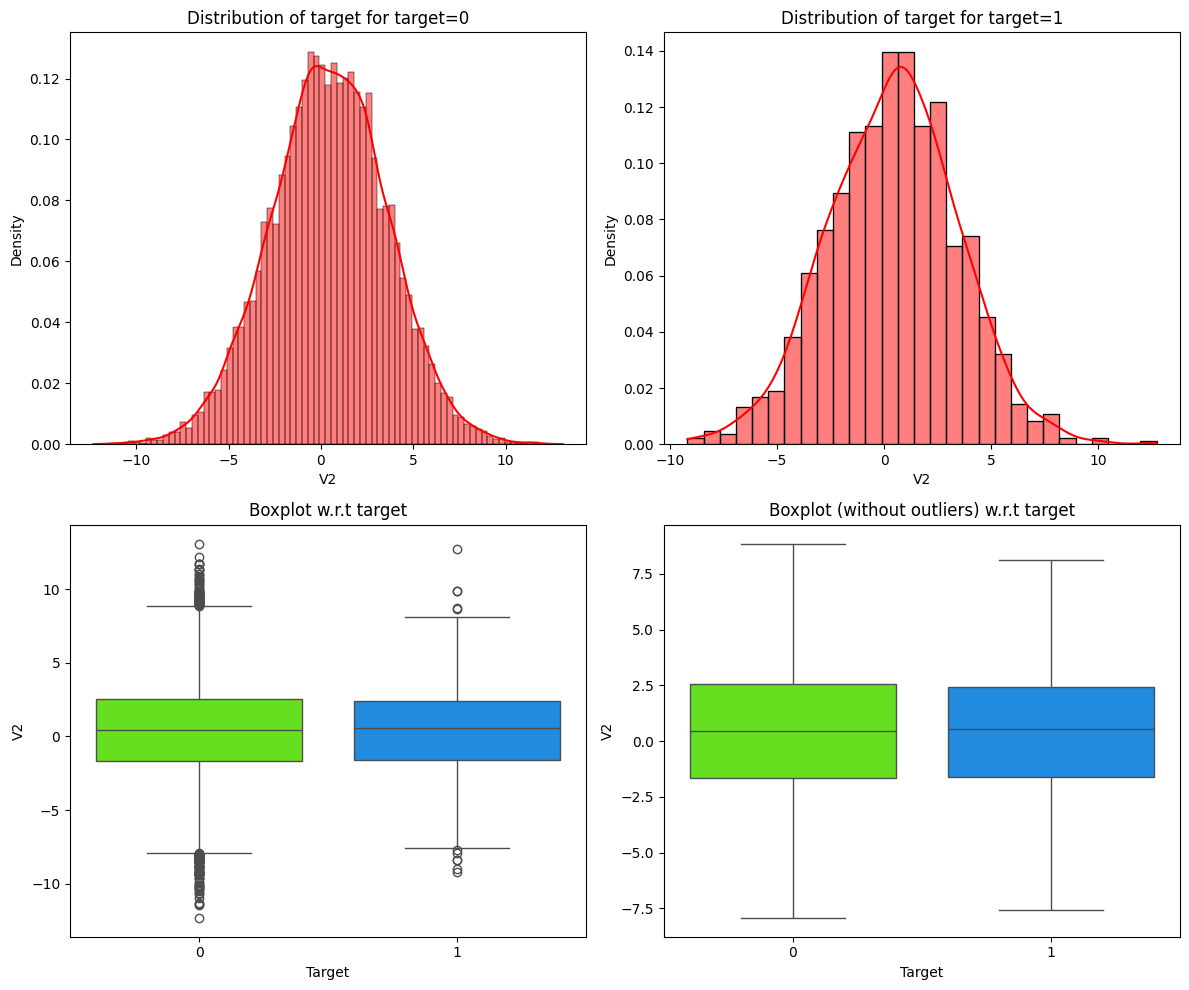

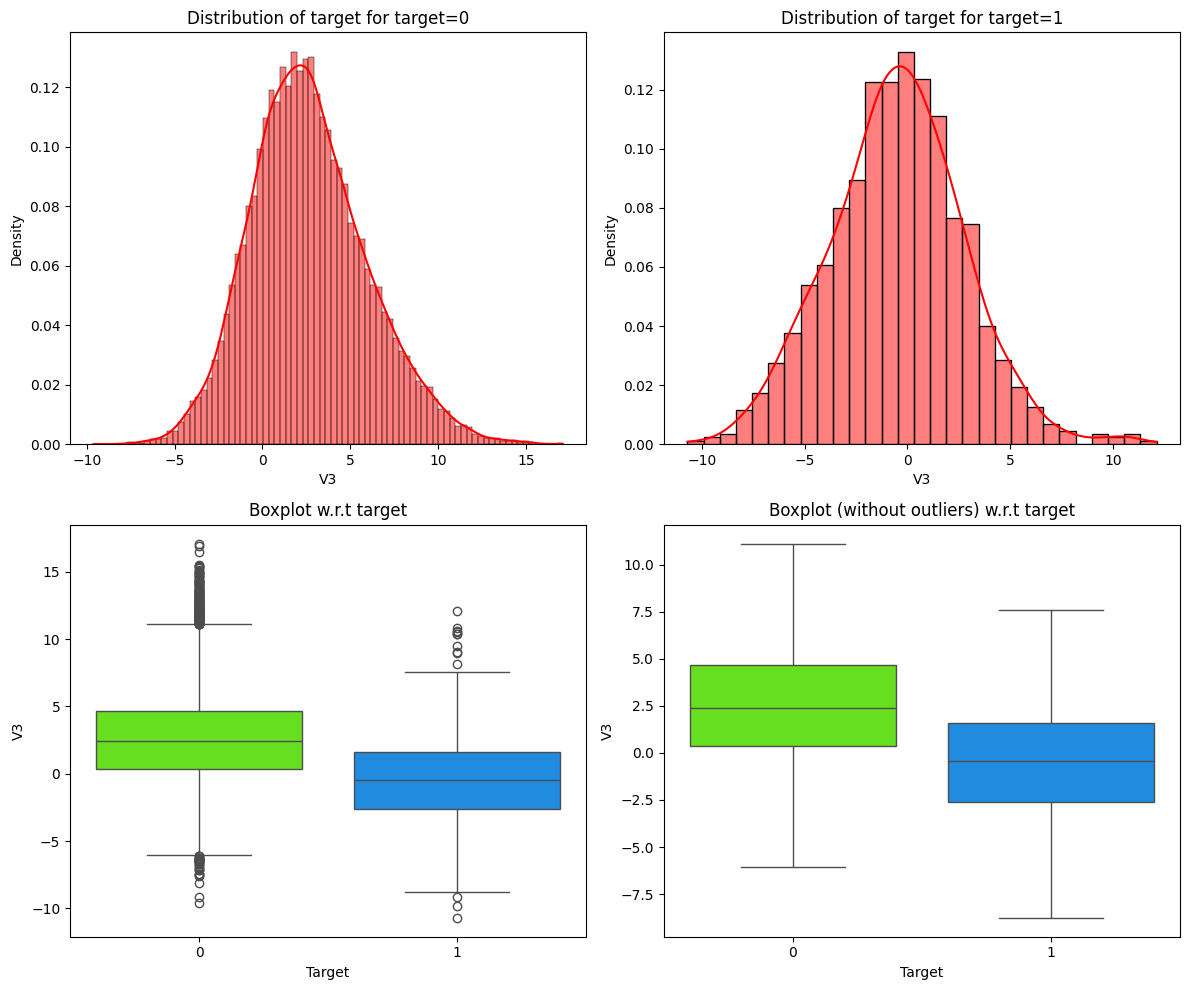

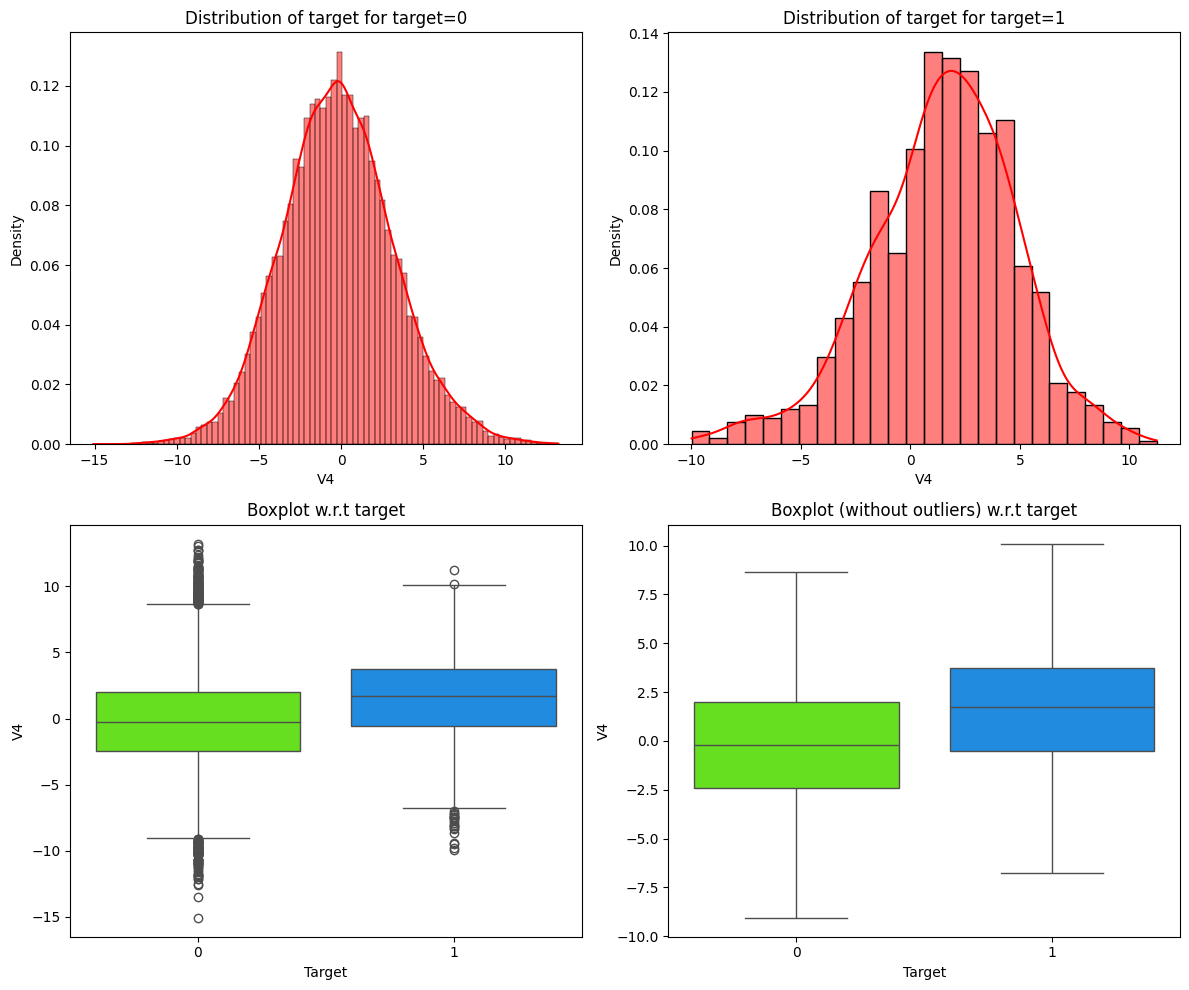

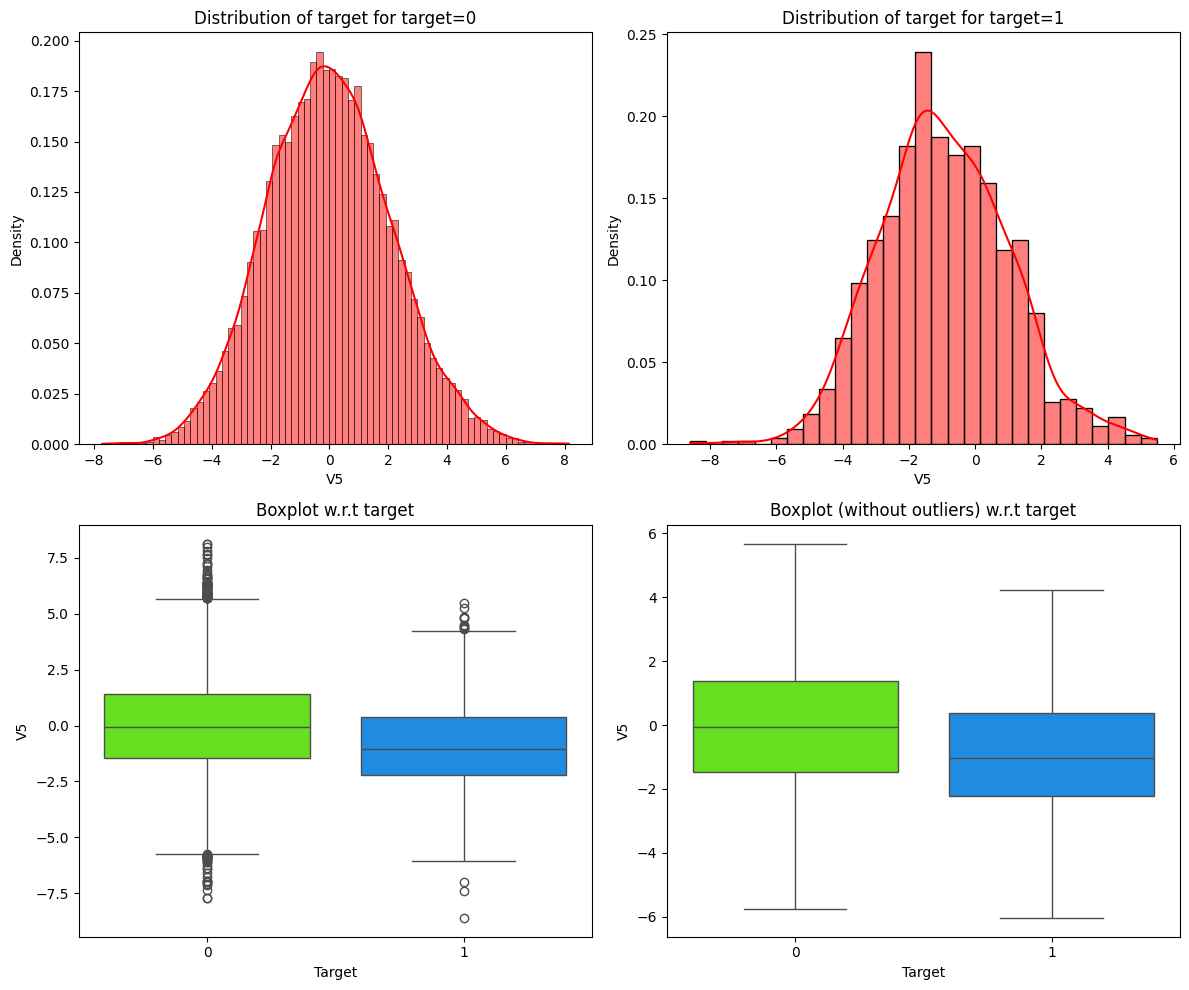

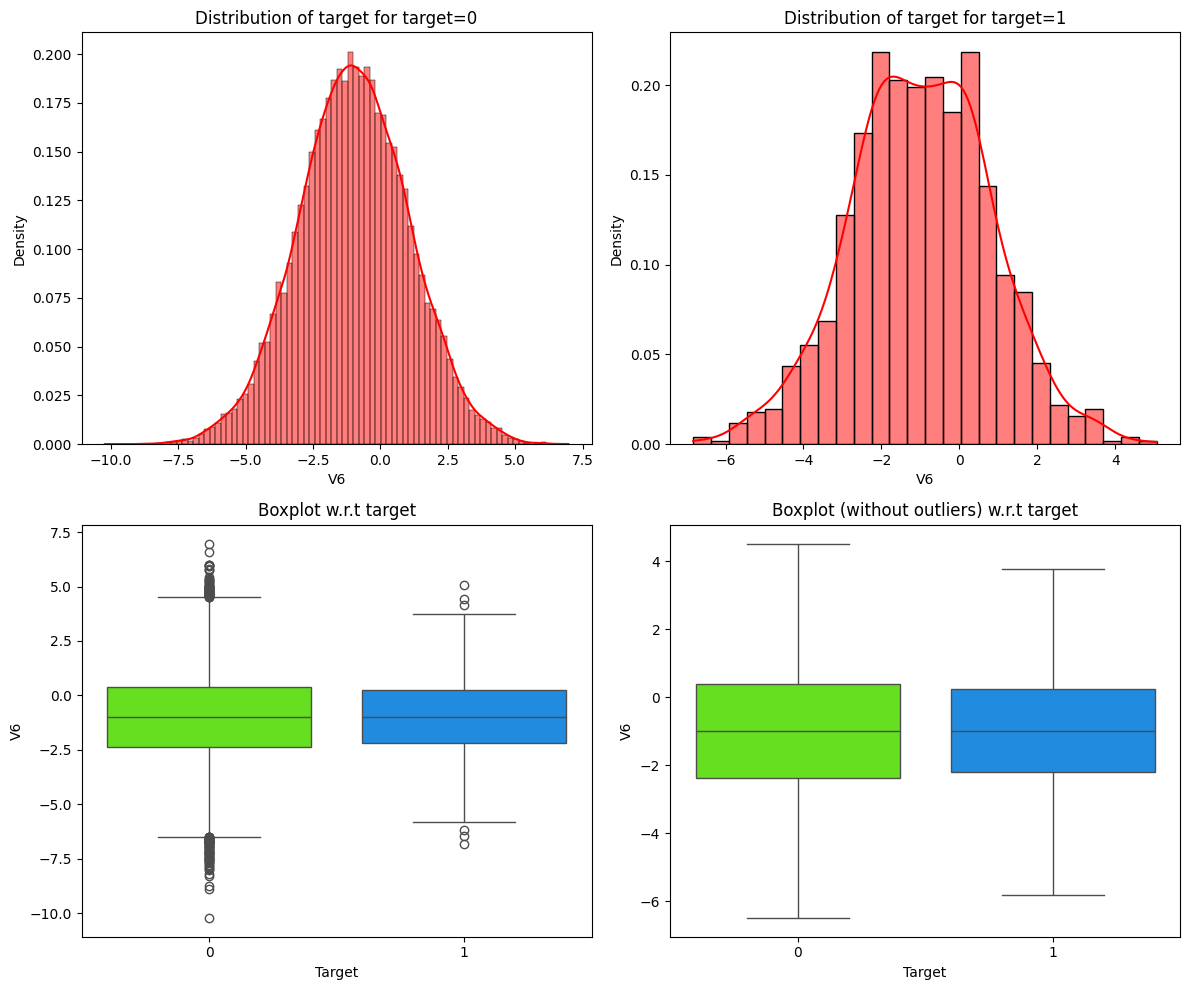

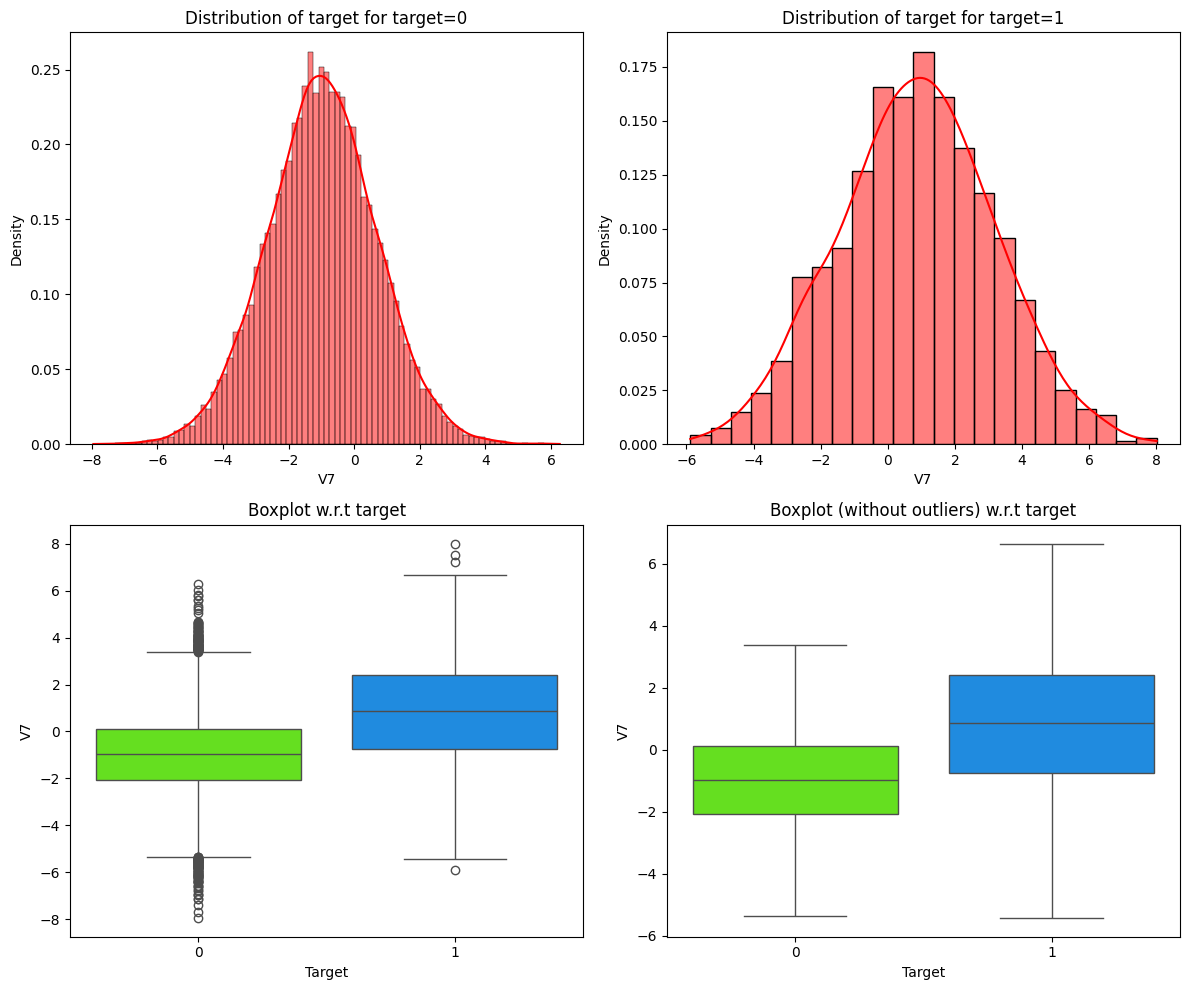

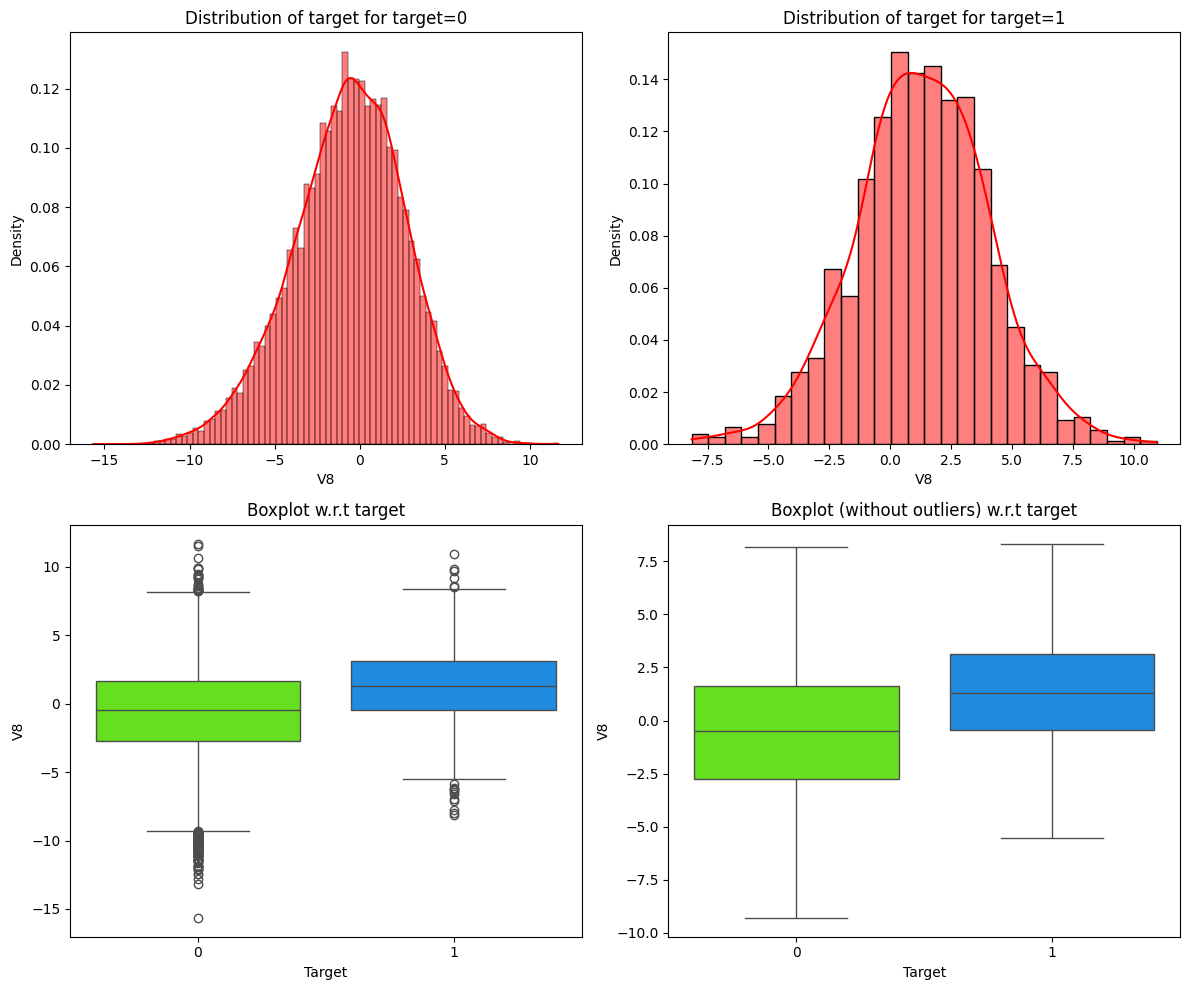

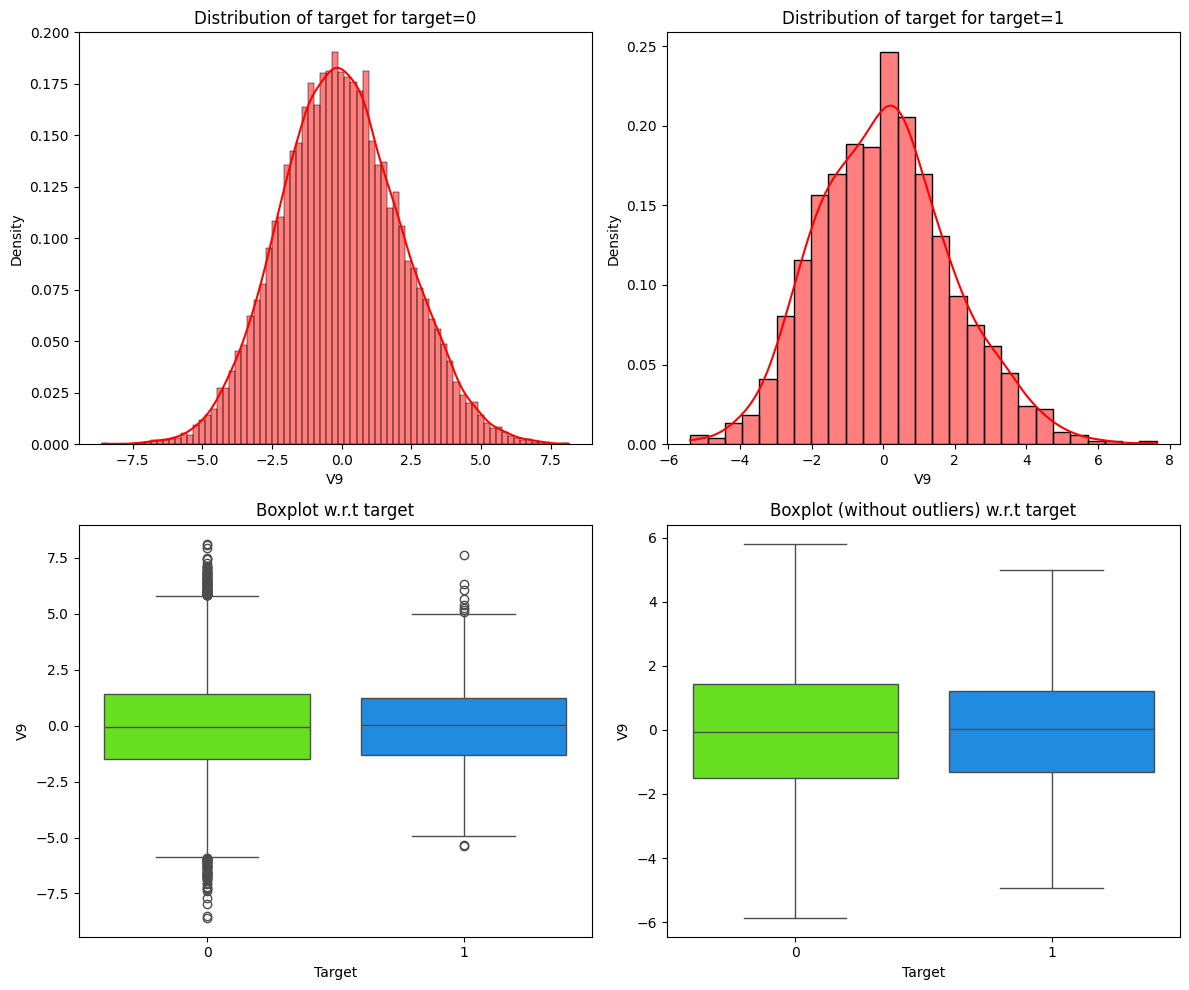

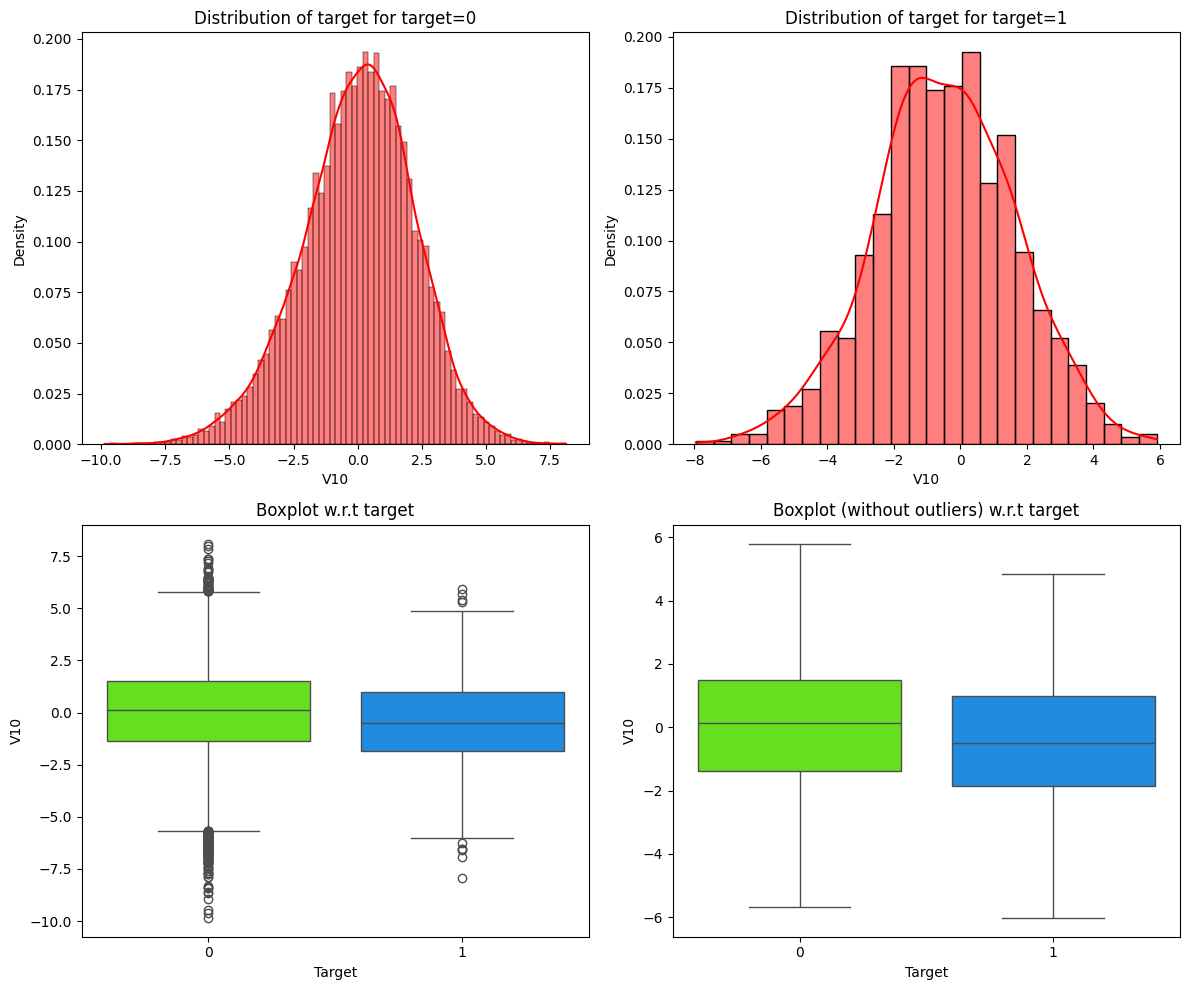

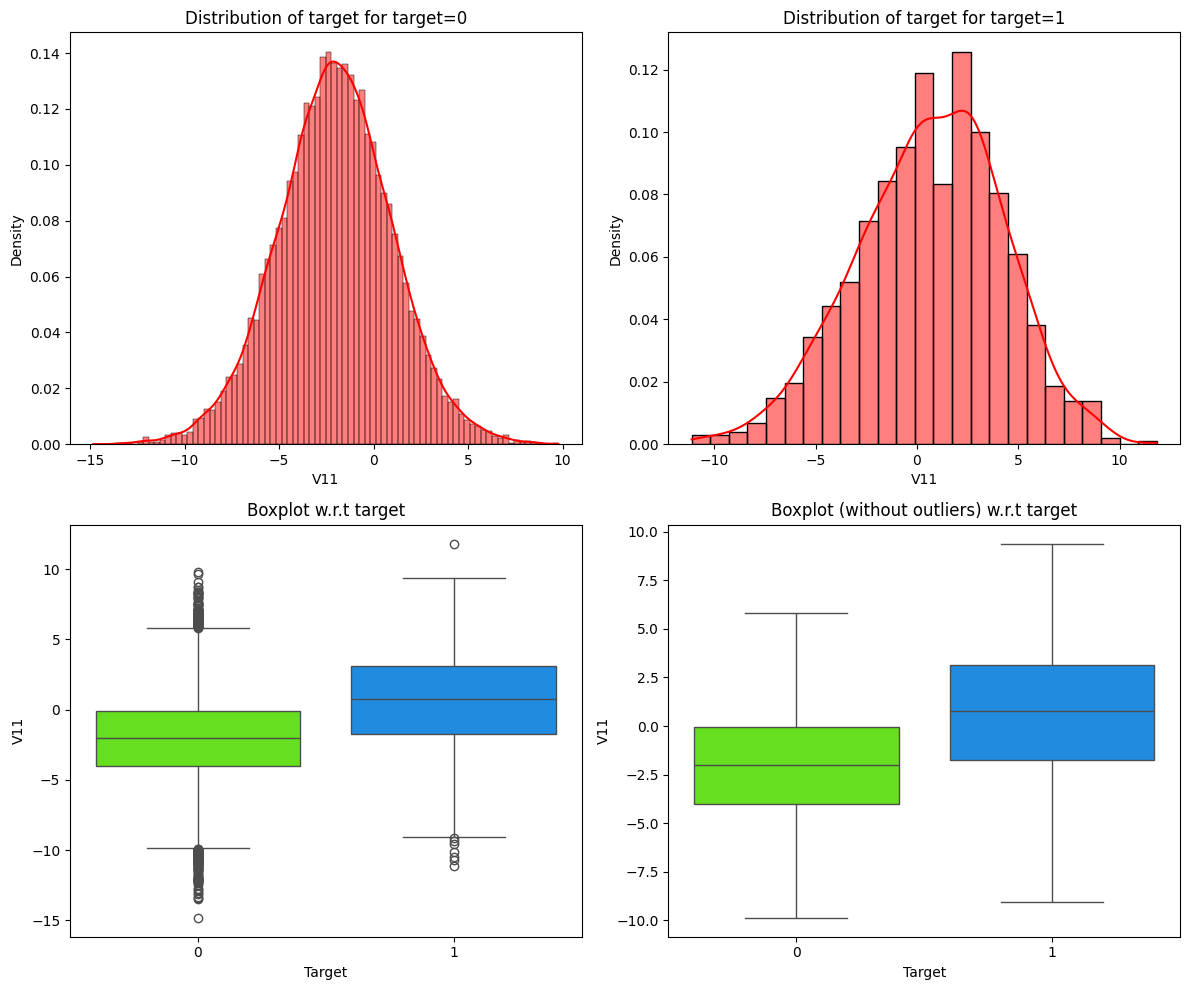

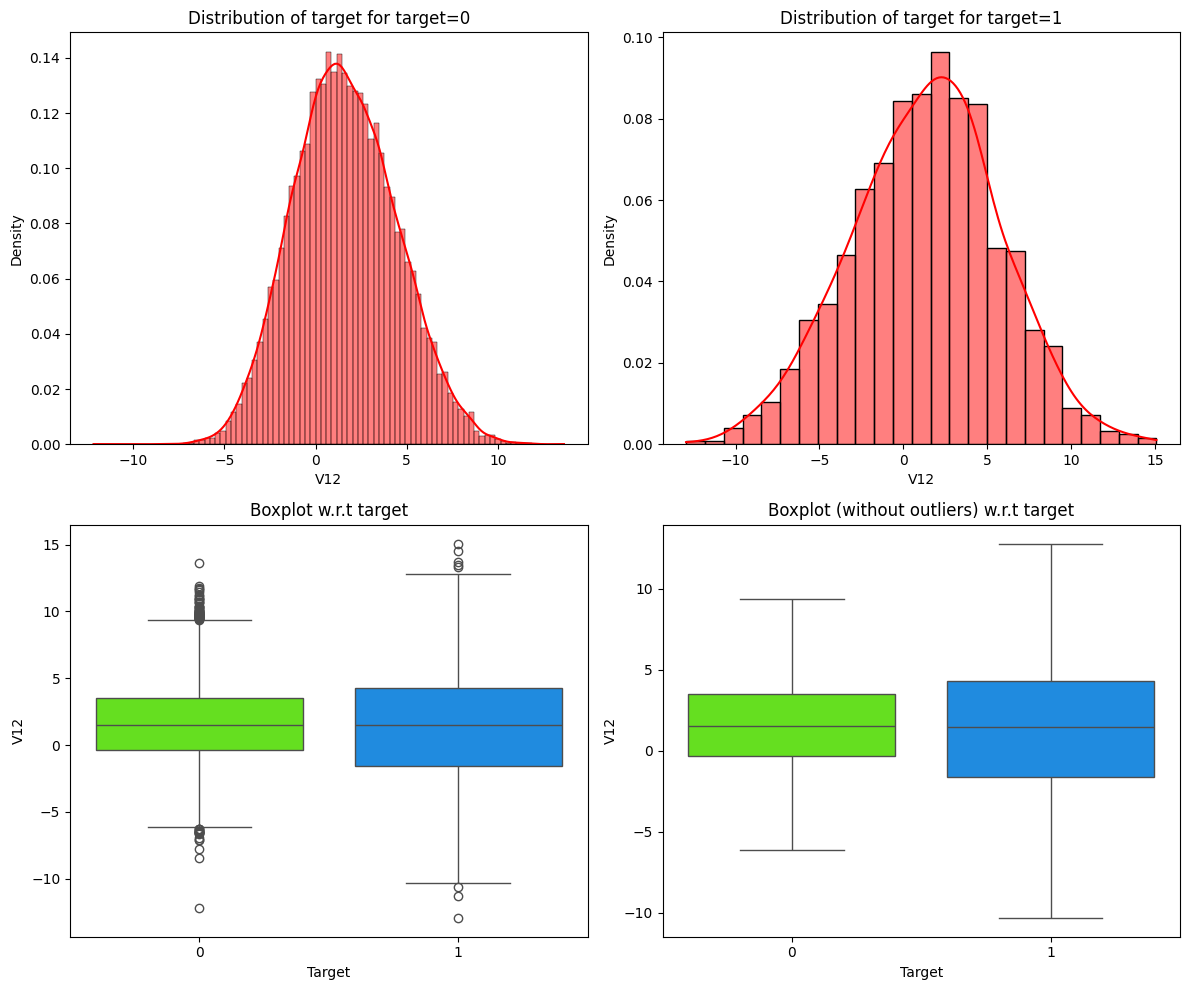

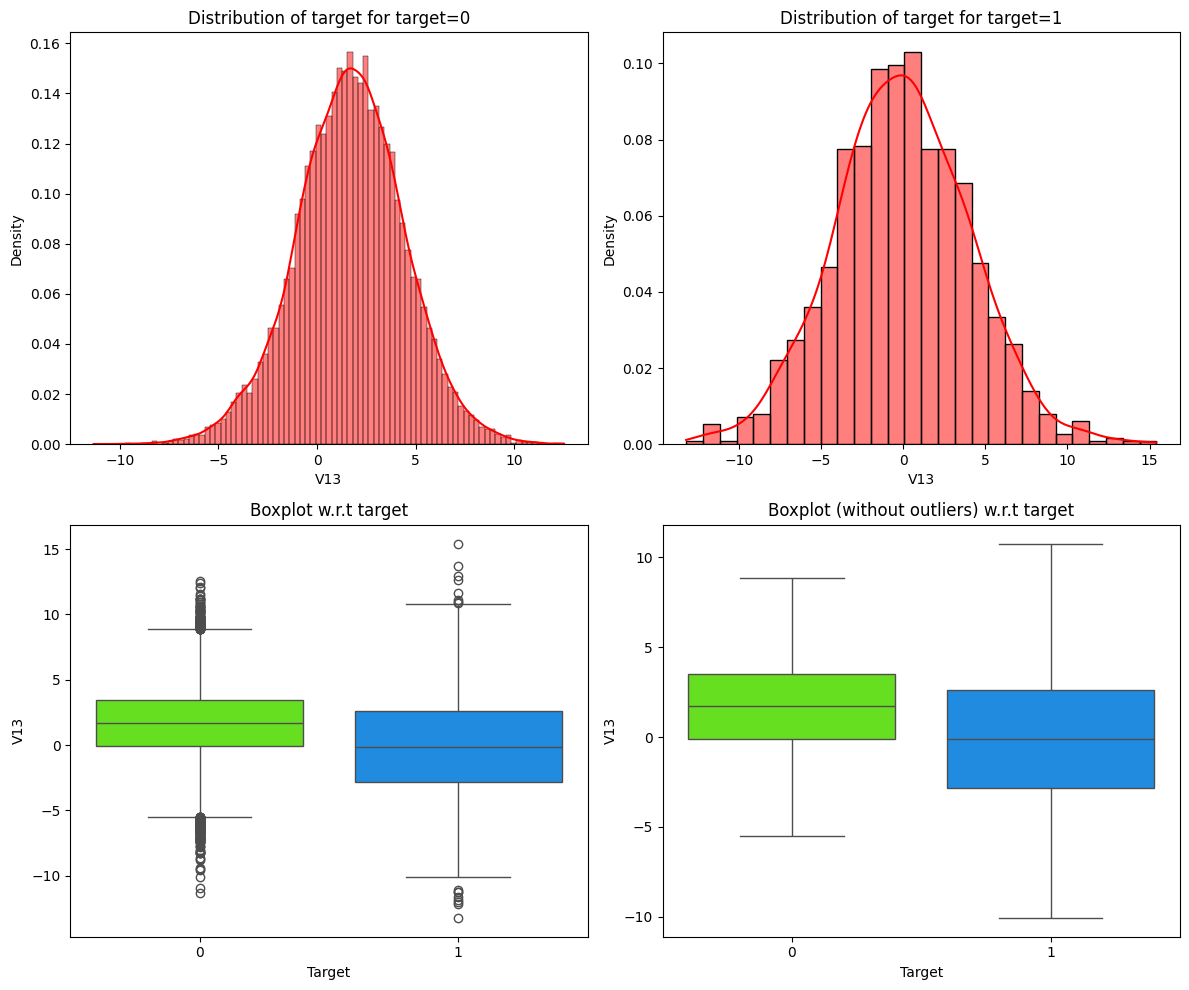

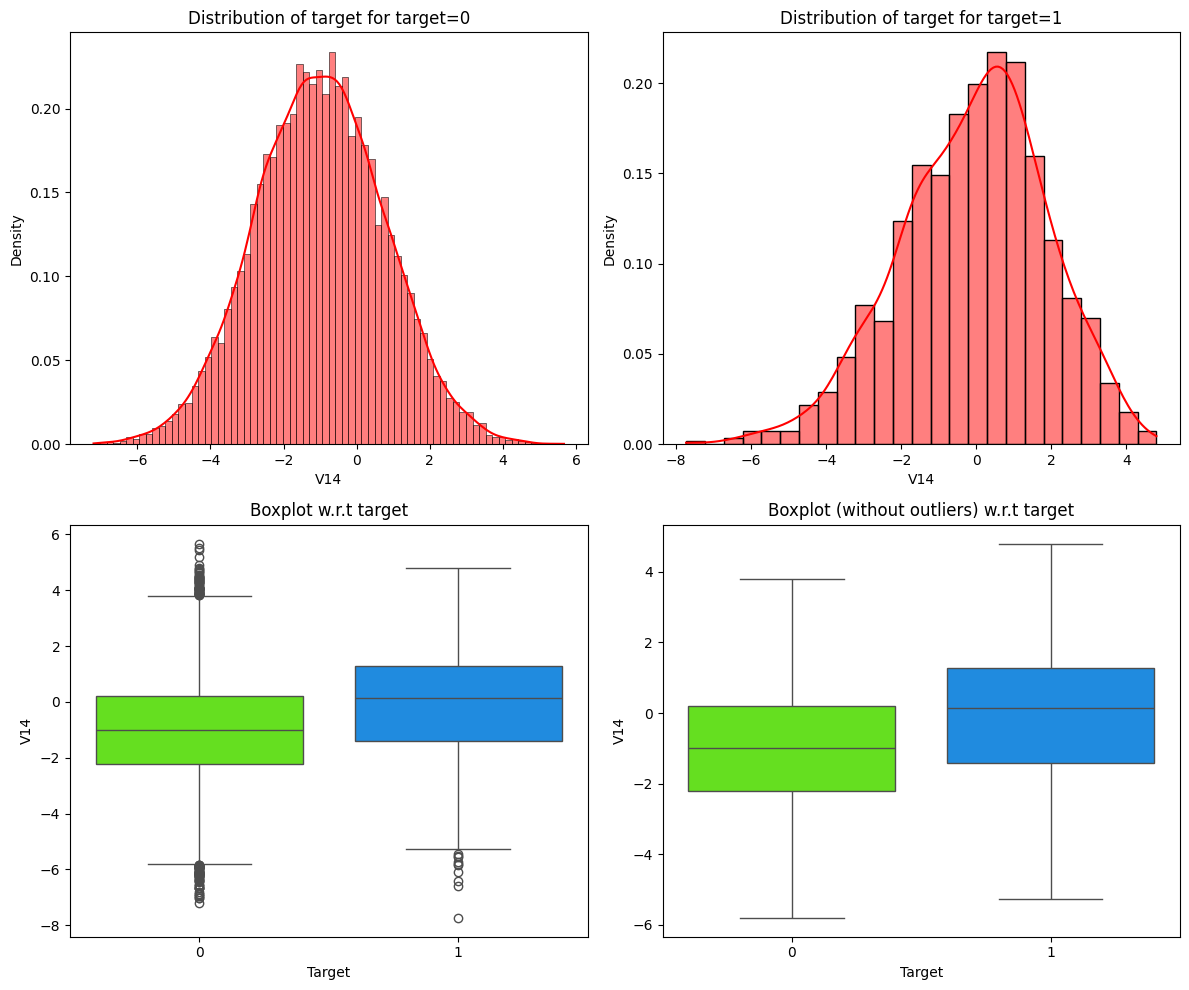

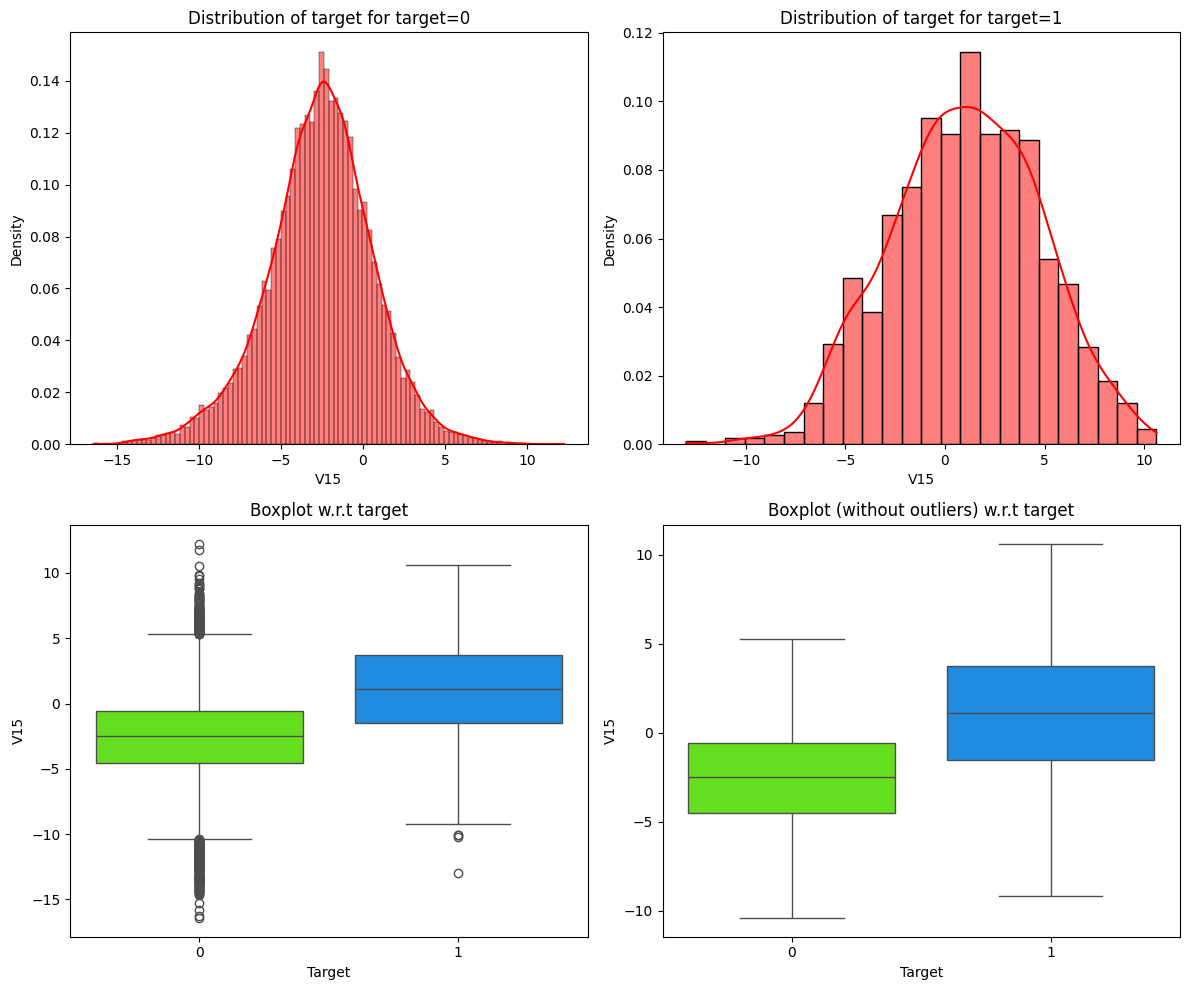

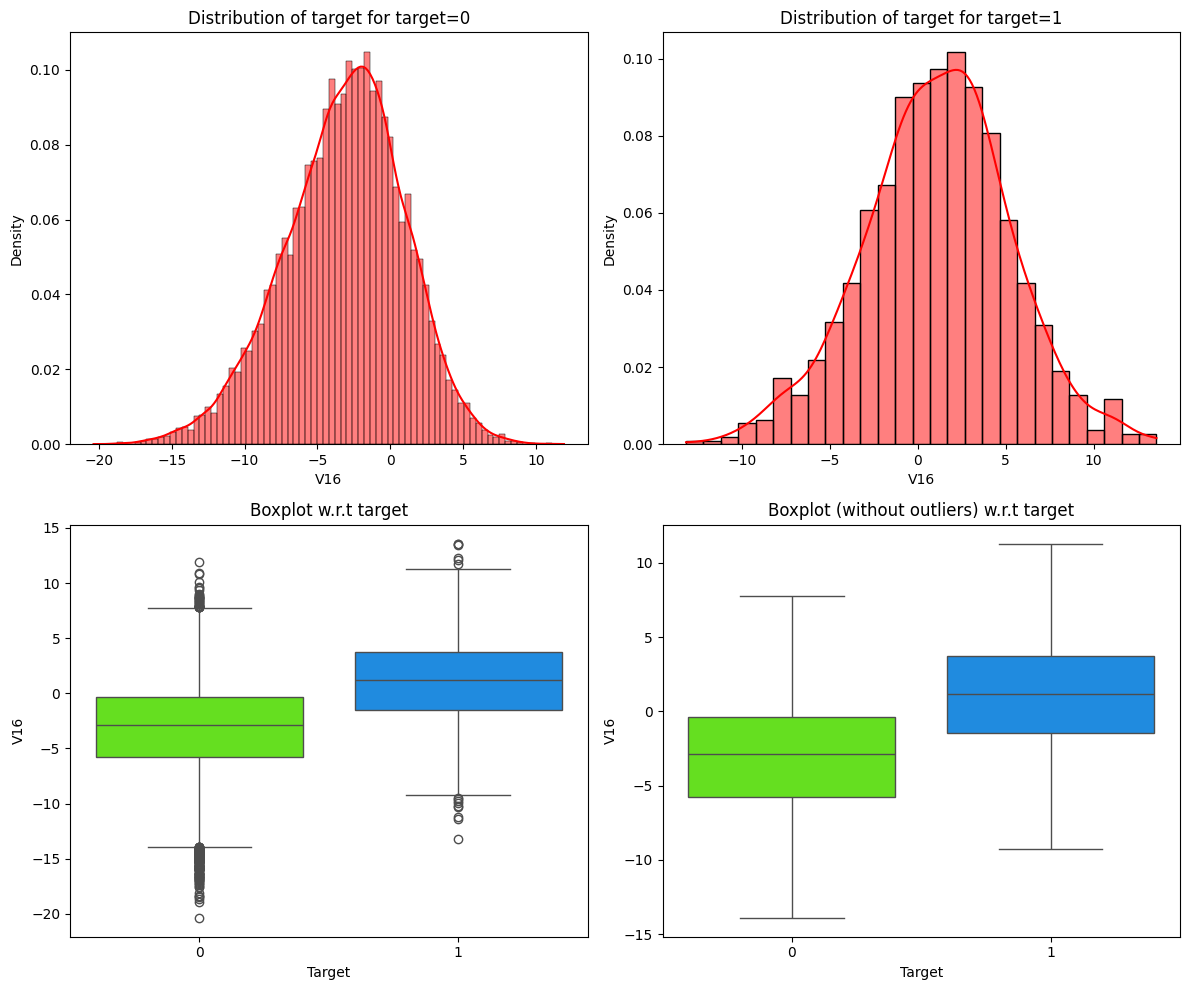

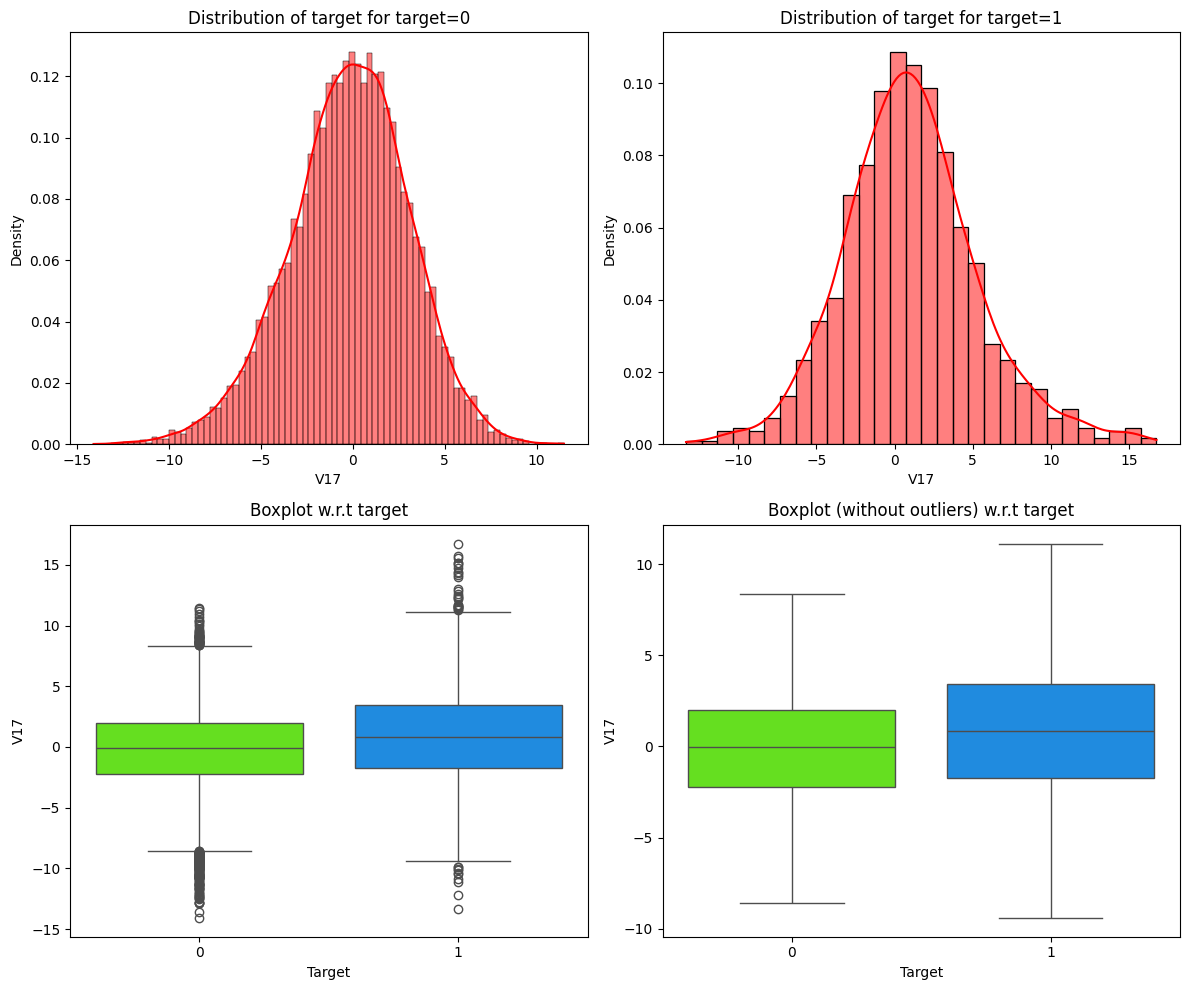

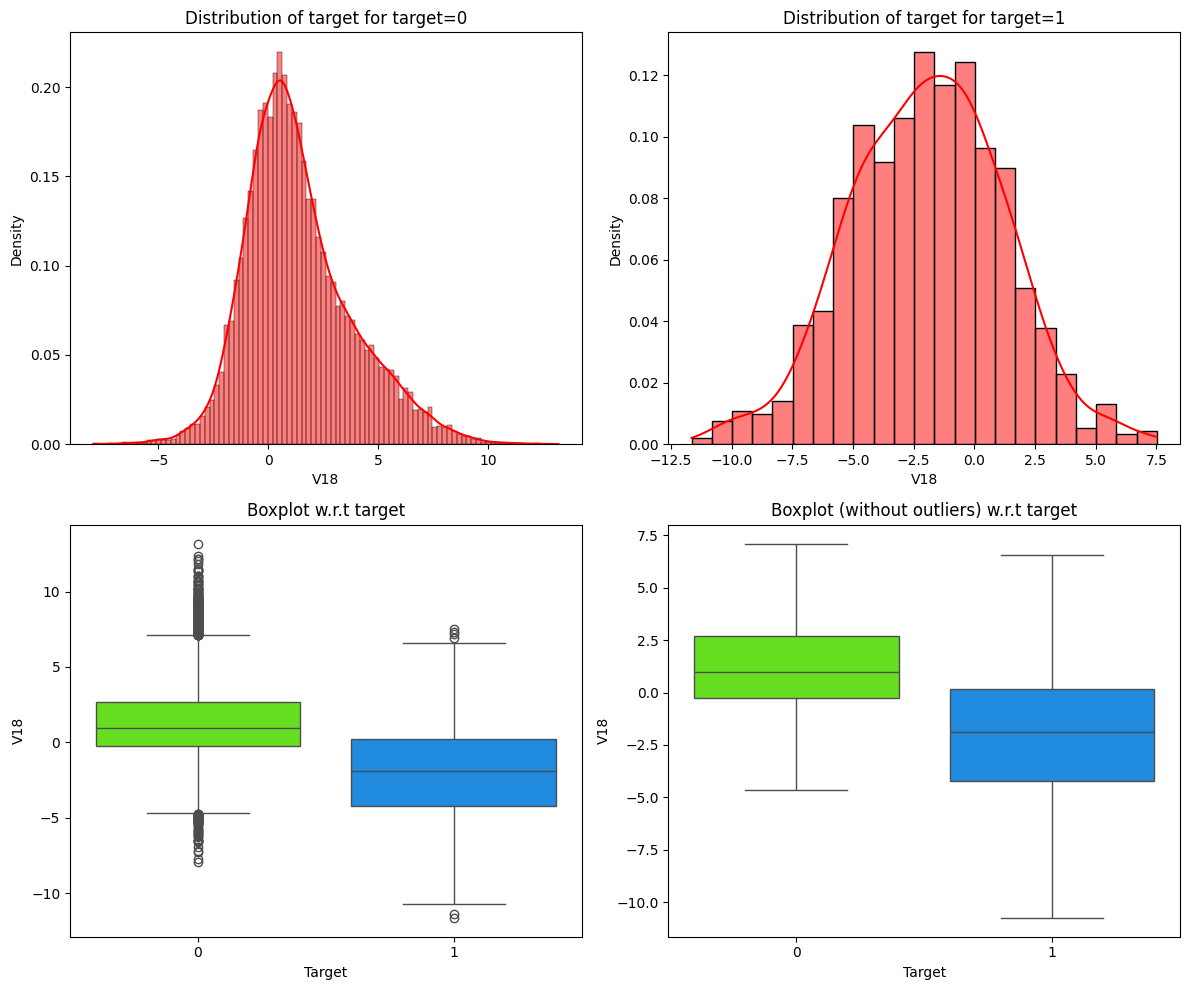

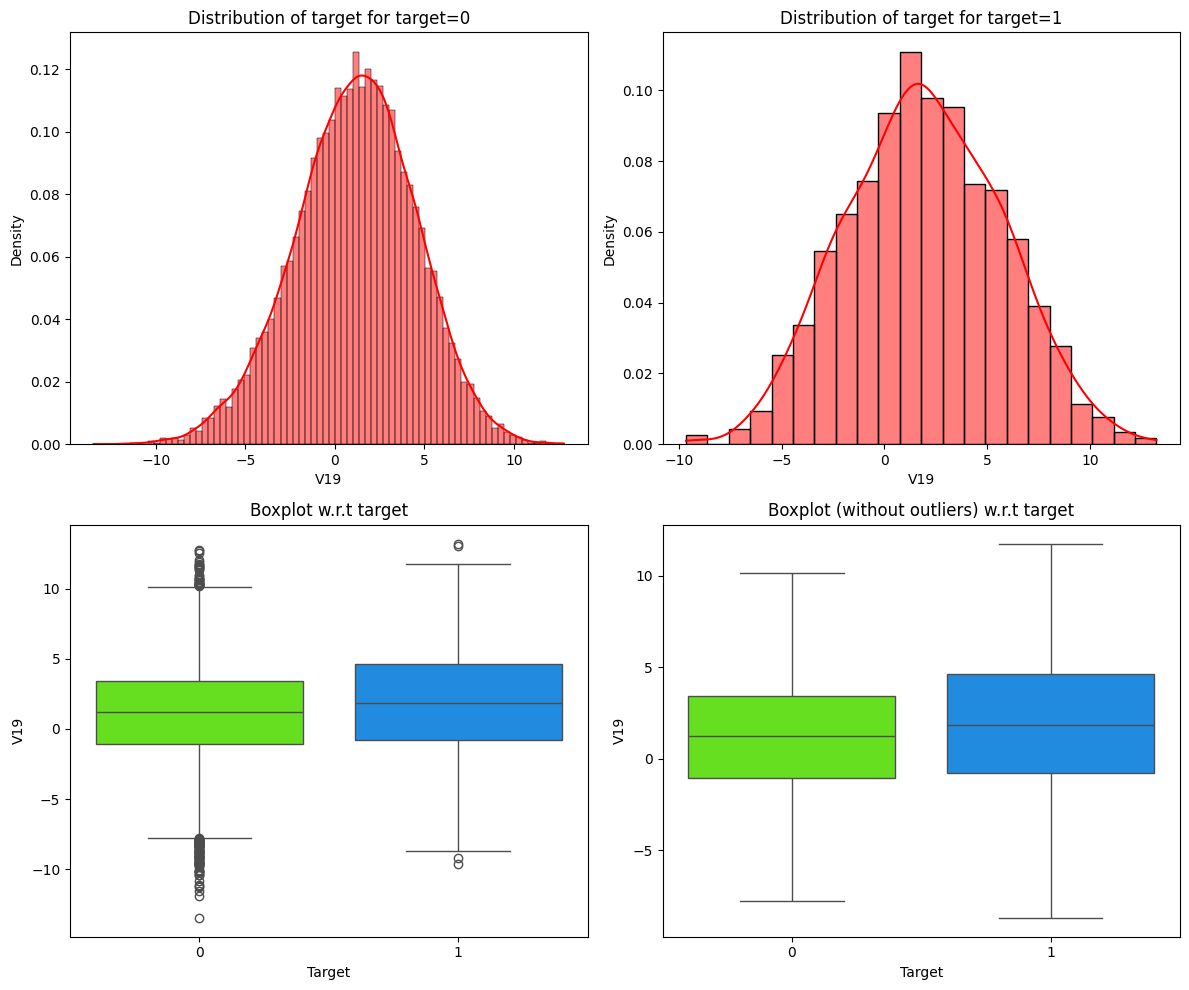

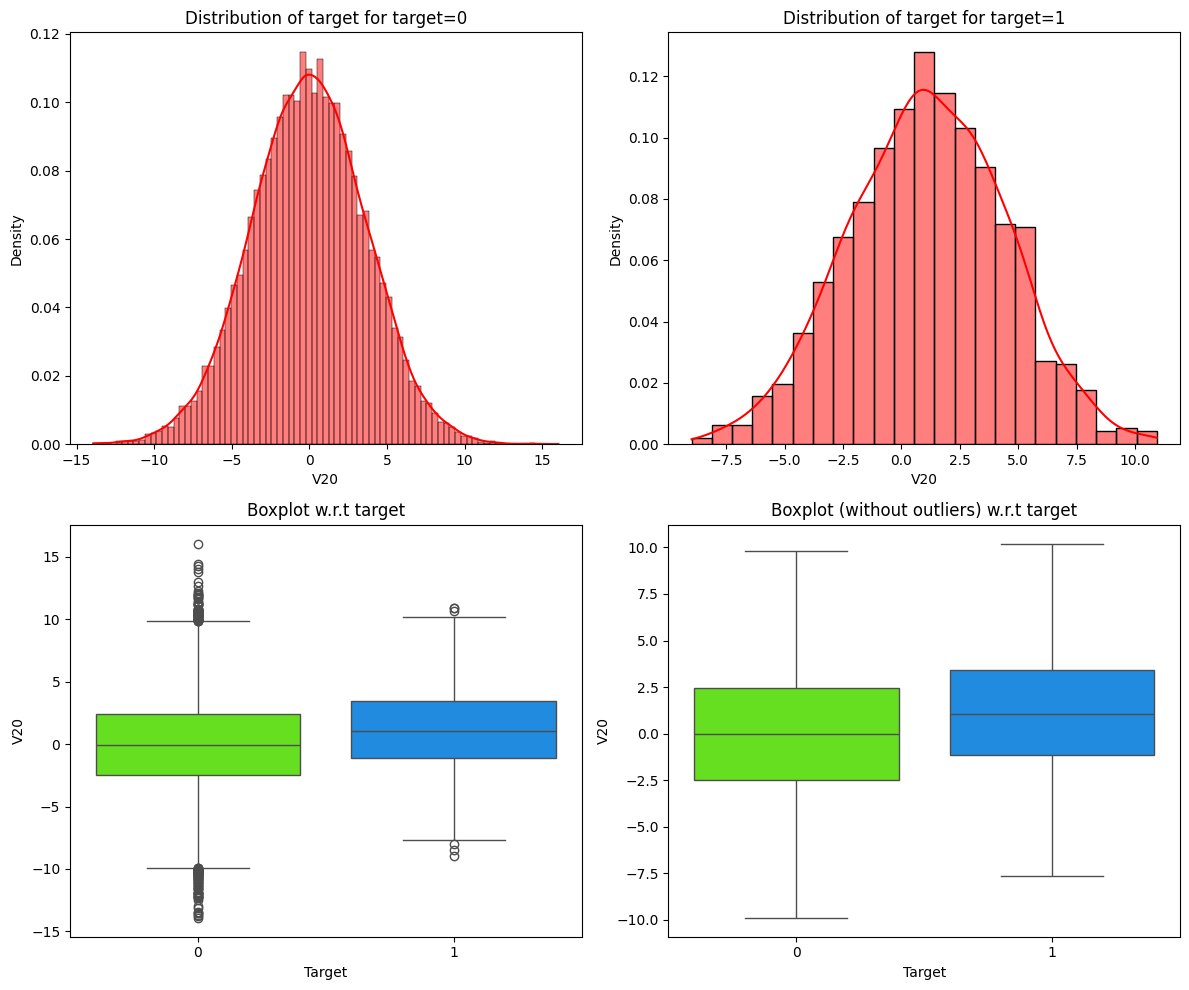

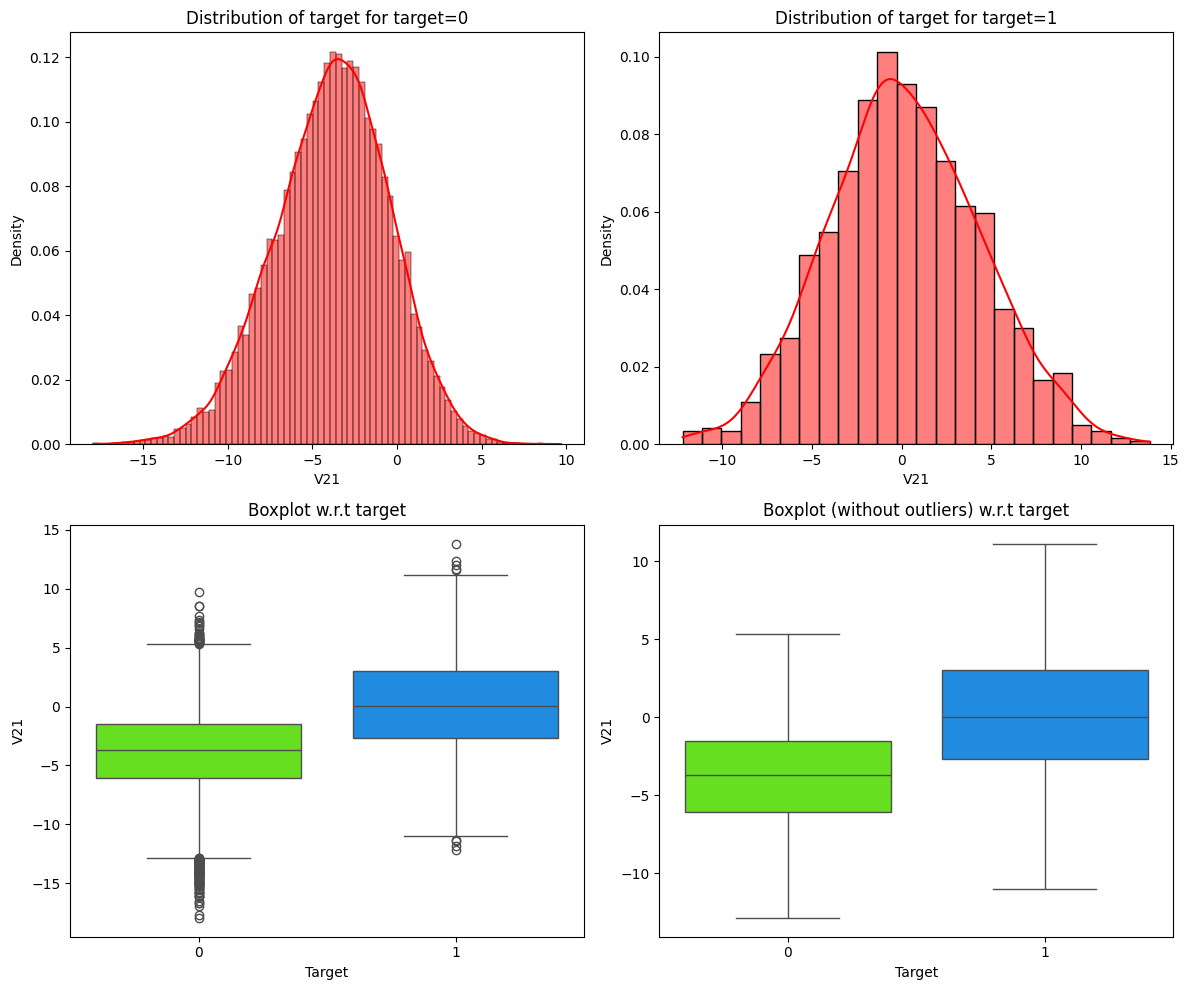

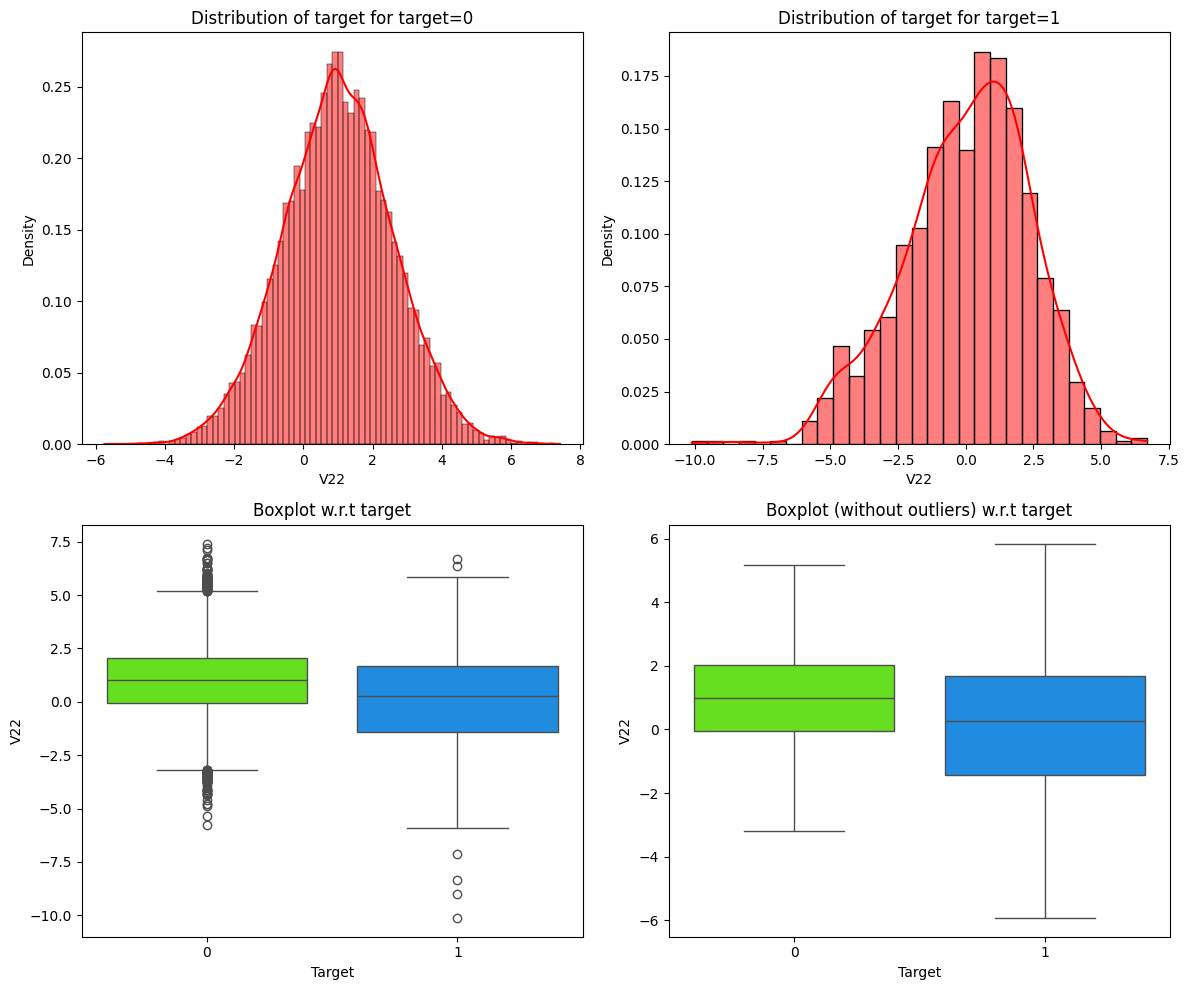

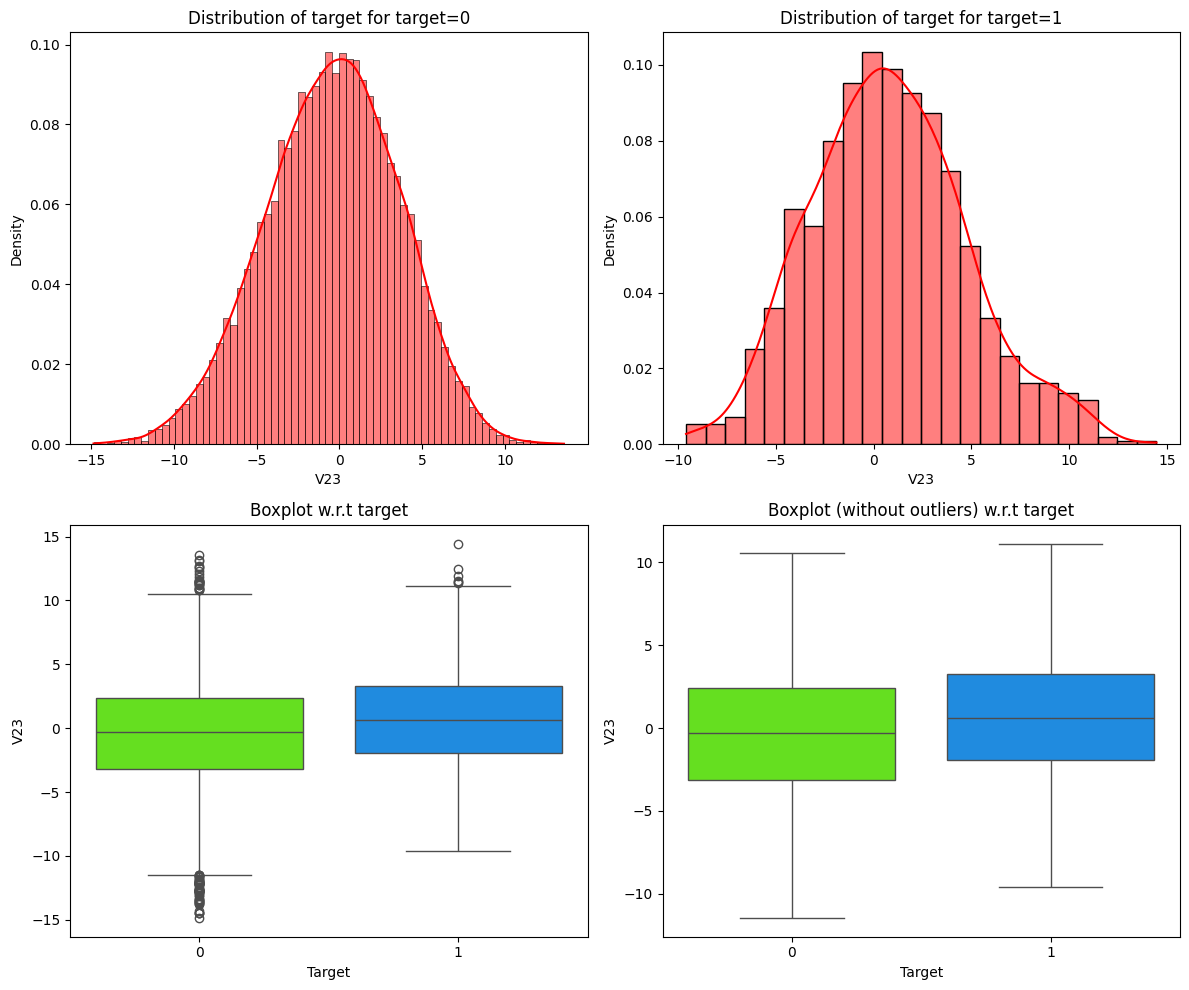

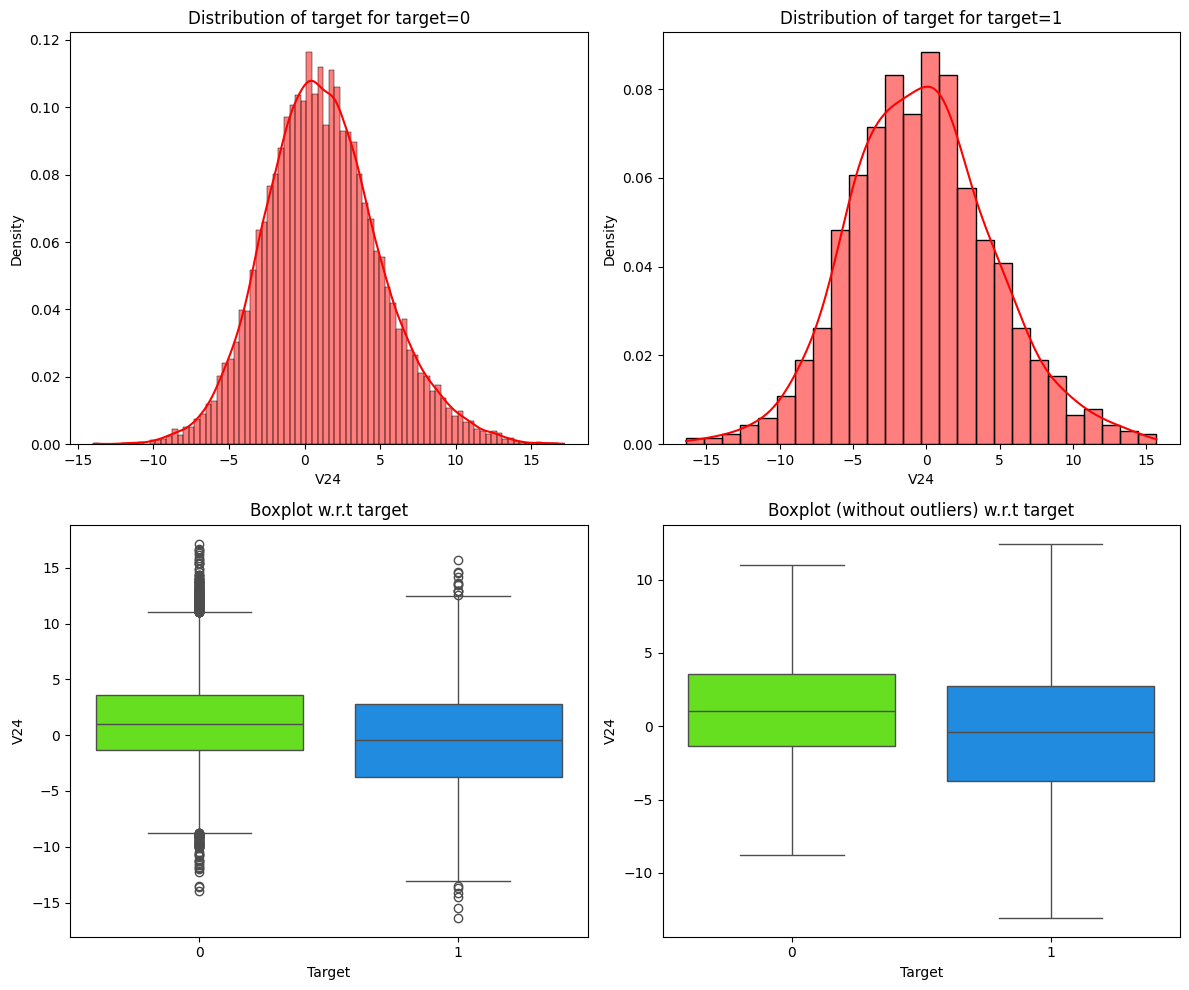

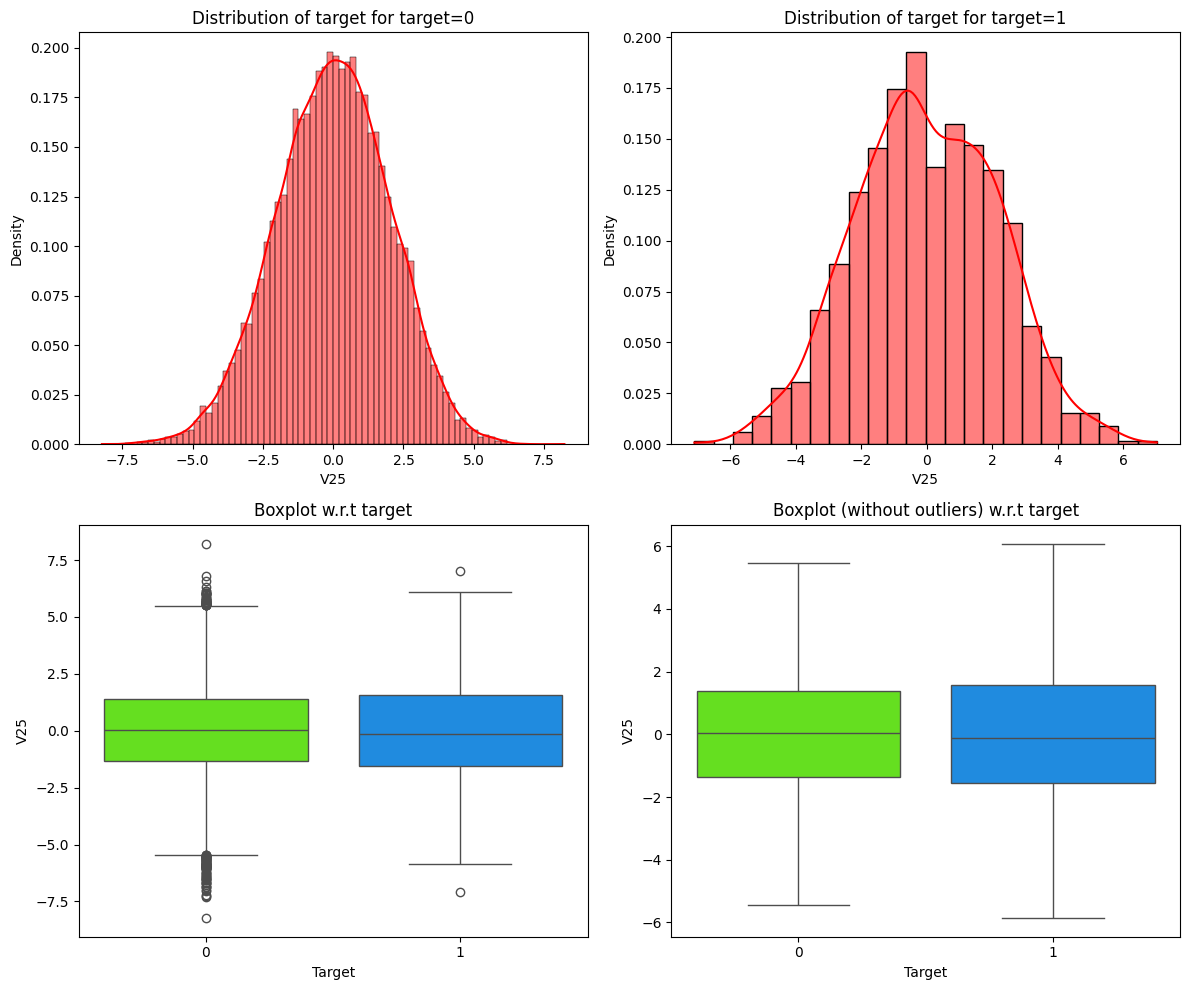

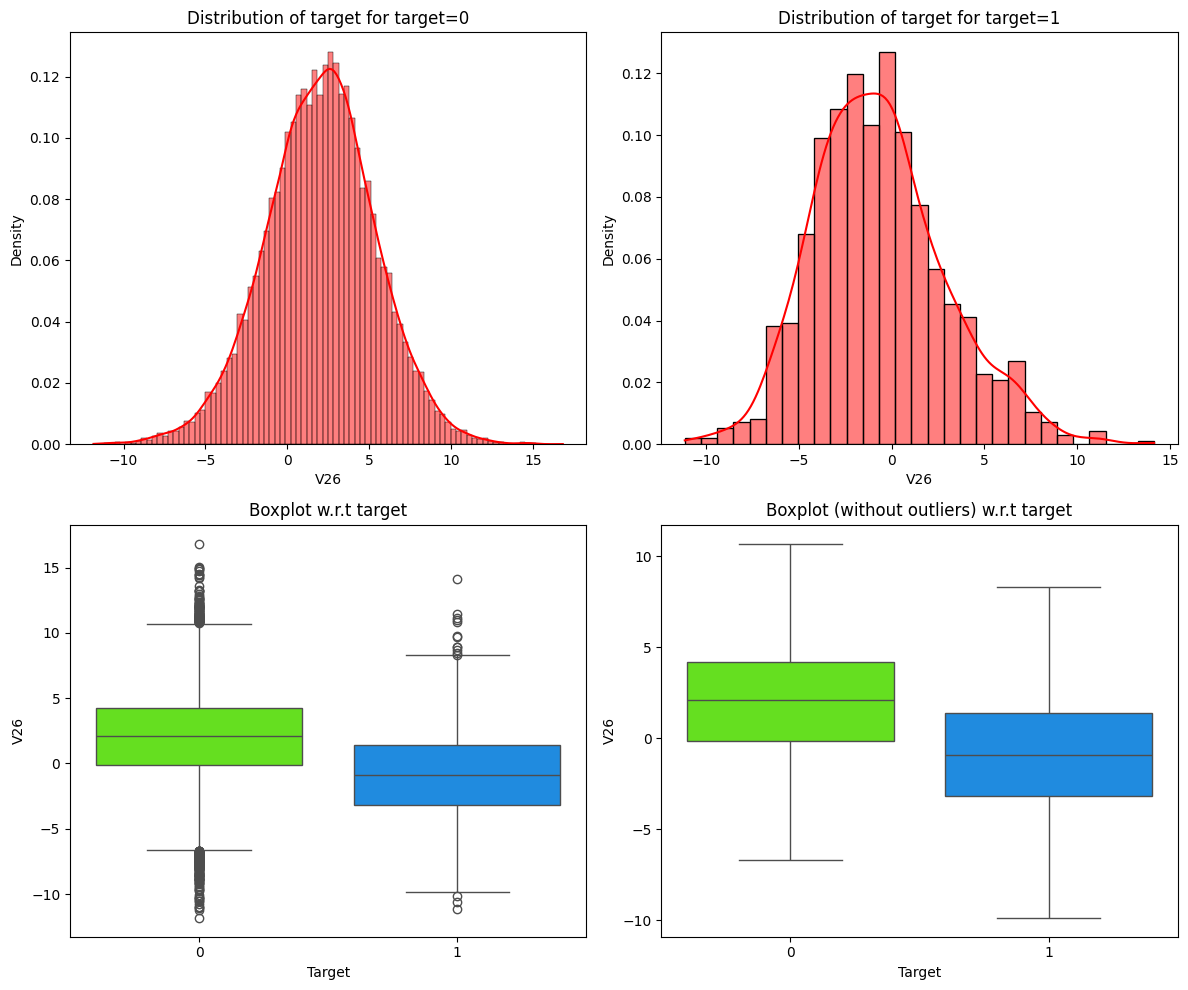

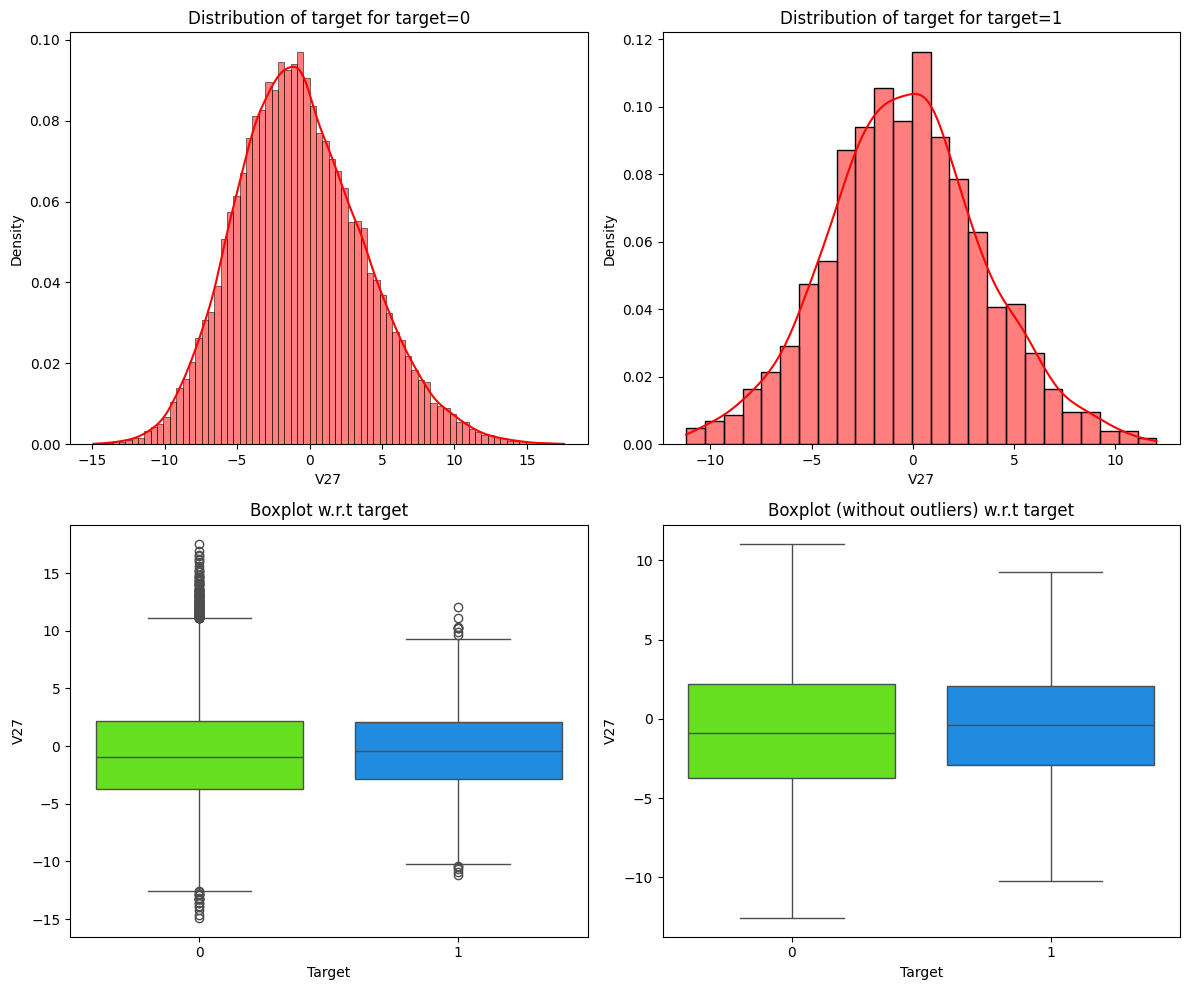

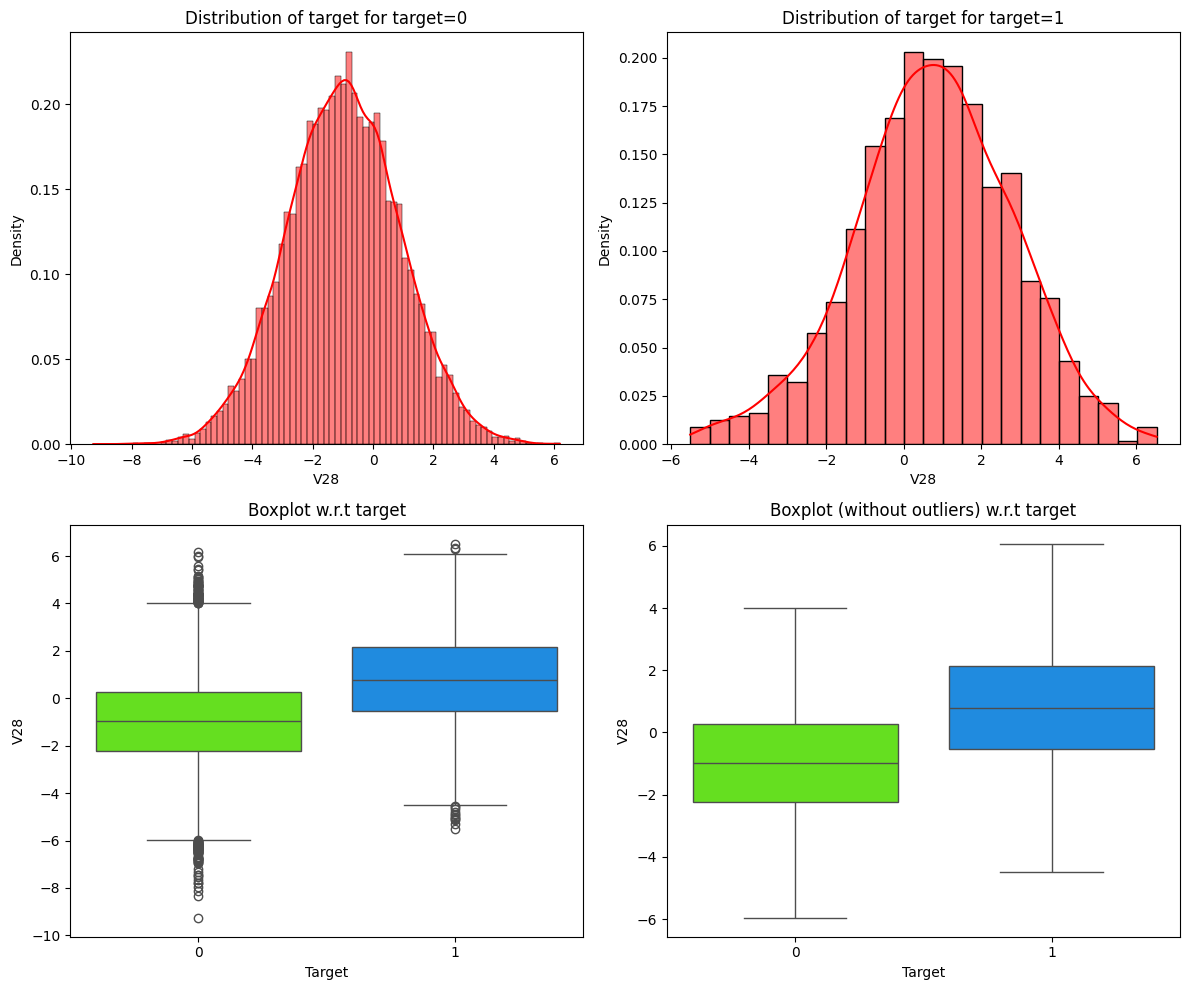

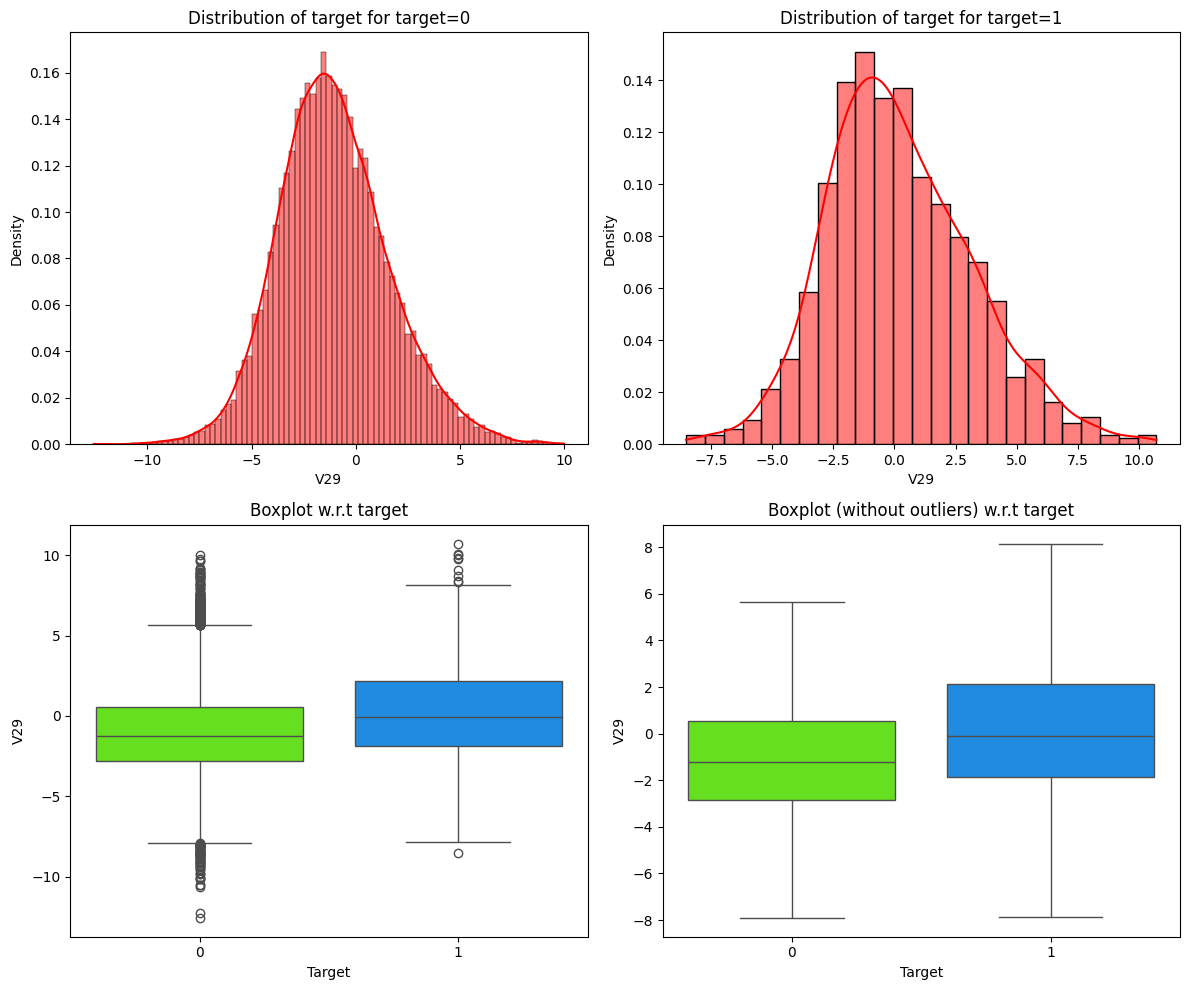

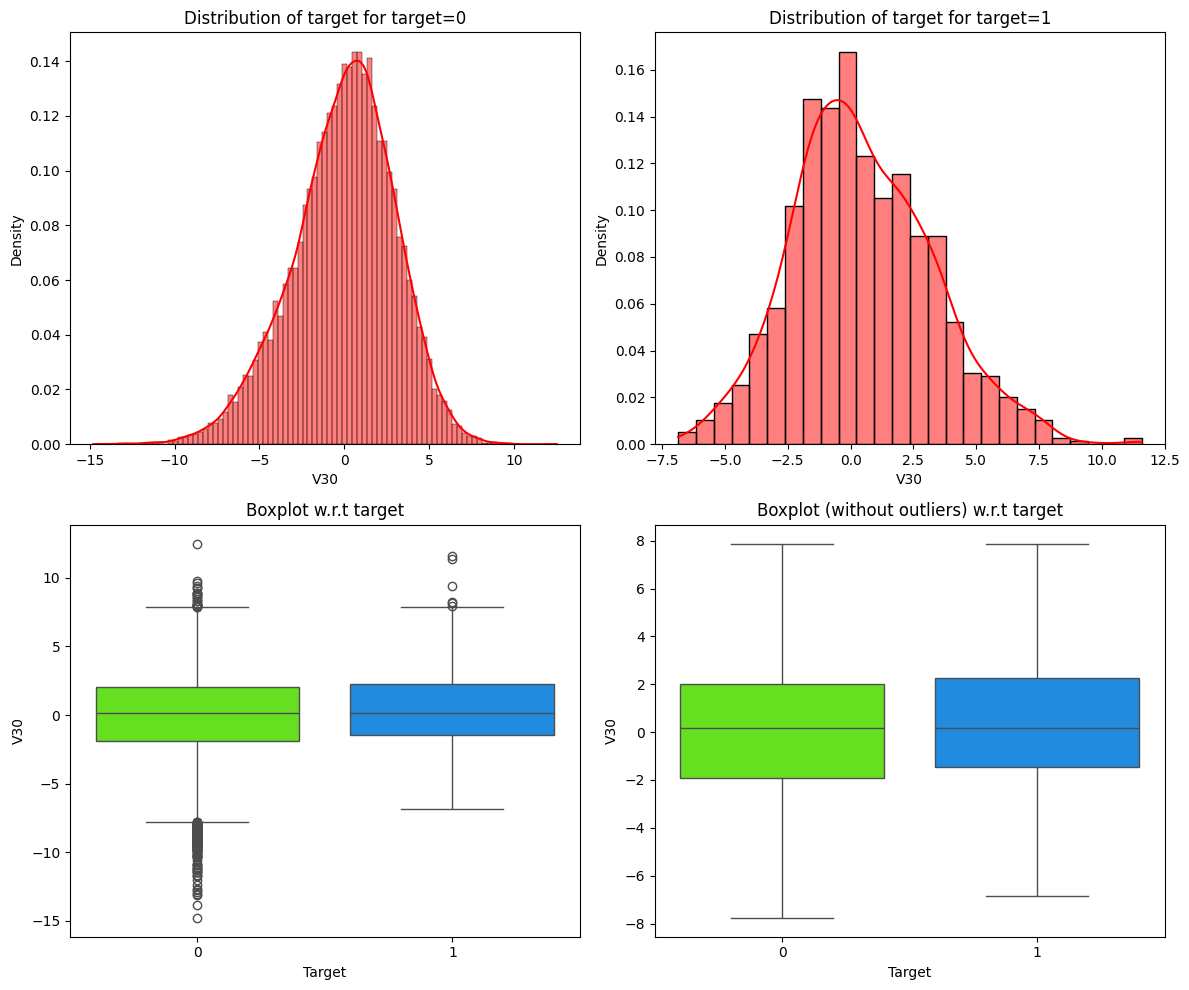

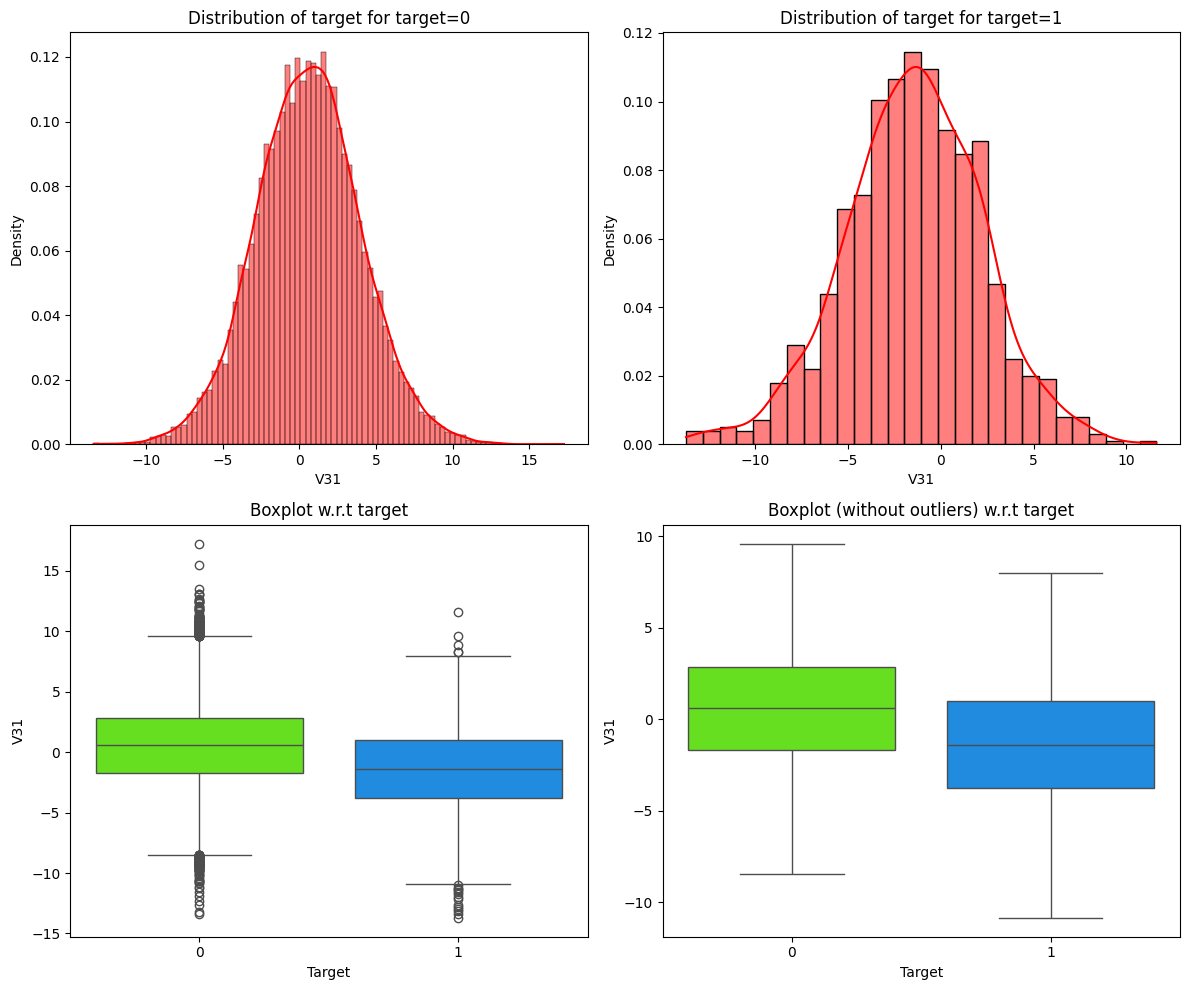

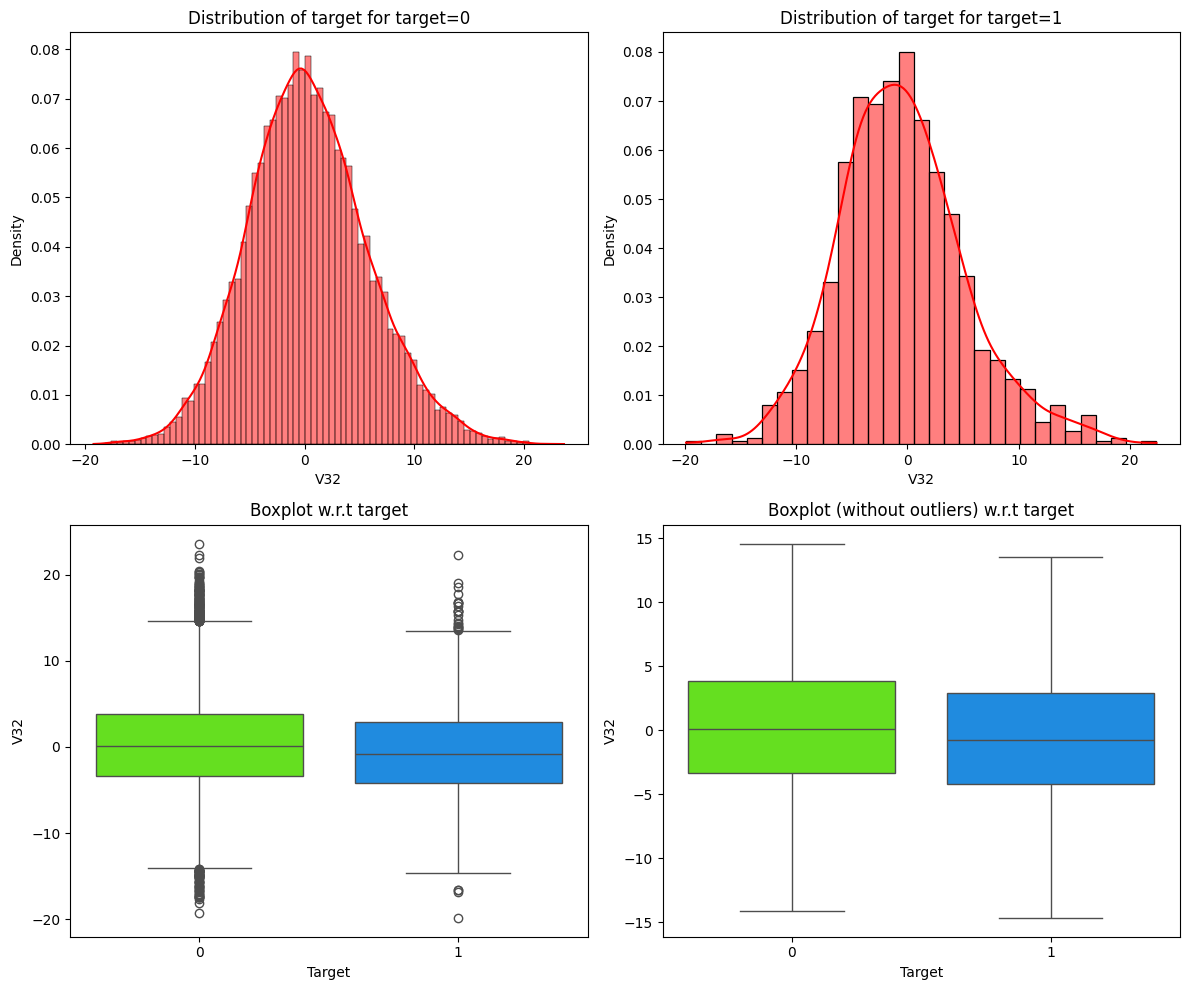

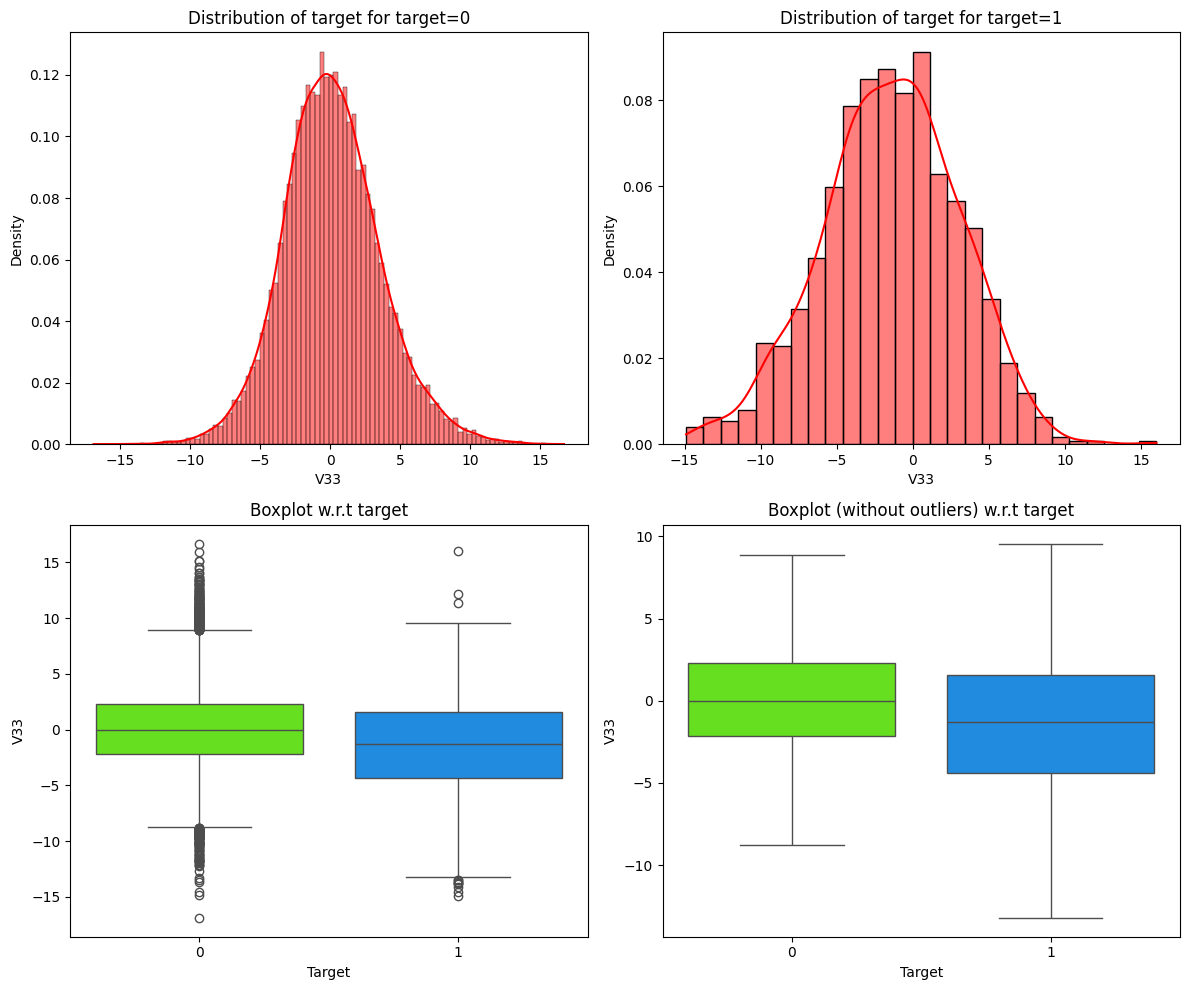

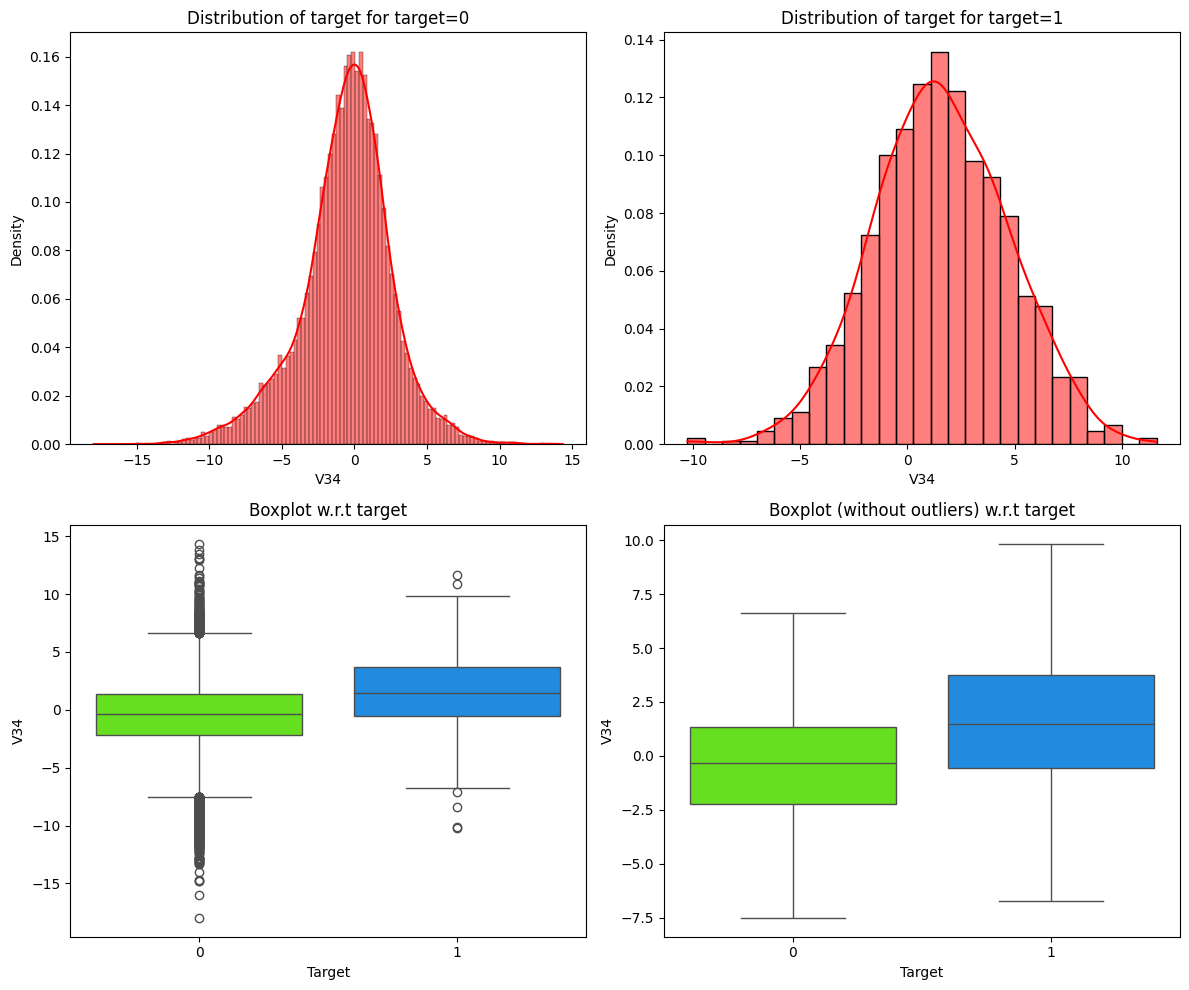

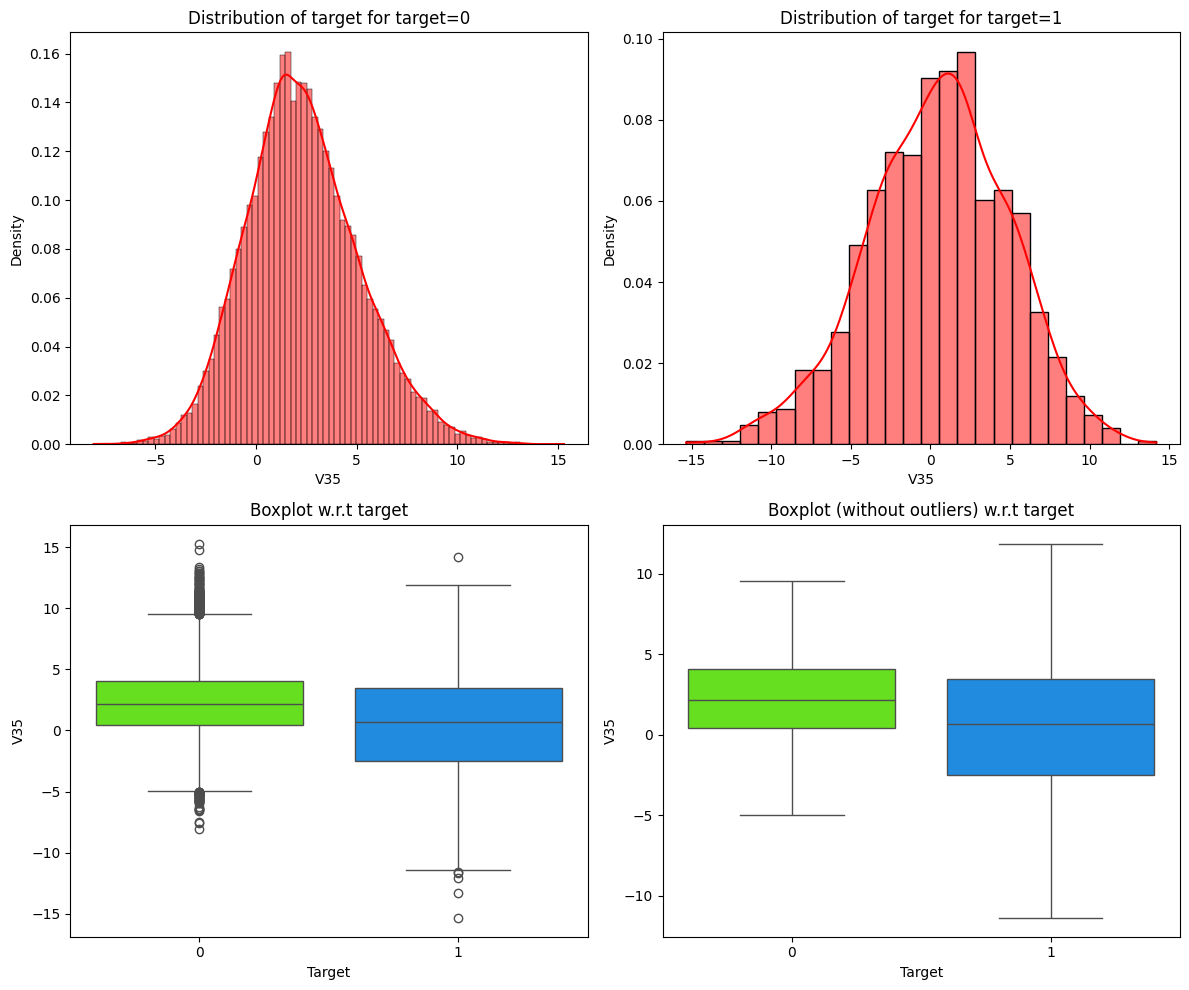

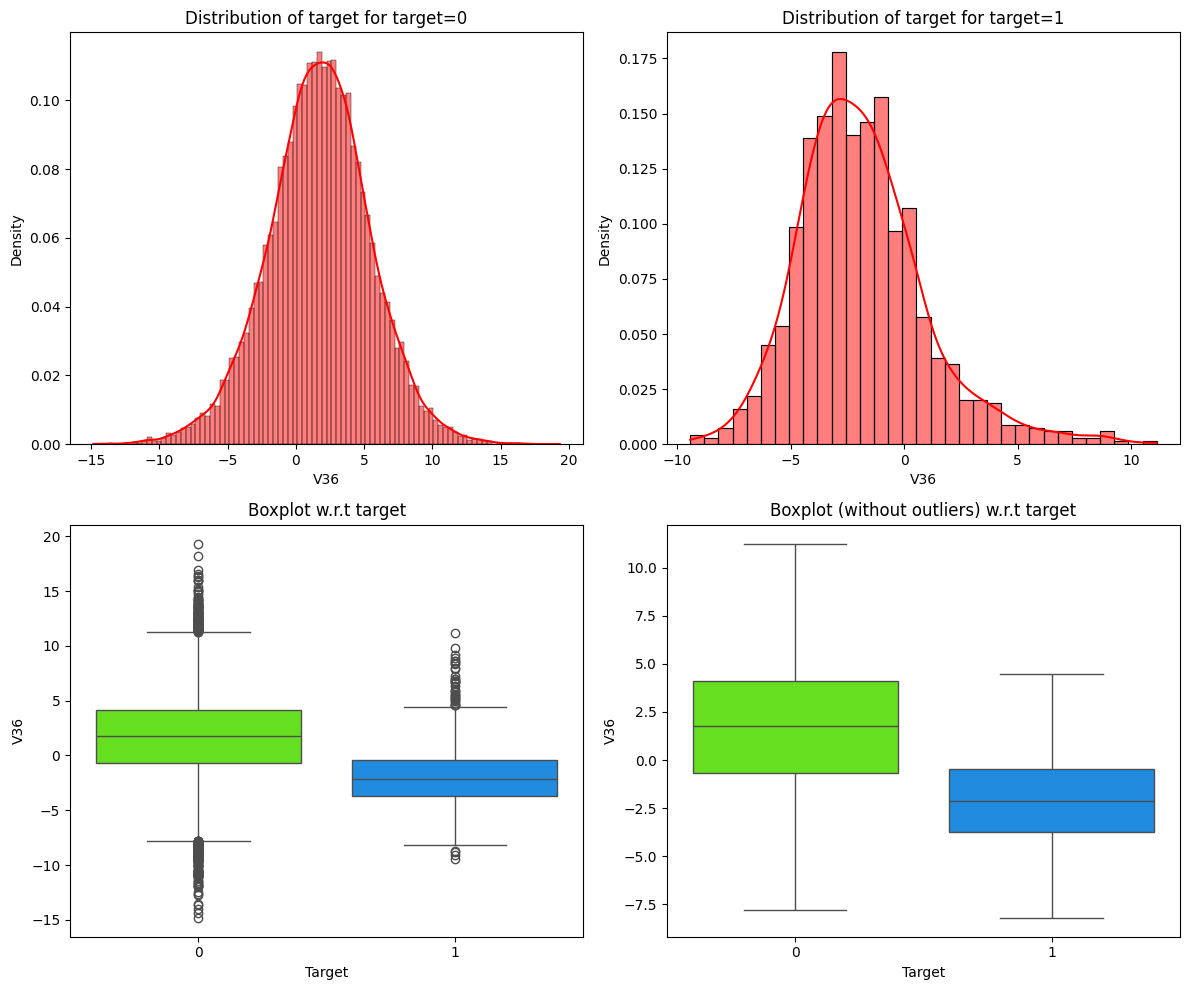

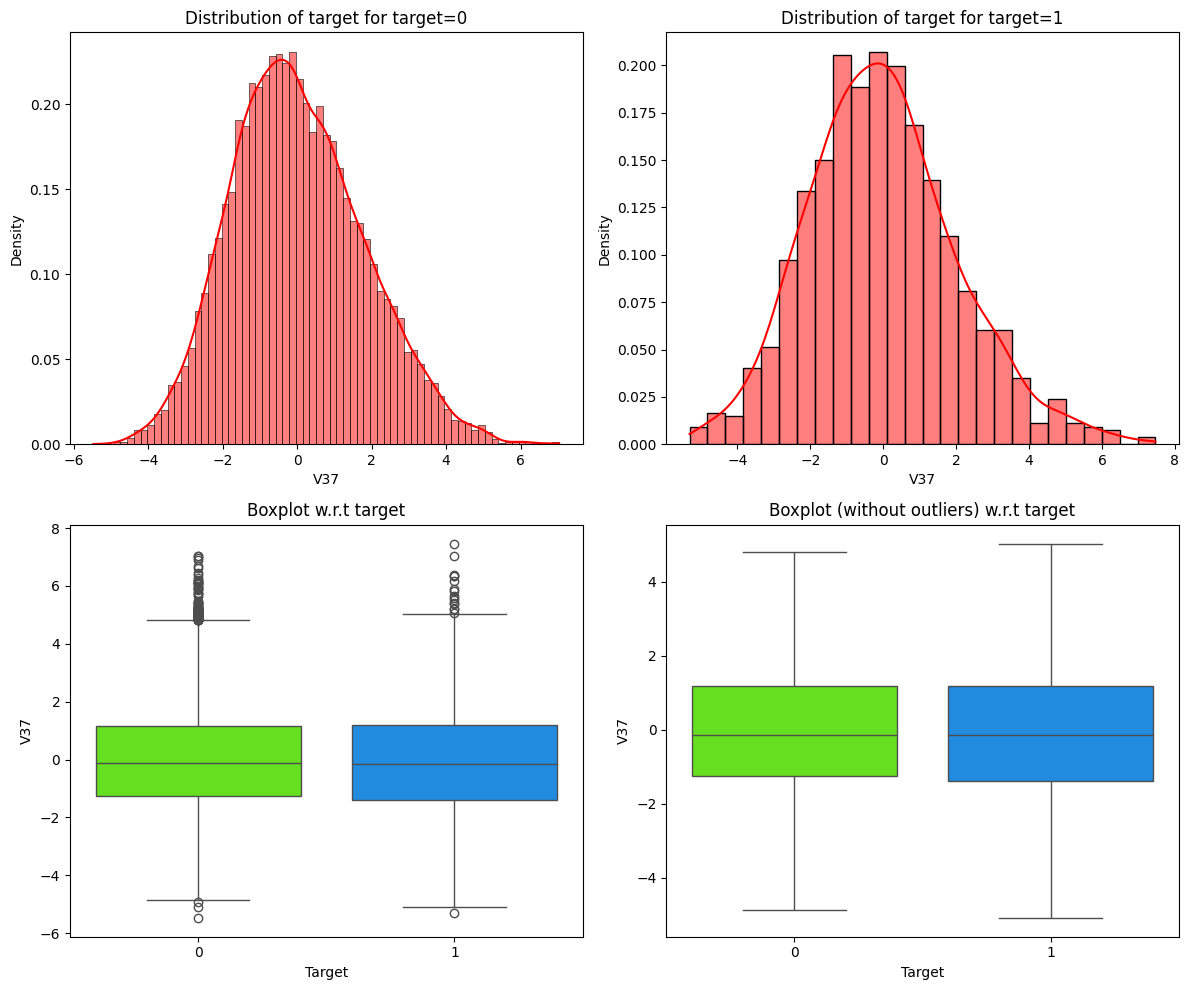

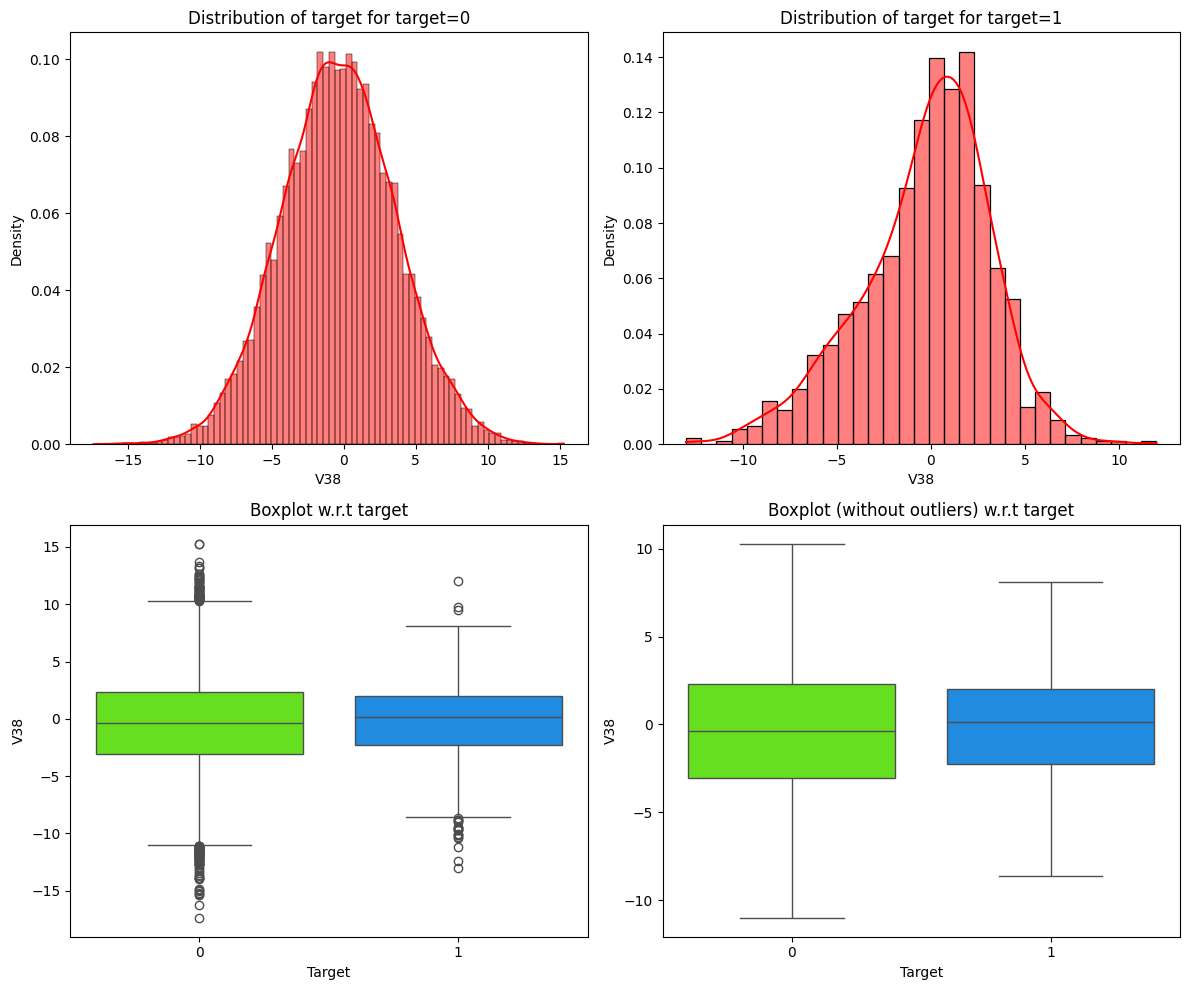

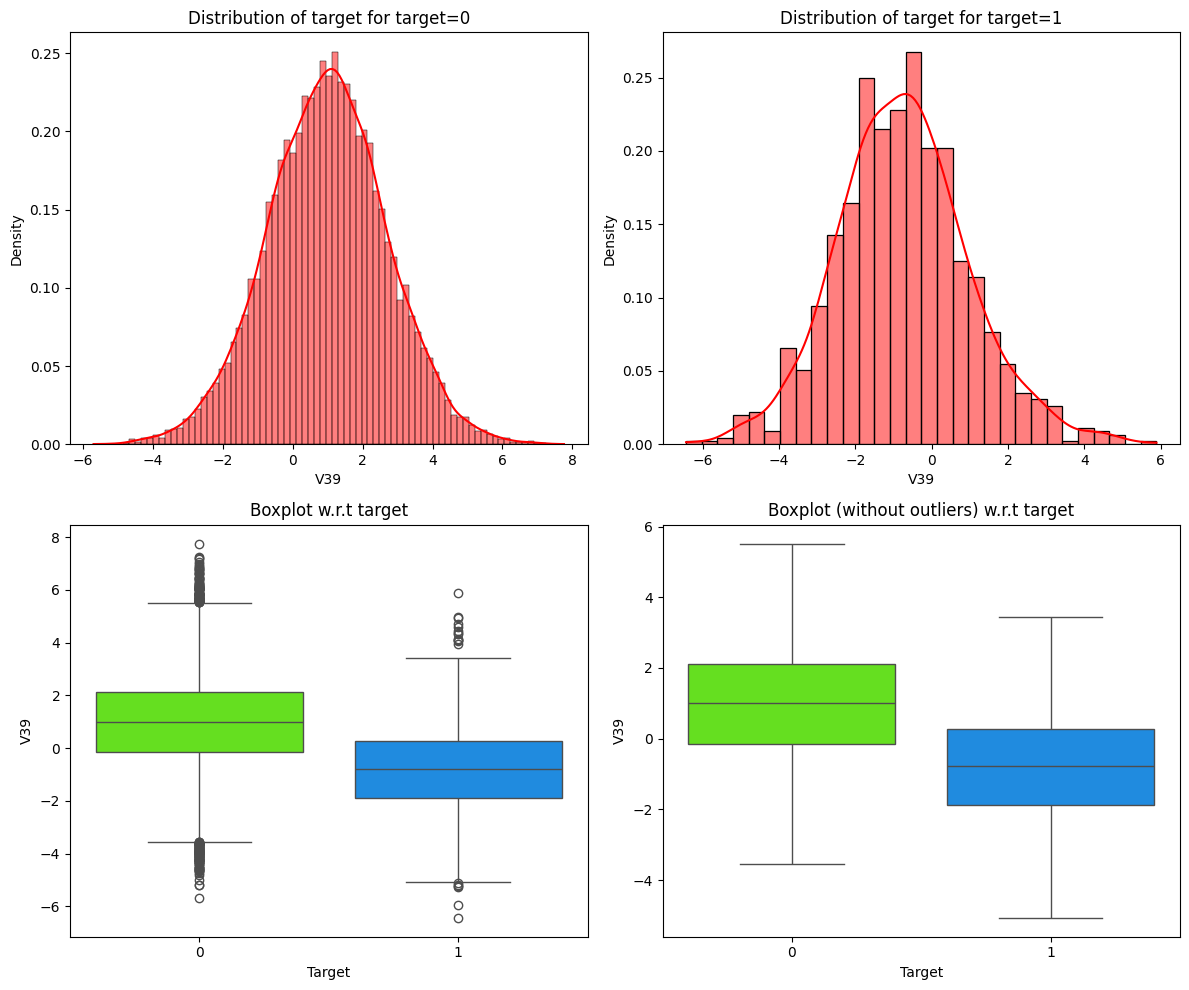

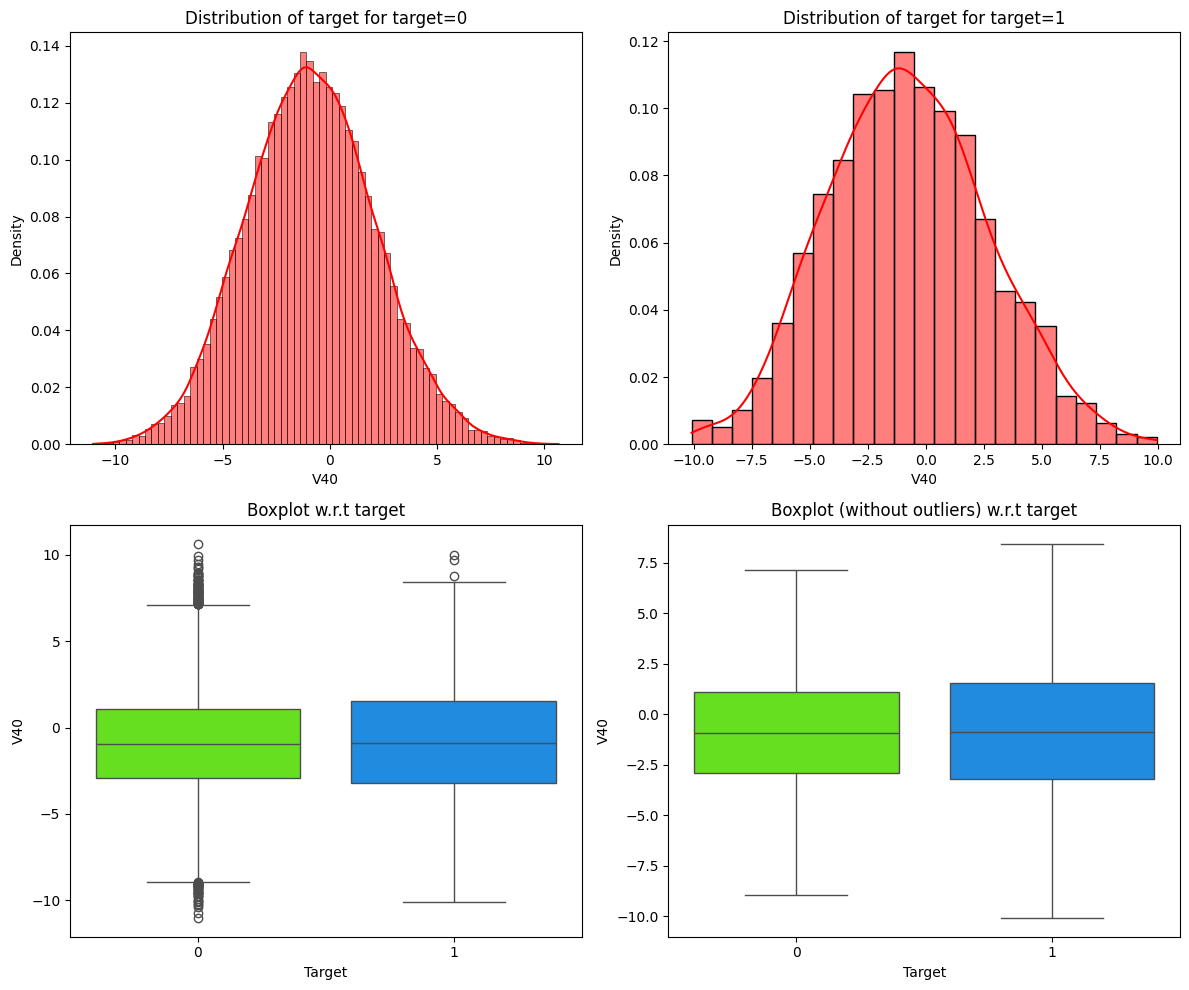

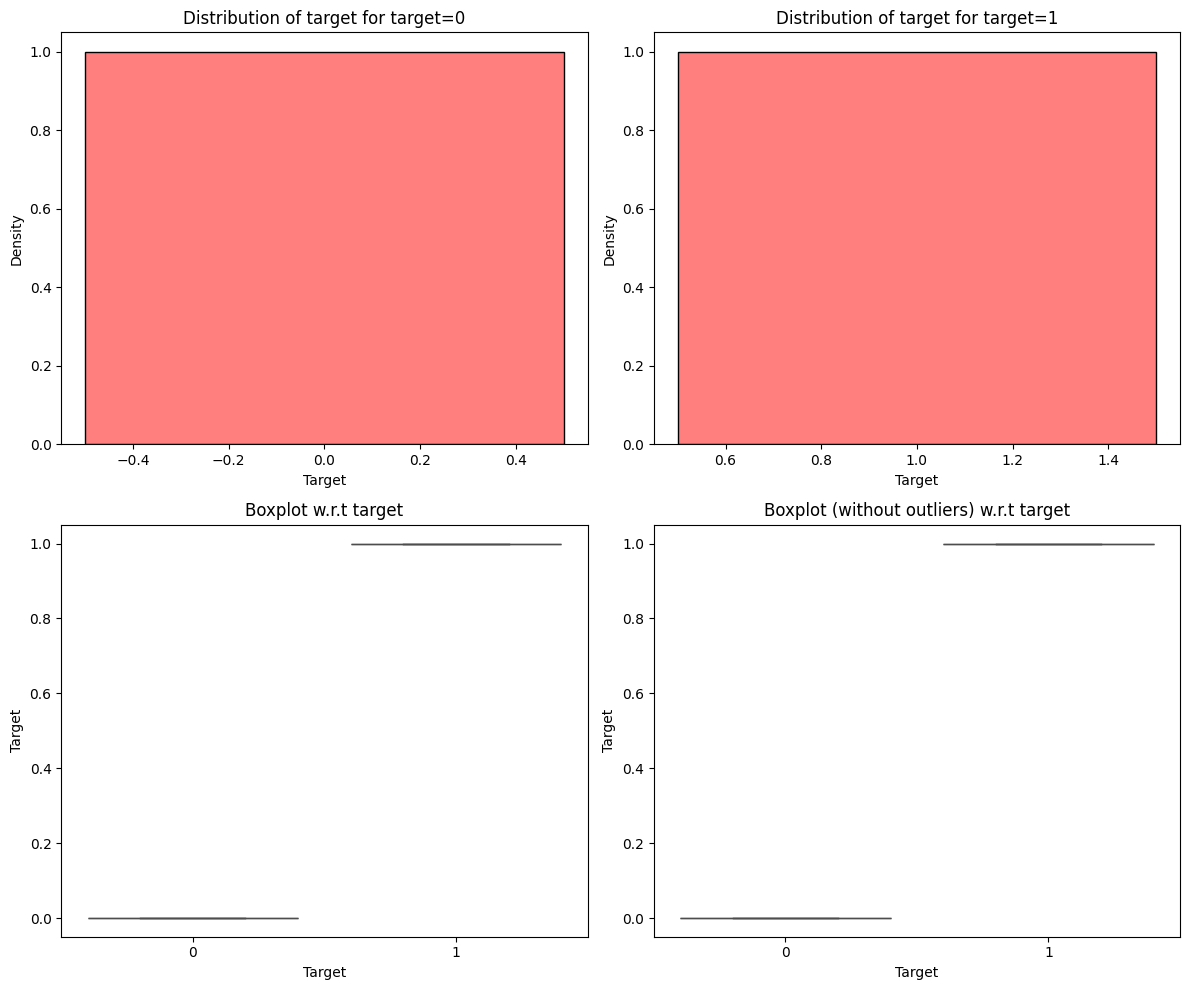

In [ ]:
for feature in data.columns:
    distribution_plot_wrt_target(data, predictor=feature, target='Target')

## Data Pre-processing

- split the train data

In [ ]:
# dividing train data into X and y
X = data.drop(["Target"], axis=1)
y = data["Target"]


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y
)

In [ ]:
# Checking the number of rows and columns in the X_train data
print(X_train.shape)
# Checking the number of rows and columns in the X_val data
print(X_val.shape)


(15000, 40)
(5000, 40)


- split the test data

In [ ]:
# Dividing test data into X_test and y_test
X_test = data_test.drop(["Target"], axis=1)
y_test = data_test["Target"]


# Checking the number of rows and columns in the X_test data
X_test.shape

(5000, 40)

## Missing value imputation




In [ ]:
# Creating an instance of the imputer to be used
imputer = SimpleImputer(strategy="median")


In [ ]:
# Fit and transform the trin data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation dataa
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)


In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isnull().sum())
print("-" * 30)

print(X_val.isnull().sum())
print("-" * 30)
print(X_test.isnull().sum())


V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

Sample Decision Tree model building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric='logloss')))


In [ ]:
results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.6982829521679532
Logistic regression: 0.4927566553639709
Bagging: 0.7210807301060529
Random forest: 0.7235192266070268
Gradient Boosting: 0.7066661857008874
AdaBoost: 0.6309140754635308
XGBoost: 0.8100497799581561

Validation Performance:

dtree: 0.7050359712230215
Logistic regression: 0.4856115107913669
Bagging: 0.7302158273381295
Random forest: 0.7266187050359713
Gradient Boosting: 0.7230215827338129
AdaBoost: 0.6762589928057554
XGBoost: 0.8309352517985612


- XGBoost doing well on the train and the validation  

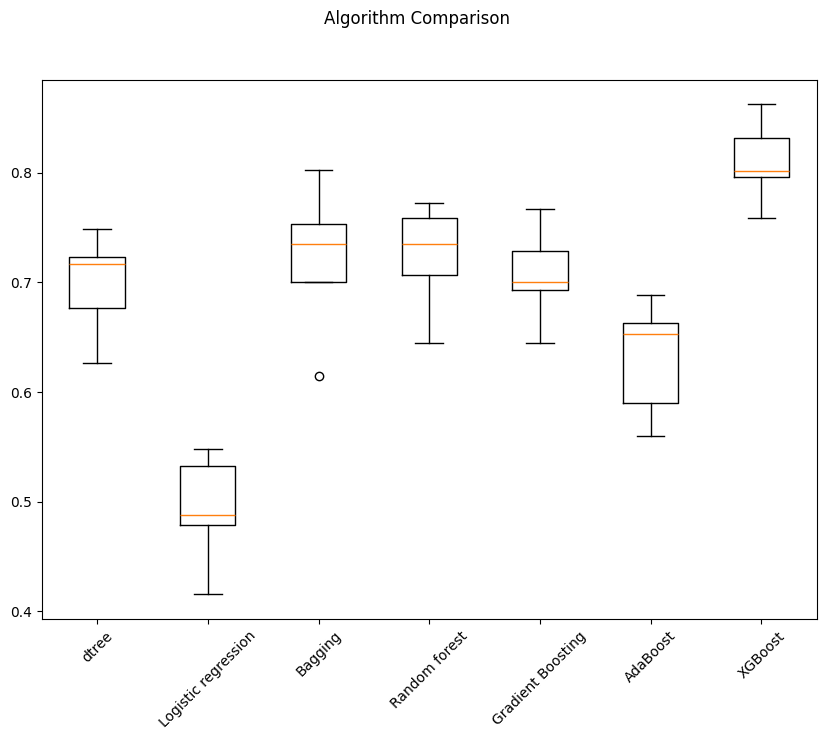

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results1)
ax.set_xticklabels(names, rotation=45)
plt.show()


- XGBoost stands out as the top choice due to its higher median and stability.

### Model Building with Oversampled data


In [ ]:
print(f"Before OverSampling, counts of label '1': {sum(y_train == 1)}")
print(f"Before OverSampling, counts of label '0': {sum(y_train == 0)}\n")


sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print(f"After OverSampling, counts of label '1': {sum(y_train_over == 1)}")
print(f"After OverSampling, counts of label '0': {sum(y_train_over == 0)}\n")

print(f"After OverSampling, the shape of X_train_over: {X_train_over.shape}")
print(f"After OverSampling, the shape of y_train_over: {y_train_over.shape}\n")

Before OverSampling, counts of label '1': 832
Before OverSampling, counts of label '0': 14168

After OverSampling, counts of label '1': 14168
After OverSampling, counts of label '0': 14168

After OverSampling, the shape of X_train_over: (28336, 40)
After OverSampling, the shape of y_train_over: (28336,)



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric='logloss')))

In [ ]:
results1 = []  # Empty list to store all model's CV scores
names = []     # Empty list to store name of the models

# Loop through all models to get the mean cross-validated score
print("\nCross-Validation Performance on Oversampled Training Dataset:\n")

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\nValidation Performance:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))



Cross-Validation Performance on Oversampled Training Dataset:

dtree: 0.9720494245534969
Logistic regression: 0.883963699328486
Bagging: 0.9762141471581656
Random forest: 0.9839075260047615
Gradient Boosting: 0.9256068151319724
AdaBoost: 0.8978689011775473
XGBoost: 0.9891305241357218

Validation Performance:

dtree: 0.7769784172661871
Logistic regression: 0.8489208633093526
Bagging: 0.8345323741007195
Random forest: 0.8489208633093526
Gradient Boosting: 0.8776978417266187
AdaBoost: 0.8561151079136691
XGBoost: 0.8669064748201439


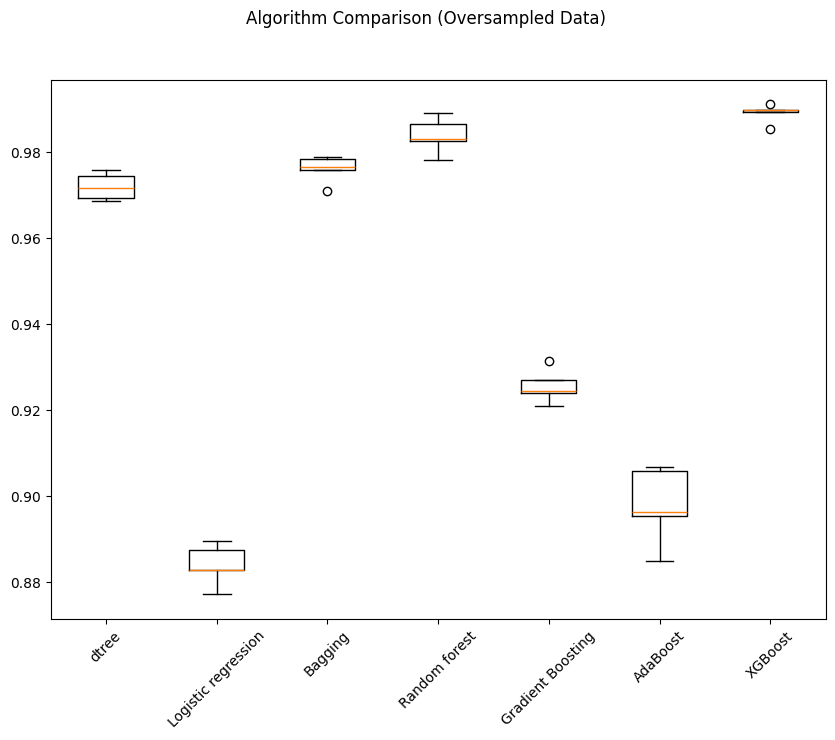

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison (Oversampled Data)")
ax = fig.add_subplot(111)
plt.boxplot(results1)
ax.set_xticklabels(names, rotation=45)
plt.show()


- XGBoost again outperforms other models, achieving the highest median performance.

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print(f"Before UnderSampling, counts of label '1': {sum(y_train == 1)}")
print(f"Before UnderSampling, counts of label '0': {sum(y_train == 0)}\n")

print(f"After UnderSampling, counts of label '1': {sum(y_train_un == 1)}")
print(f"After UnderSampling, counts of label '0': {sum(y_train_un == 0)}\n")

print(f"After UnderSampling, the shape of X_train_un: {X_train_un.shape}")
print(f"After UnderSampling, the shape of y_train_un: {y_train_un.shape}\n")

Before UnderSampling, counts of label '1': 832
Before UnderSampling, counts of label '0': 14168

After UnderSampling, counts of label '1': 832
After UnderSampling, counts of label '0': 832

After UnderSampling, the shape of X_train_un: (1664, 40)
After UnderSampling, the shape of y_train_un: (1664,)



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric='logloss')))

In [ ]:
results1 = []  # Empty list to store all model's CV scores
names = []     # Empty list to store name of the models

# Loop through all models to get the mean cross-validated score
print("\nCross-Validation Performance on Oversampled Training Dataset:\n")

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\nValidation Performance:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance on Oversampled Training Dataset:

dtree: 0.8617776495202367
Logistic regression: 0.8726138085275232
Bagging: 0.8641945025611427
Random forest: 0.9038669648654498
Gradient Boosting: 0.8978572974532861
AdaBoost: 0.8666113556020489
XGBoost: 0.9014717552846114

Validation Performance:

dtree: 0.841726618705036
Logistic regression: 0.8525179856115108
Bagging: 0.8705035971223022
Random forest: 0.8920863309352518
Gradient Boosting: 0.8884892086330936
AdaBoost: 0.8489208633093526
XGBoost: 0.89568345323741


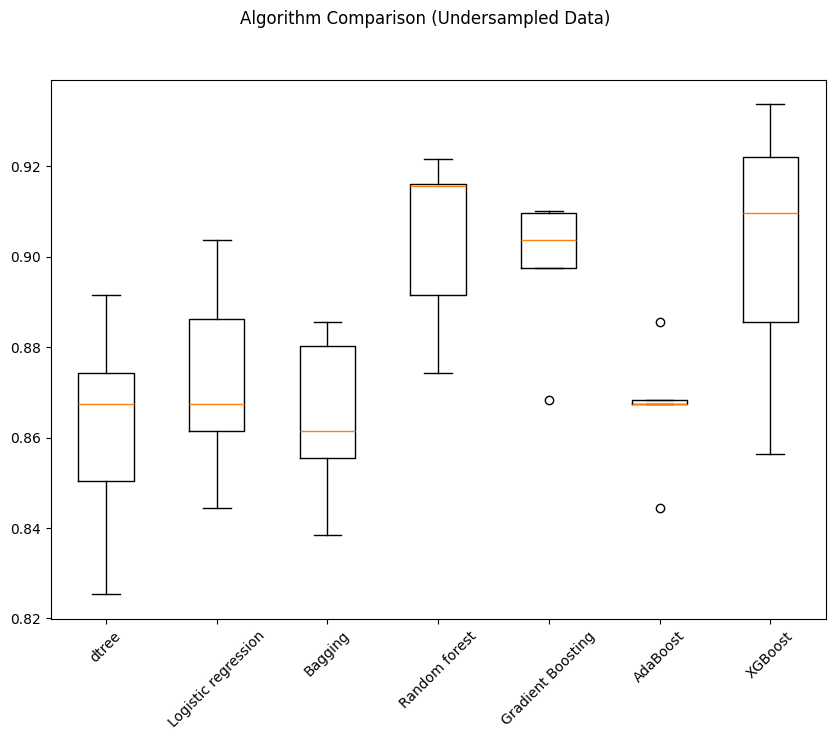

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison (Undersampled Data)")
ax = fig.add_subplot(111)
plt.boxplot(results1)
ax.set_xticklabels(names, rotation=45)
plt.show()

- XGBoost is again the top-performing algorithm, with the highest median score and acceptable variability.

- Gradient Boosting also performs well, with a high median score and low variability, though it falls slightly behind XGBoost.

## HyperparameterTuning

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Decision Tree

#### tuning Decision tree with original data

In [ ]:
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.5684366207344347:


In [ ]:
dTree_tuned_org =  DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=7, random_state=1)
dTree_tuned_org.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

In [ ]:
dTree_tuned_org_train_pref = model_performance_classification_sklearn(
    dTree_tuned_org, X_train, y_train)
dTree_tuned_org_train_pref

Accuracy  Recall  Precision    F1
0     0.974   0.591      0.904 0.715

In [ ]:
dTree_tuned_org_val_pref = model_performance_classification_sklearn(
    dTree_tuned_org, X_val, y_val)
dTree_tuned_org_val_pref

Accuracy  Recall  Precision    F1
0     0.970   0.583      0.822 0.682

- it almost staible but the recall its too low

#### tuning Decision tree with oversampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 3} with CV score=0.9102913265648006:


In [ ]:
dTree_tuned_over =  DecisionTreeClassifier(max_depth=3, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=7, random_state=1)
dTree_tuned_over.fit(X_train_over,y_train_over)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, min_samples_leaf=7,
                       random_state=1)

In [ ]:
dTree_tuned_over_train_pref = model_performance_classification_sklearn(
    dTree_tuned_over, X_train_over,y_train_over)
dTree_tuned_over_train_pref

Accuracy  Recall  Precision    F1
0     0.843   0.917      0.799 0.854

In [ ]:
dTree_tuned_over_val_pref = model_performance_classification_sklearn(
    dTree_tuned_over, X_val, y_val)
dTree_tuned_over_val_pref

Accuracy  Recall  Precision    F1
0     0.763   0.885      0.176 0.294

- its better but the precision and F1 are drop

#### tuning Decision tree with undersampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7],
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 5, 'max_depth': 2} with CV score=0.850811629752543:


In [ ]:
dTree_tuned_un =  DecisionTreeClassifier(max_depth=2, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=1, random_state=1)
dTree_tuned_un.fit(X_train_un,y_train_un)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=5,
                       min_impurity_decrease=0.001, random_state=1)

In [ ]:
dTree_tuned_un_train_pref = model_performance_classification_sklearn(
    dTree_tuned_un, X_train_un,y_train_un)
dTree_tuned_un_train_pref

Accuracy  Recall  Precision    F1
0     0.764   0.909      0.705 0.794

In [ ]:
dTree_tuned_un_val_pref = model_performance_classification_sklearn(
    dTree_tuned_un, X_val, y_val)
dTree_tuned_un_val_pref

Accuracy  Recall  Precision    F1
0     0.609   0.888      0.114 0.202

- also the precision and F1 drop

### AdaBoost

- **Tuning AdaBoost Using Oversampled Data**

In [ ]:
# Defining model
Model = AdaBoostClassifier(random_state=1)

# Optimized parameter grid for RandomizedSearchCV
param_grid = {
    "n_estimators": [50, 100, 150],  # Reduced the range to speed up execution
    "learning_rate": [0.1, 0.2],  # Focused on fewer values for faster convergence
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
    ],
}

# Calling RandomizedSearchCV with optimized settings for lower time
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=20,
    n_jobs=-1,
    scoring=scorer,
    cv=3,
    random_state=1,
)


randomized_cv.fit(X_train_over, y_train_over)


print(
    "Best parameters are {} with CV score={:.4f}".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 150, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.9318


In [ ]:
# Creating new model with best parameters
tuned_ada = AdaBoostClassifier(
    n_estimators=150,
    learning_rate=0.2,
    estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)

tuned_ada.fit(X_train_over, y_train_over)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.2, n_estimators=150)

In [ ]:
# Performance on oversampled training set
ada_train_perf = model_performance_classification_sklearn(
    tuned_ada, X_train_over, y_train_over
)
ada_train_perf


Accuracy  Recall  Precision    F1
0     0.957   0.935      0.978 0.956

In [ ]:
# Performance on validation set
ada_val_perf = model_performance_classification_sklearn(
    tuned_ada, X_val, y_val
)
ada_val_perf


Accuracy  Recall  Precision    F1
0     0.967   0.860      0.655 0.743

- The model performs well on the training set (Recall: 0.935, F1: 0.956) but shows a drop in validation recall (0.860) and precision (0.655), indicating potential overfitting. Further tuning is needed to improve generalization.

### Random Forest

- **Tuning Random Forest Using Undersampled Data**

In [ ]:
# Defining model
Model = RandomForestClassifier(random_state=1)
param_grid = {
    "n_estimators": [200, 250],
    "min_samples_leaf": [1, 2],
    "max_features": [0.3, 0.5],
    "max_samples": [0.4, 0.5],
}

randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=30,  # Reduced iterations
    n_jobs=-1,
    scoring=scorer,
    cv=3,  # Reduced cross-validation folds
    random_state=1,
)
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={:.4f}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.5, 'max_features': 0.5} with CV score=0.8978:


In [ ]:
# Creating new model with best parameters
tuned_rf2 = RandomForestClassifier(
    n_estimators=250,
    min_samples_leaf=1,
    max_samples=0.5,
    max_features=0.5,
    random_state=1,
)

tuned_rf2.fit(X_train_un, y_train_un)


RandomForestClassifier(max_features=0.5, max_samples=0.5, n_estimators=250,
                       random_state=1)

In [ ]:
# Performance on undersampled training set
rf2_train_perf = model_performance_classification_sklearn(
    tuned_rf2, X_train_un, y_train_un
)
rf2_train_perf


Accuracy  Recall  Precision    F1
0     0.975   0.954      0.996 0.975

In [ ]:
# Performance on validation set
rf2_val_perf = model_performance_classification_sklearn(
    tuned_rf2, X_val, y_val
)
rf2_val_perf


Accuracy  Recall  Precision    F1
0     0.936   0.892      0.461 0.608

- The model performs well on the training set (Recall: 0.954, F1: 0.975) but has lower precision (0.461) on the validation set, indicating

### Gradient Boosting

- **Tuning Gradient Boosting Using Oversampled Data**

In [ ]:
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": [100, 125],
    "learning_rate": [0.1, 0.2],
    "subsample": [0.7],
    "max_features": [0.5],
}

randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    scoring=scorer,
    n_iter=30,  # Reduced iterations
    n_jobs=-1,
    cv=3,  # Reduced cross-validation folds
    random_state=1,
)

randomized_cv.fit(X_train_over, y_train_over)
print(
    "Best parameters are {} with CV score={:.4f}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.9482:


In [ ]:
# Creating new model with best parameters
tuned_gbm = GradientBoostingClassifier(
    n_estimators=125,
    learning_rate=0.2,
    subsample=0.7,
    max_features=0.5,
    random_state=1,
)
tuned_gbm.fit(X_train_over, y_train_over)


GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, random_state=1, subsample=0.7)

In [ ]:
gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, X_train_over, y_train_over
)
gbm_train_perf

Accuracy  Recall  Precision    F1
0     0.973   0.961      0.986 0.973

In [ ]:
# Performance on validation set
gbm_val_perf = model_performance_classification_sklearn(
    tuned_gbm, X_val, y_val
)
gbm_val_perf


Accuracy  Recall  Precision    F1
0     0.976   0.881      0.738 0.803

- The Gradient Boosting model performs well on the training set (Recall: 0.961, F1: 0.973) but shows a slight drop on the validation set (Recall: 0.881, F1: 0.803). While recall is decent.

### XGBoost


- **Tuning XGBoost Using Oversampled Data**

In [ ]:
# Defining model
Model = XGBClassifier(random_state=1, eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    'n_estimators': [150, 200],
    'scale_pos_weight': [5],
    'learning_rate': [0.1],
    'gamma': [0, 3],
    'subsample': [0.8],
}

randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=30,  # Reduced iterations
    n_jobs=-1,
    scoring=scorer,
    cv=3,  # Reduced cross-validation folds
    random_state=1,
)

randomized_cv.fit(X_train_over, y_train_over)
print(
    "Best parameters are {} with CV score={:.4f}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 5, 'n_estimators': 200, 'learning_rate': 0.1, 'gamma': 0} with CV score=0.9941:


In [ ]:
# Creating new model with best parameters
xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.8,
    scale_pos_weight=5,
    n_estimators=200,
    learning_rate=0.1,
    gamma=0,
)

xgb2.fit(X_train_over, y_train_over)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Performance on oversampled training set
xgb2_train_perf = model_performance_classification_sklearn(
    xgb2, X_train_over, y_train_over
)
xgb2_train_perf


Accuracy  Recall  Precision    F1
0     0.999   1.000      0.999 0.999

In [ ]:
# Performance on validation set
xgb2_val_perf = model_performance_classification_sklearn(
    xgb2, X_val, y_val
)
xgb2_val_perf


Accuracy  Recall  Precision    F1
0     0.983   0.888      0.818 0.852

- The XGBoost model performs perfectly on the training set (Recall: 1.000, F1: 0.999), indicating strong learning from the oversampled data. On the validation set, recall remains high (0.888), but precision drops to 0.818, leading to an F1-score of 0.852.

## Model performance comparison and choosing the final model

In [ ]:
# Training performance comparison
models_train_comp_df = pd.concat(
    [
        dTree_tuned_over_train_pref.T,
        dTree_tuned_un_train_pref.T,
        gbm_train_perf.T,
        ada_train_perf.T,
        rf2_train_perf.T,
        xgb2_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (Oversampled)",
    "Decision Tree (Undersampled)",
    "Gradient Boosting (Oversampled)",
    "AdaBoost (Oversampled)",
    "Random Forest (Undersampled)",
    "XGBoost (Oversampled)",
]
print("Training Performance Comparison:")
models_train_comp_df


Training Performance Comparison:


Decision Tree (Oversampled)  Decision Tree (Undersampled)  \
Accuracy                         0.843                         0.764   
Recall                           0.917                         0.909   
Precision                        0.799                         0.705   
F1                               0.854                         0.794   

           Gradient Boosting (Oversampled)  AdaBoost (Oversampled)  \
Accuracy                             0.973                   0.957   
Recall                               0.961                   0.935   
Precision                            0.986                   0.978   
F1                                   0.973                   0.956   

           Random Forest (Undersampled)  XGBoost (Oversampled)  
Accuracy                          0.975                  0.999  
Recall                            0.954                  1.000  
Precision                         0.996                  0.999  
F1                                0.975                  0.999

In [ ]:
# Validation performance comparison
models_val_comp_df = pd.concat(
    [
        dTree_tuned_over_val_pref.T,
        dTree_tuned_un_val_pref.T,
        gbm_val_perf.T,
        ada_val_perf.T,
        rf2_val_perf.T,
        xgb2_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Decision Tree (Oversampled)",
    "Decision Tree (Undersampled)",
    "Gradient Boosting (Oversampled)",
    "AdaBoost (Oversampled)",
    "Random Forest (Undersampled)",
    "XGBoost (Oversampled)",
]
print("Validation Performance Comparison:")
models_val_comp_df


Validation Performance Comparison:


Decision Tree (Oversampled)  Decision Tree (Undersampled)  \
Accuracy                         0.763                         0.609   
Recall                           0.885                         0.888   
Precision                        0.176                         0.114   
F1                               0.294                         0.202   

           Gradient Boosting (Oversampled)  AdaBoost (Oversampled)  \
Accuracy                             0.976                   0.967   
Recall                               0.881                   0.860   
Precision                            0.738                   0.655   
F1                                   0.803                   0.743   

           Random Forest (Undersampled)  XGBoost (Oversampled)  
Accuracy                          0.936                  0.983  
Recall                            0.892                  0.888  
Precision                         0.461                  0.818  
F1                                0.608                  0.852

from matplotlib import pyplot as plt
models_val_comp_df['Decision Tree (Oversampled)'].plot(kind='hist', bins=20, title='Decision Tree (Oversampled)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models_val_comp_df['Decision Tree (Undersampled)'].plot(kind='hist', bins=20, title='Decision Tree (Undersampled)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models_val_comp_df['Gradient Boosting (Oversampled)'].plot(kind='hist', bins=20, title='Gradient Boosting (Oversampled)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models_val_comp_df['AdaBoost (Oversampled)'].plot(kind='hist', bins=20, title='AdaBoost (Oversampled)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models_val_comp_df.plot(kind='scatter', x='Decision Tree (Oversampled)', y='Decision Tree (Undersampled)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models_val_comp_df.plot(kind='scatter', x='Decision Tree (Undersampled)', y='Gradient Boosting (Oversampled)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models_val_comp_df.plot(kind='scatter', x='Gradient Boosting (Oversampled)', y='AdaBoost (Oversampled)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models_val_comp_df.plot(kind='scatter', x='AdaBoost (Oversampled)', y='Random Forest (Undersampled)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models_val_comp_df['Decision Tree (Oversampled)'].plot(kind='line', figsize=(8, 4), title='Decision Tree (Oversampled)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
models_val_comp_df['Decision Tree (Undersampled)'].plot(kind='line', figsize=(8, 4), title='Decision Tree (Undersampled)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
models_val_comp_df['Gradient Boosting (Oversampled)'].plot(kind='line', figsize=(8, 4), title='Gradient Boosting (Oversampled)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
models_val_comp_df['AdaBoost (Oversampled)'].plot(kind='line', figsize=(8, 4), title='AdaBoost (Oversampled)')
plt.gca().spines[['top', 'right']].set_visible(False)

- XGBoost (Oversampled) performs best with perfect training recall (1.000) and strong validation recall (0.888), balancing precision (0.818) and F1 (0.852). Gradient Boosting follows closely with validation recall of 0.881 and F1 of 0.803. Decision Trees have high recall but very low precision, making them unreliable. Ensemble methods are the most effective overall.

### Test set final performance

In [ ]:
# Let's check the performance on test set
xgb2_test_perf = model_performance_classification_sklearn(
    xgb2, X_test, y_test
)
print("Test Performance of XGBoost Model:")
xgb2_test_perf


Test Performance of XGBoost Model:


Accuracy  Recall  Precision    F1
0     0.980   0.851      0.811 0.830

-
The XGBoost model performs well on the test set with Recall: 0.851 and Precision: 0.811, resulting in a strong F1-score: 0.830. The high recall indicates effective identification of failures, while the slightly lower precision suggests some false positives. Overall, the model generalizes effectively to unseen data.








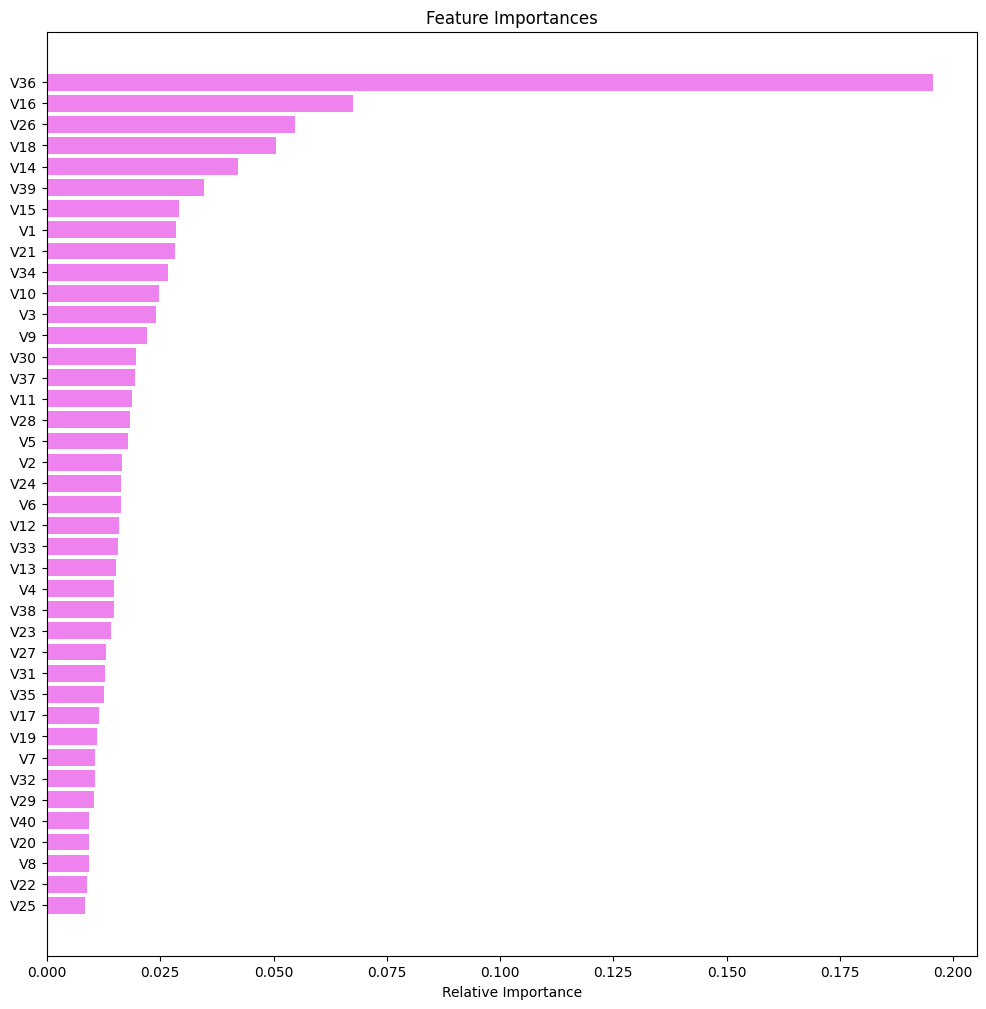

In [ ]:
feature_names = X_train.columns
importances = xgb2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


- Feature V36 is the most important predictor, contributing significantly more than others. Features like V16, V26, and V18 also play critical roles in the model's performance.

## Pipelines to build the final model


In [ ]:
from imblearn.pipeline import Pipeline

# Creating a pipeline with imputation and the final model
Pipeline_model = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('smote', SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)),
    ('classifier', XGBClassifier(
      random_state=1,
      eval_metric="logloss",
      subsample=0.8,
      scale_pos_weight=5,
      n_estimators=200,
      learning_rate=0.1,
      gamma=0,
    )),
])


In [ ]:
X1 = data.drop(columns="Target")
Y1 = data["Target"]

# Test data
X_test1 = df_Test.drop(["Target"], axis=1)
y_test1 = df_Test["Target"]

- Since the final model is built on oversampled data, i will include SMOTE in the pipeline

In [ ]:
Pipeline_model.fit(X1, Y1)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('smote', SMOTE(random_state=1, sampling_strategy=1)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_type..., grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=1, ...))])

In [ ]:
Pipeline_model_test_perf = model_performance_classification_sklearn(
    Pipeline_model, X_test1, y_test1
)
print("Test Performance of the Pipeline Model:")
Pipeline_model_test_perf

Test Performance of the Pipeline Model:


Accuracy  Recall  Precision    F1
0     0.975   0.848      0.740 0.790

# Business Insights and Conclusions

- **Best Model and Its Performance:**

     - The XGBoost model with oversampled data provided the best performance with a high recall on both validation and test sets.
     - This model effectively reduces false negatives, which helps in predicting failures accurately.
- **Important Features:**

    - The feature importance plot indicates that certain features significantly contribute to predicting generator failures.
    - Understanding these features can help the engineering team focus on critical aspects influencing failures.
- **Additional Points:**

   - Implementing this predictive model can lead to significant cost savings by scheduling maintenance before failures occur.
   - Regularly retraining the model with new data can improve its accuracy over time.


***